In [1]:
import pandas as pd
df=pd.read_csv("/content/drive/MyDrive/DS assigment/KNN/Zoo.csv")
df

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [2]:
df.columns

Index(['animal name', 'hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize', 'type'],
      dtype='object')

In [3]:
df.shape

(101, 18)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [5]:
df.dtypes

,0
animal name,object
hair,int64
feathers,int64
eggs,int64
milk,int64
airborne,int64
aquatic,int64
predator,int64
toothed,int64
backbone,int64


In [6]:
df.nunique()

,0
animal name,100
hair,2
feathers,2
eggs,2
milk,2
airborne,2
aquatic,2
predator,2
toothed,2
backbone,2


In [7]:
df.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [8]:
df.isnull().sum()

,0
animal name,0
hair,0
feathers,0
eggs,0
milk,0
airborne,0
aquatic,0
predator,0
toothed,0
backbone,0


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import skew, kurtosis
from scipy import stats

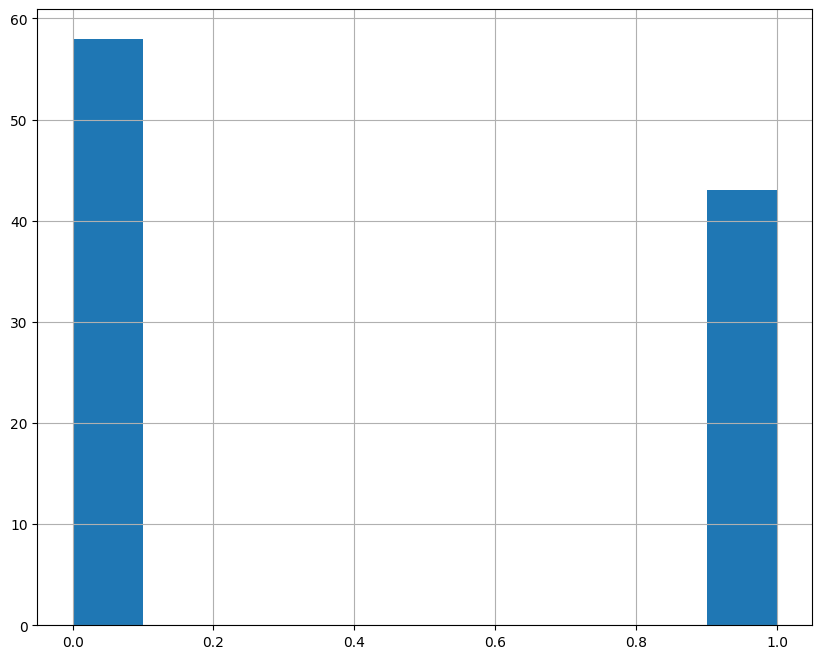

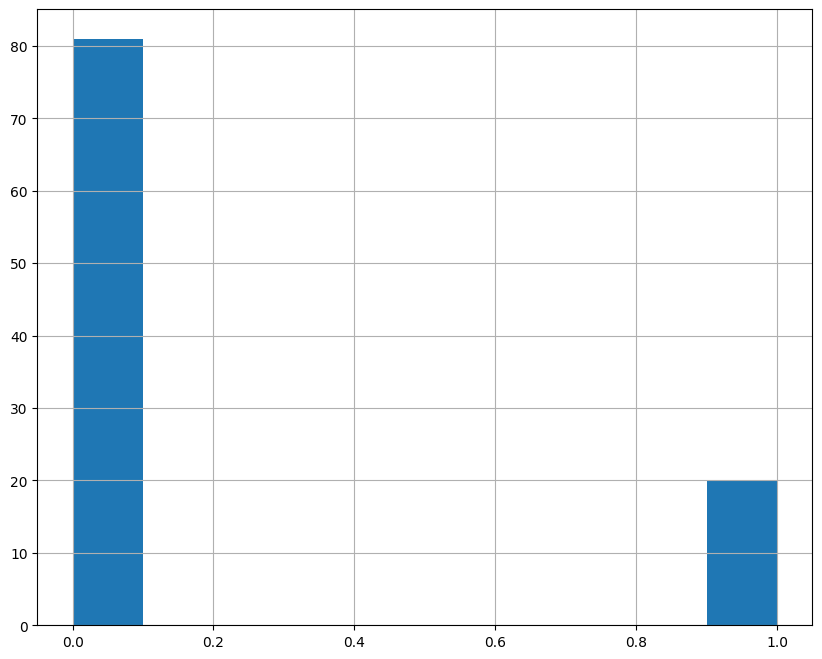

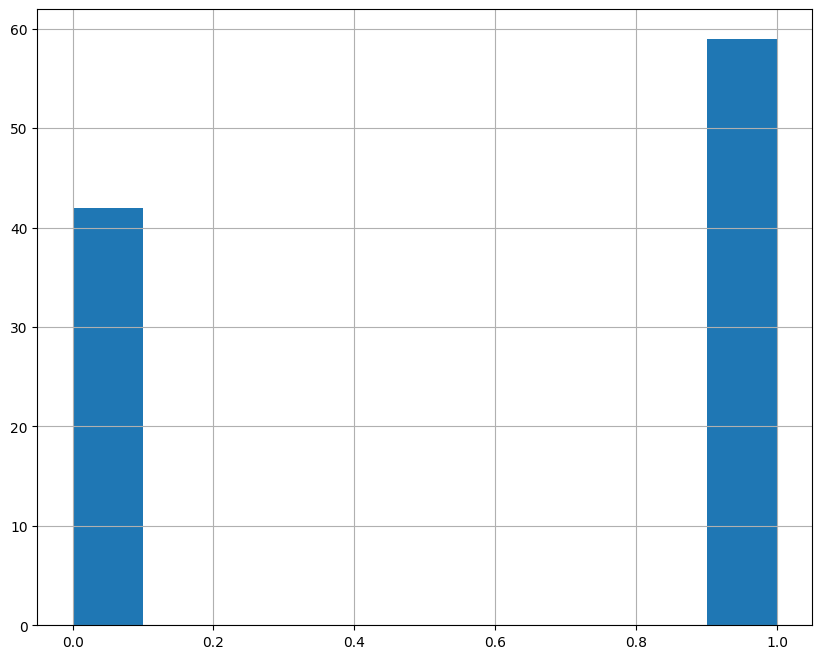

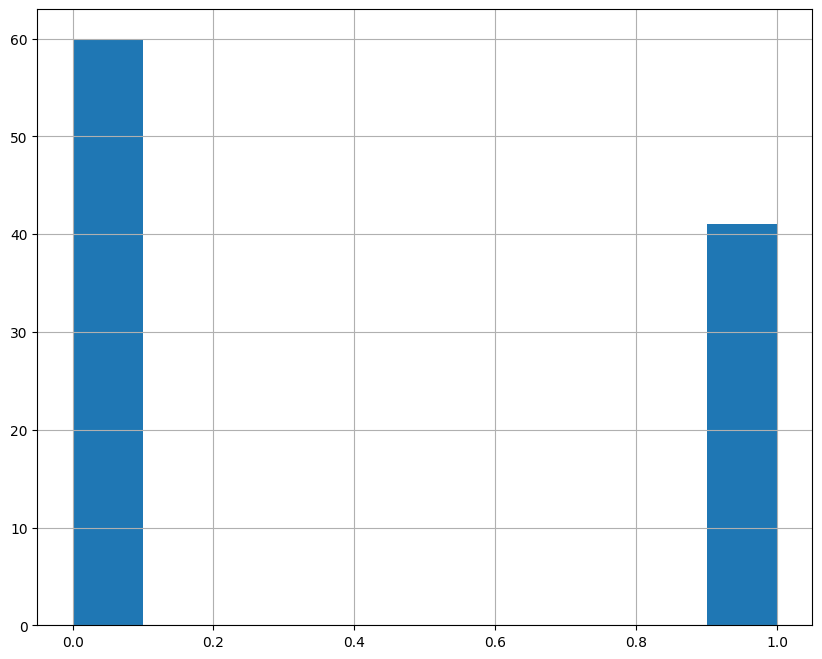

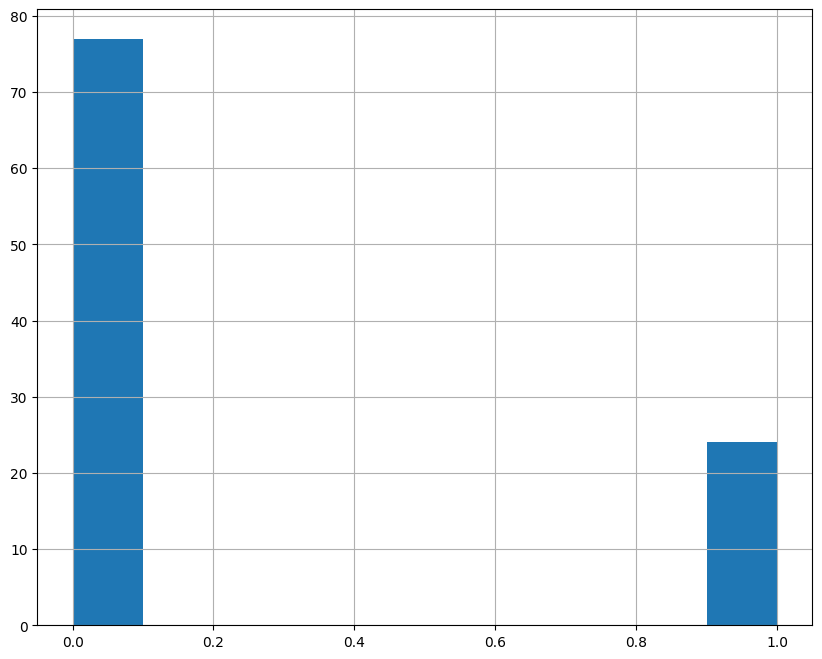

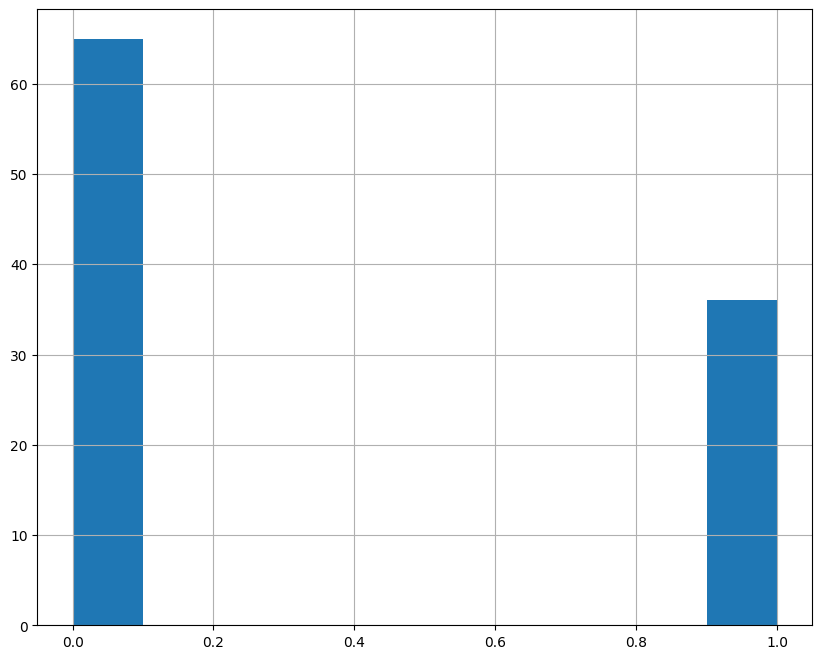

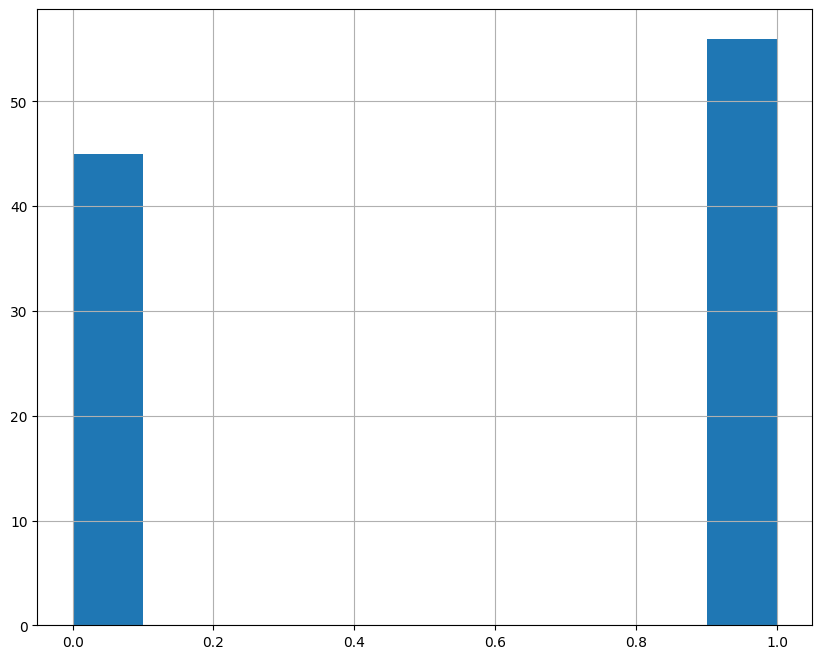

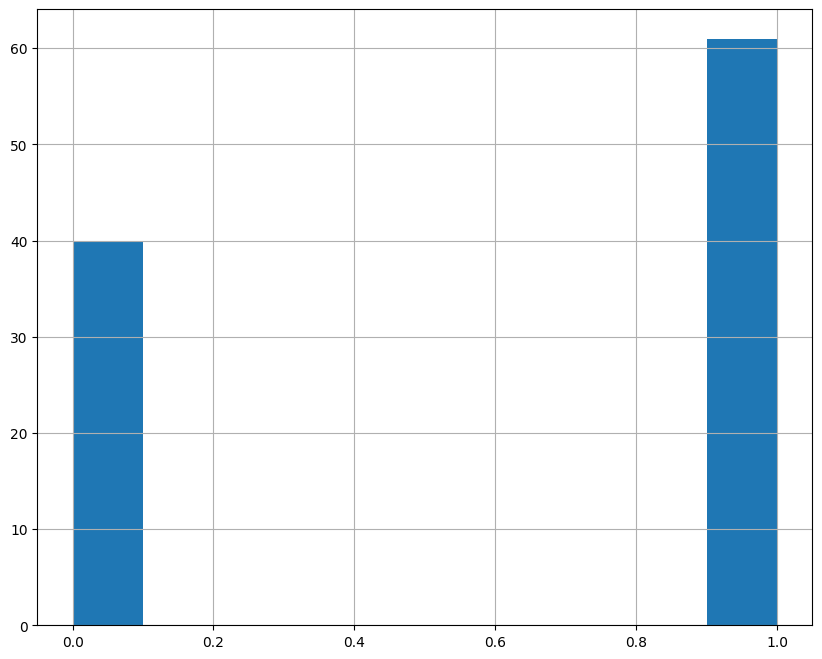

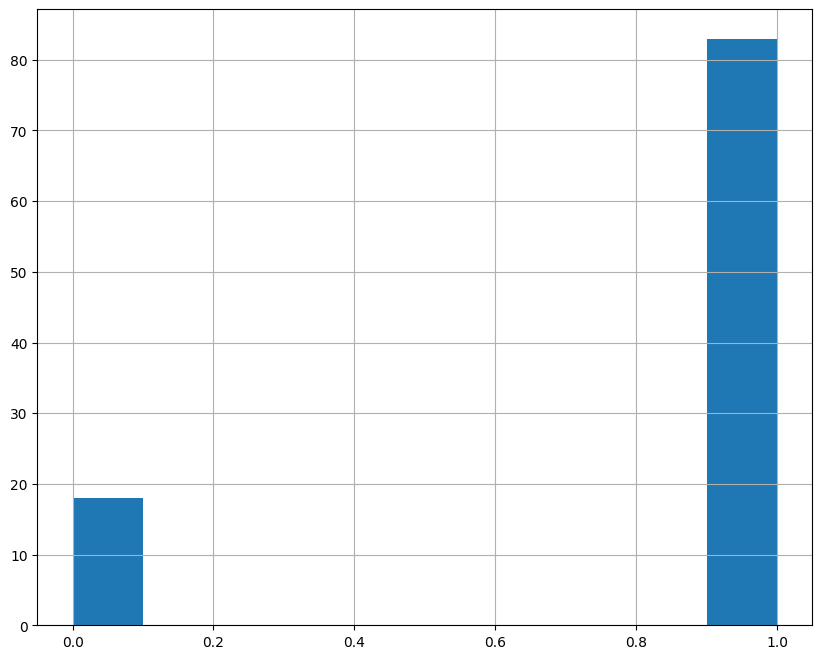

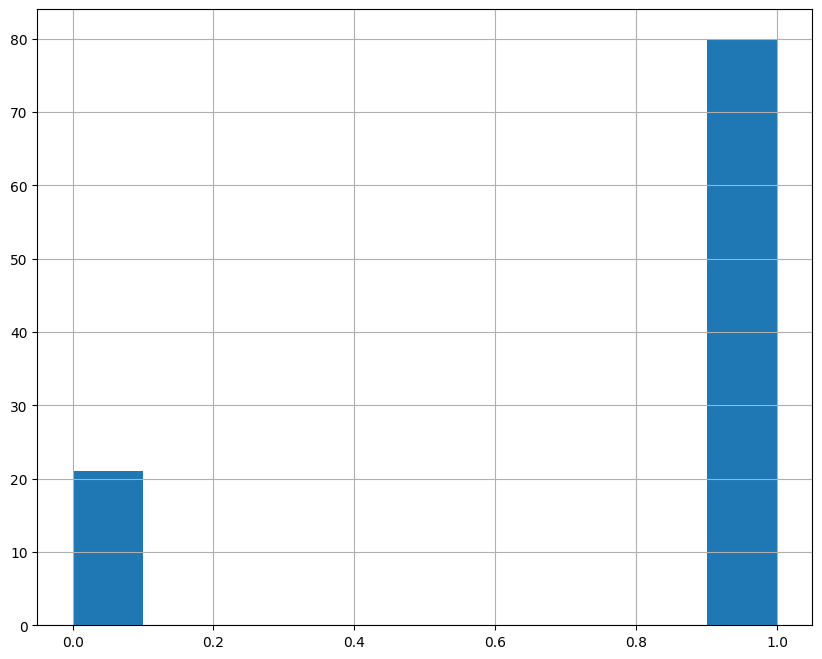

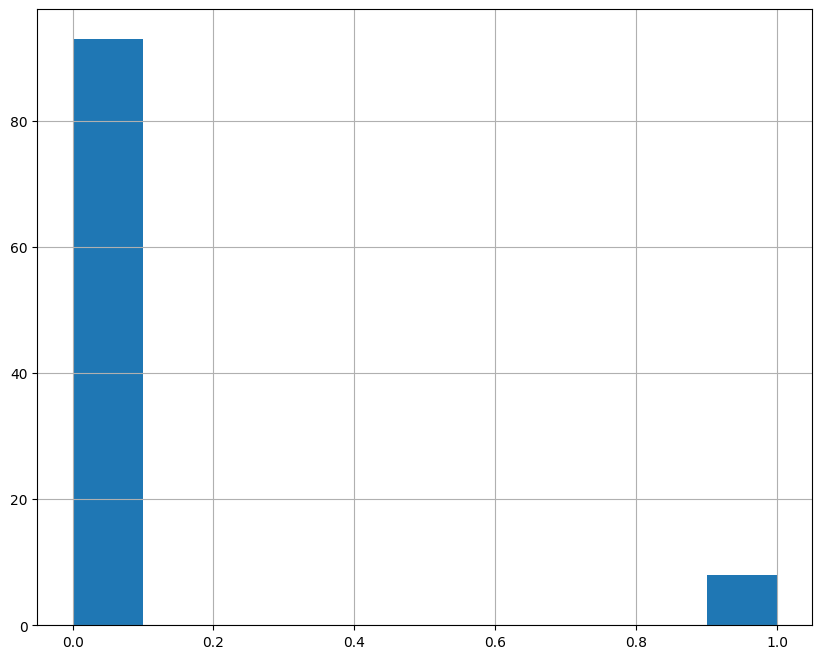

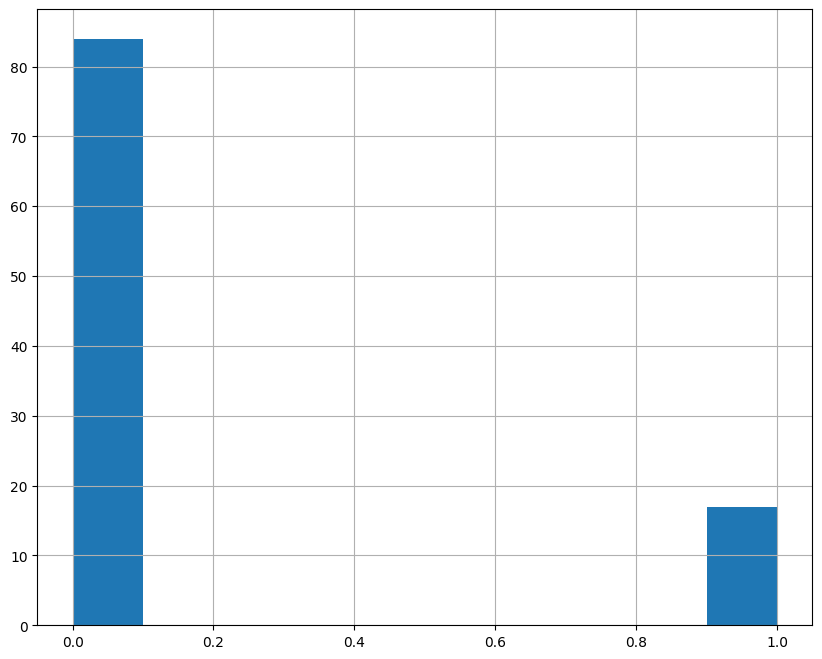

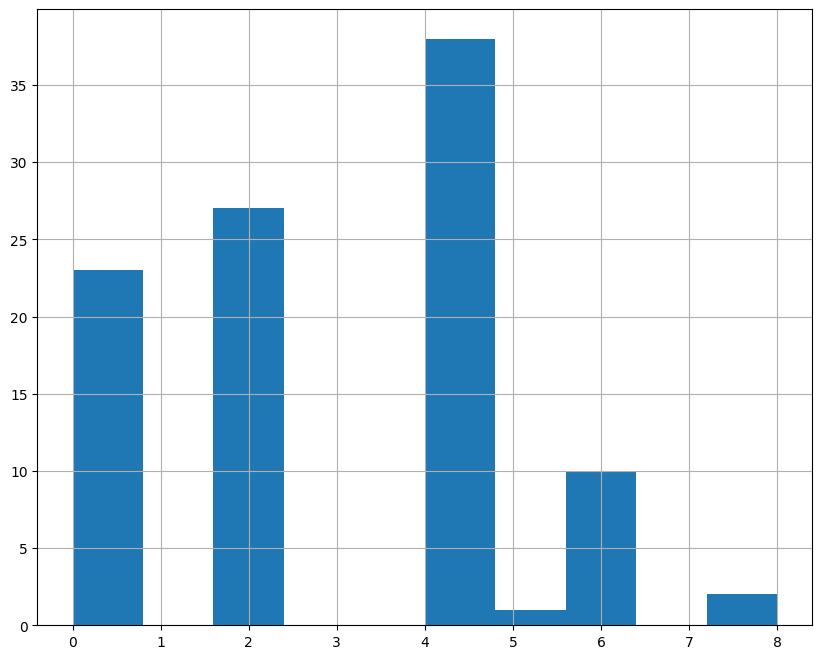

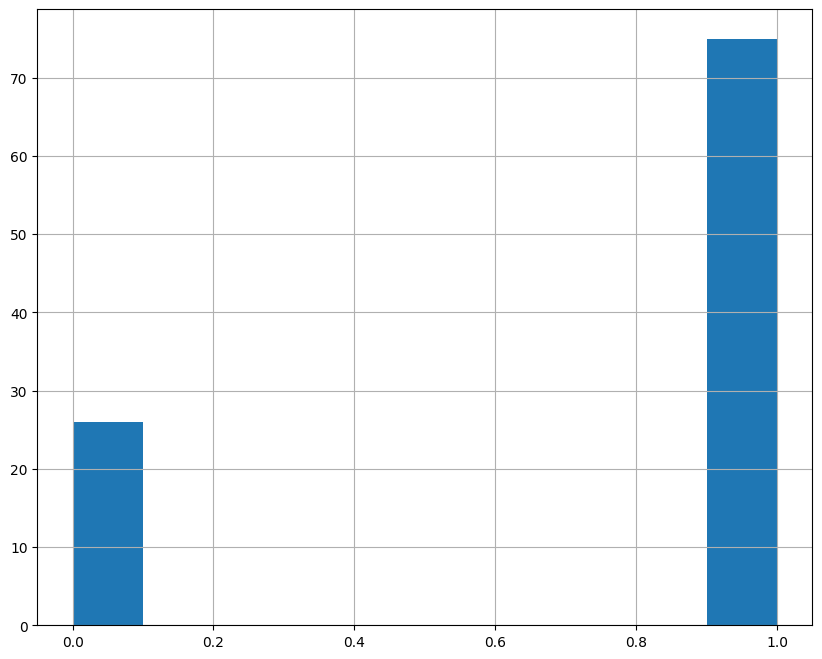

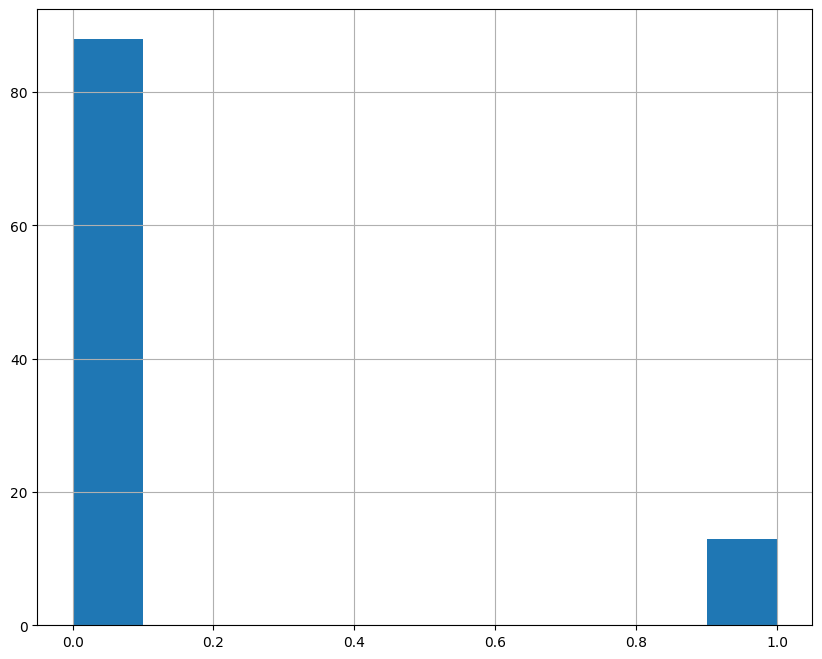

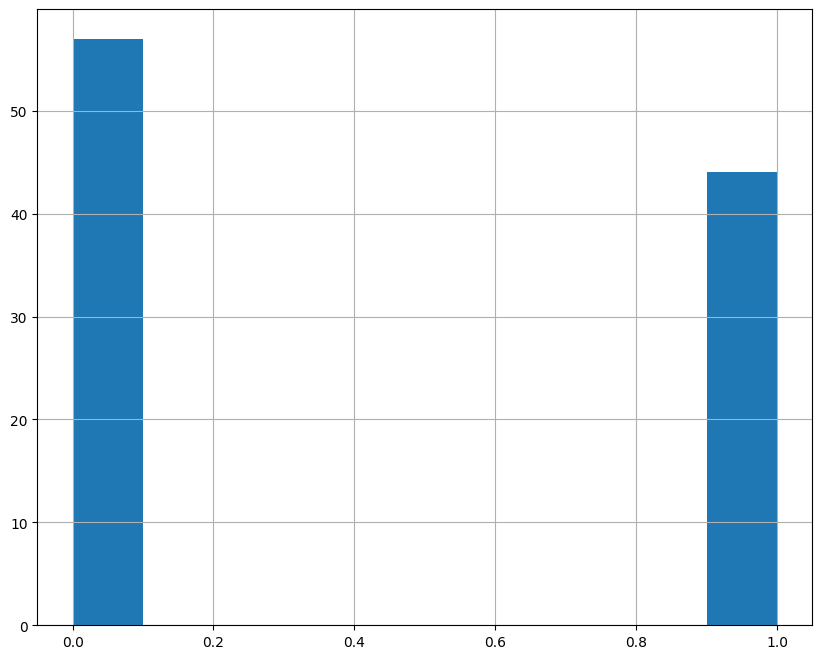

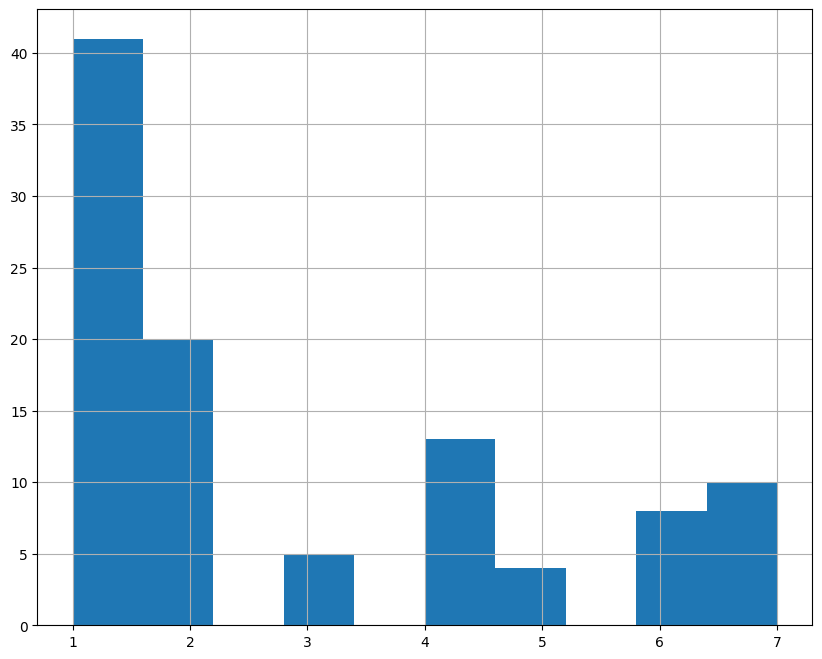

In [10]:
for i in df.select_dtypes(include='number').columns:
  plt.figure(figsize=(10,8))
  df[i].hist()
  plt.show()

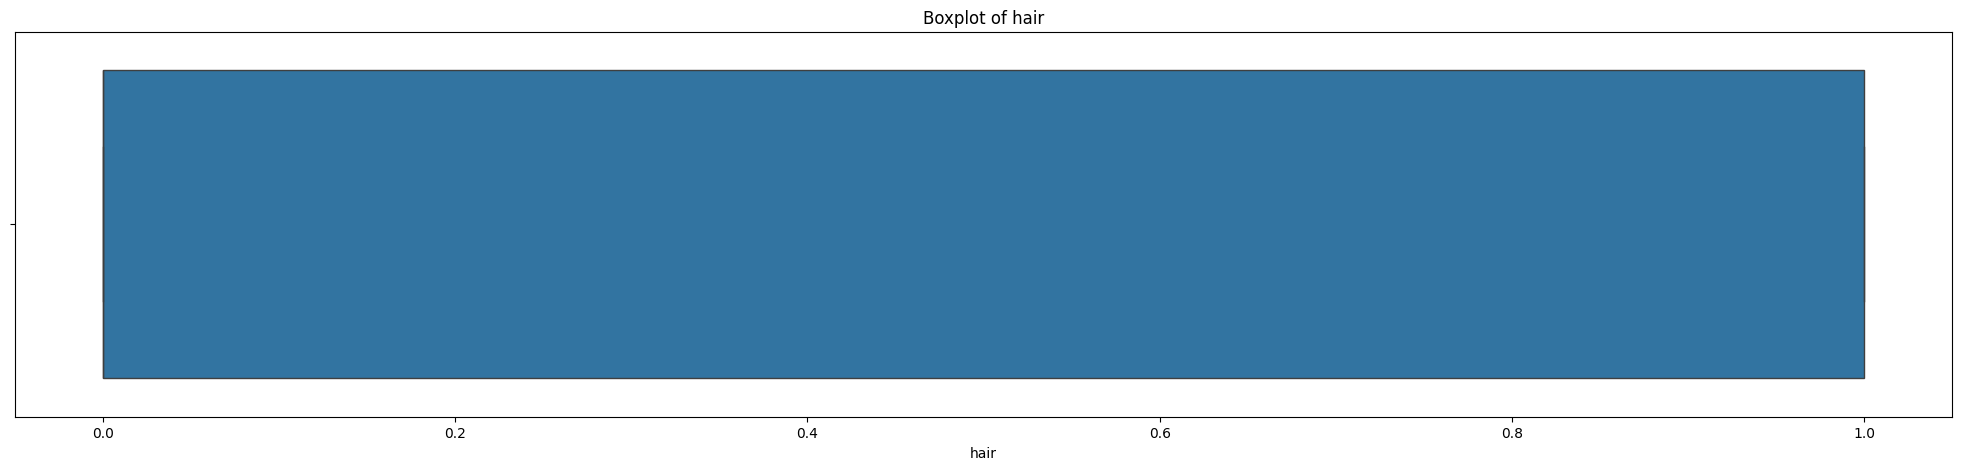

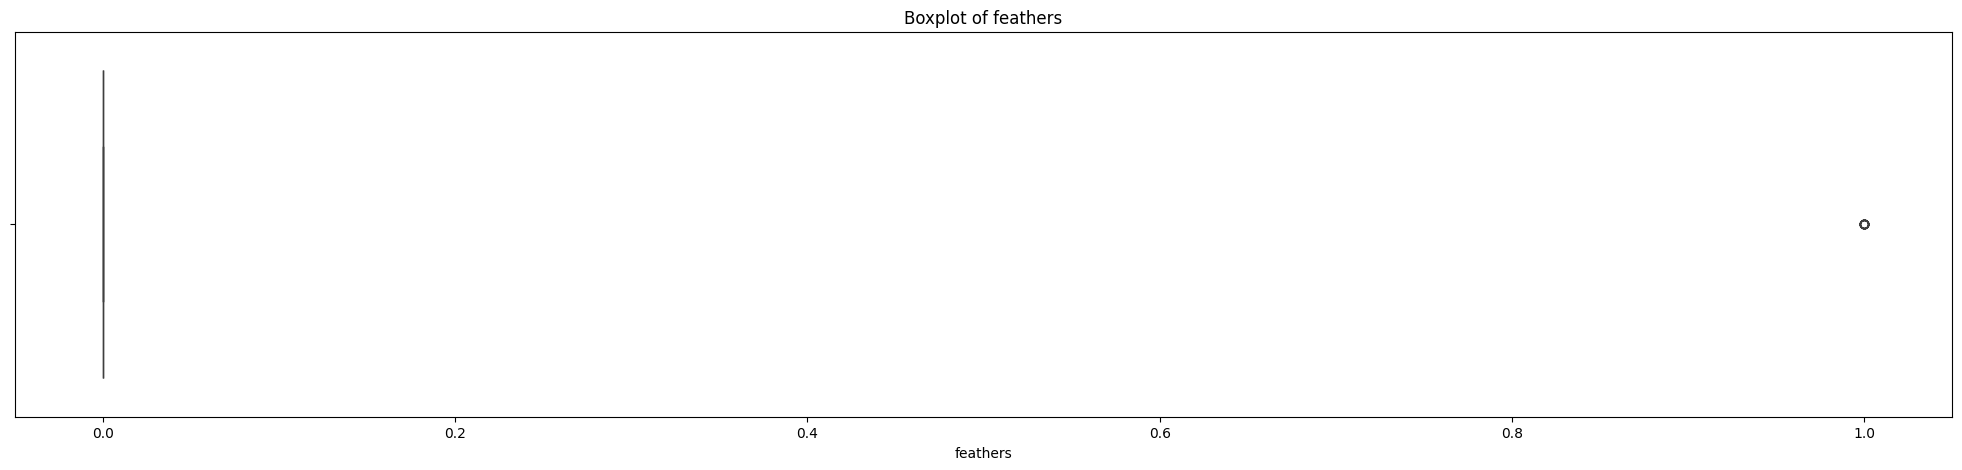

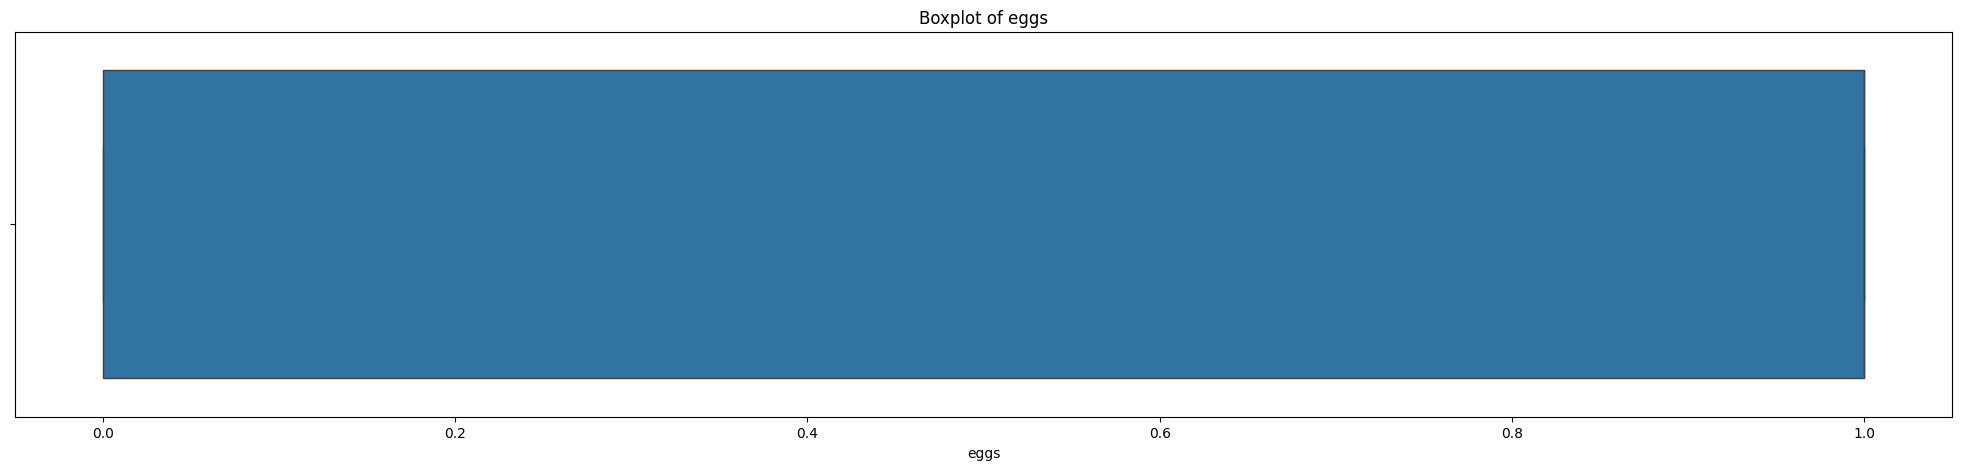

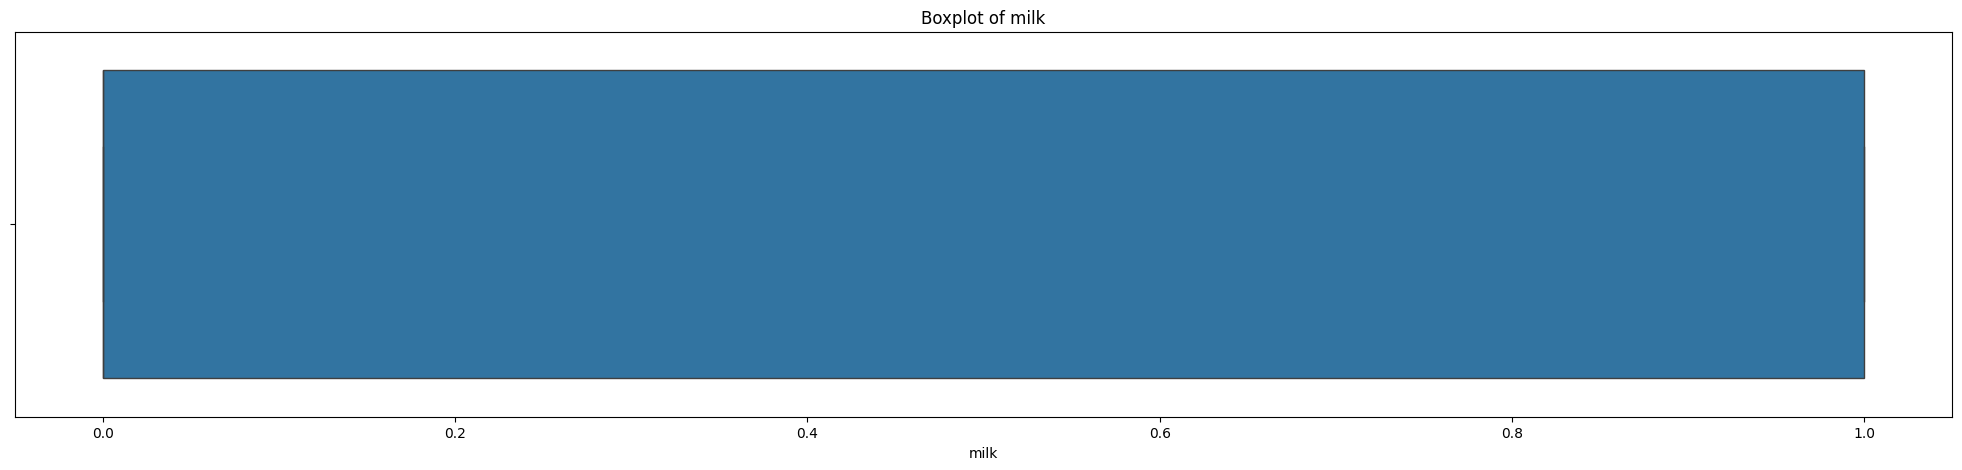

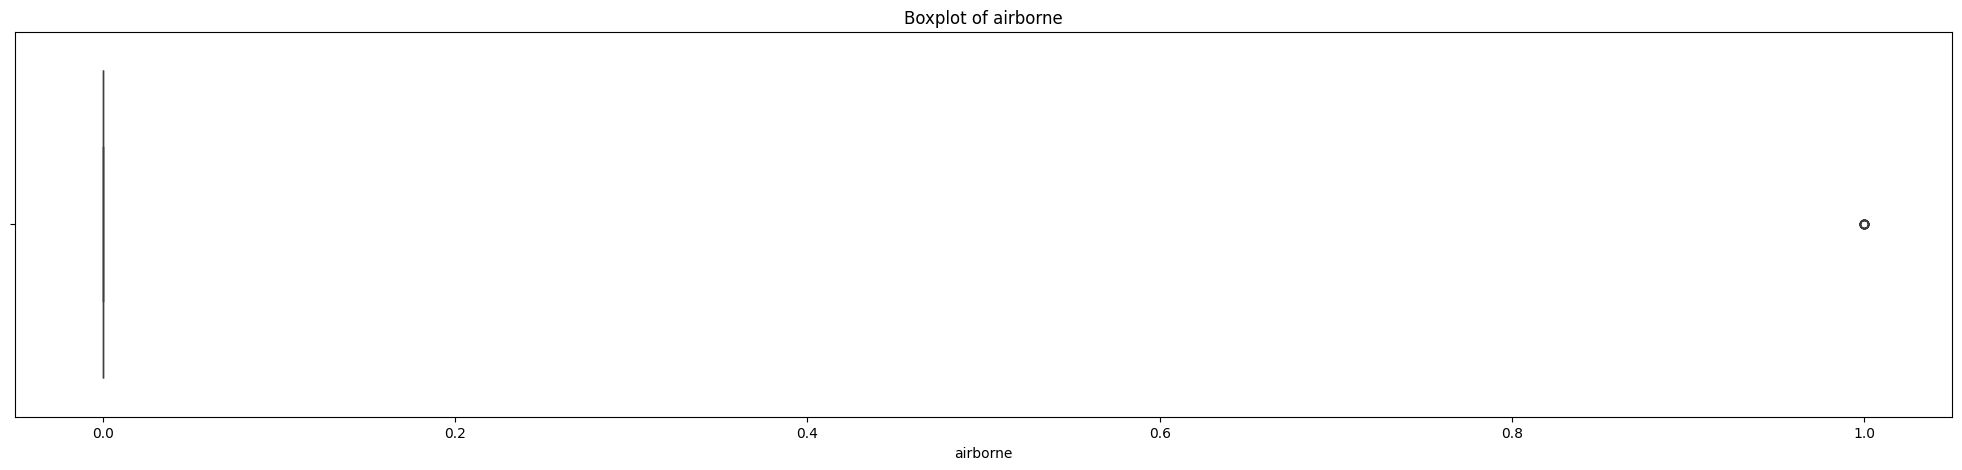

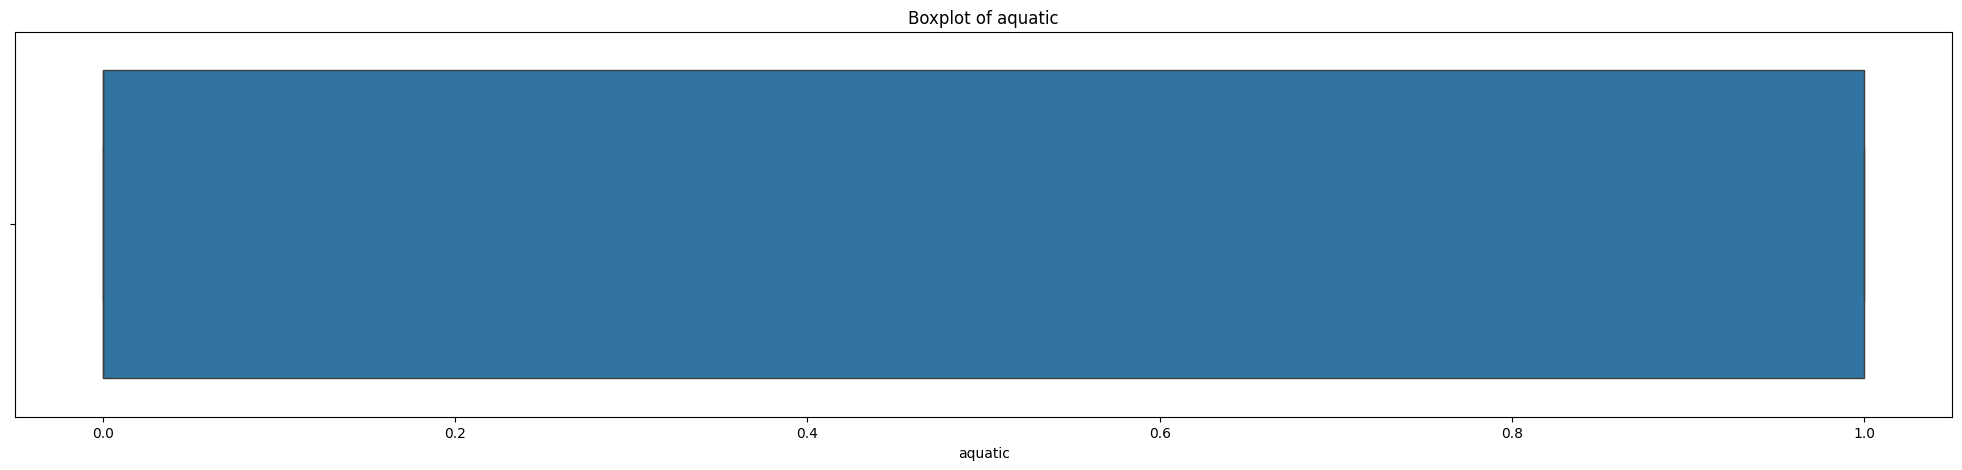

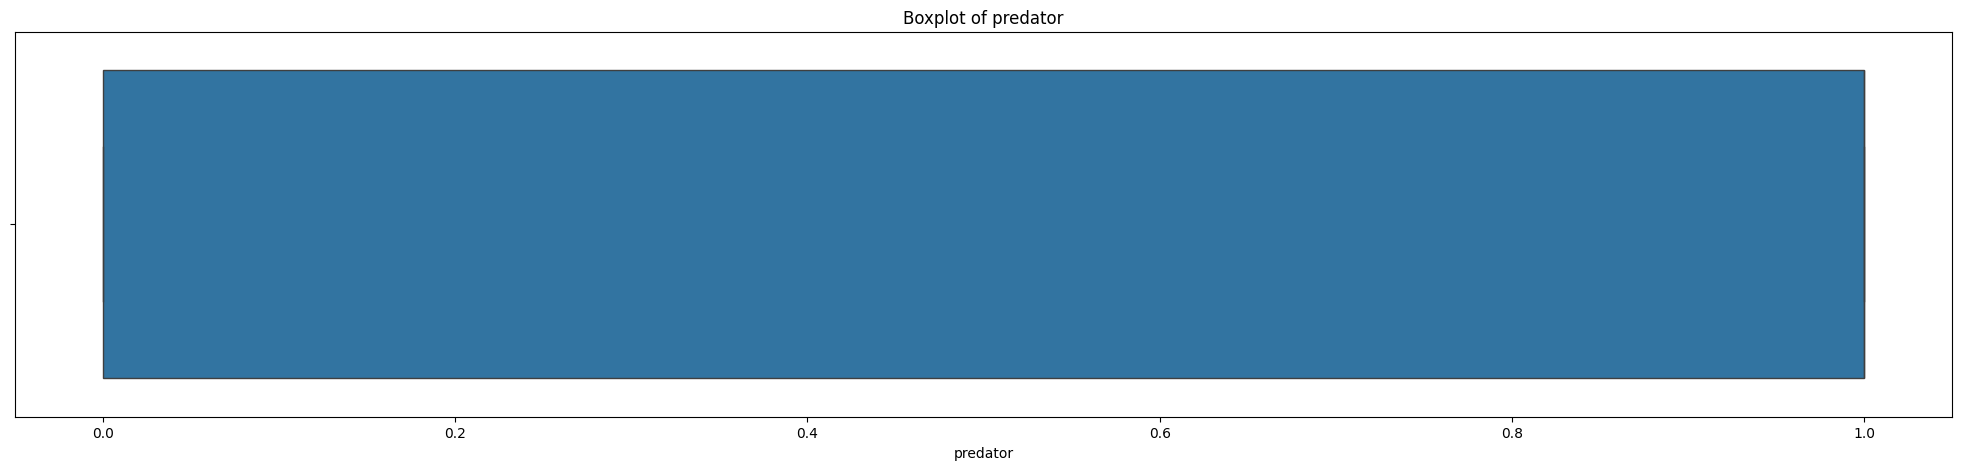

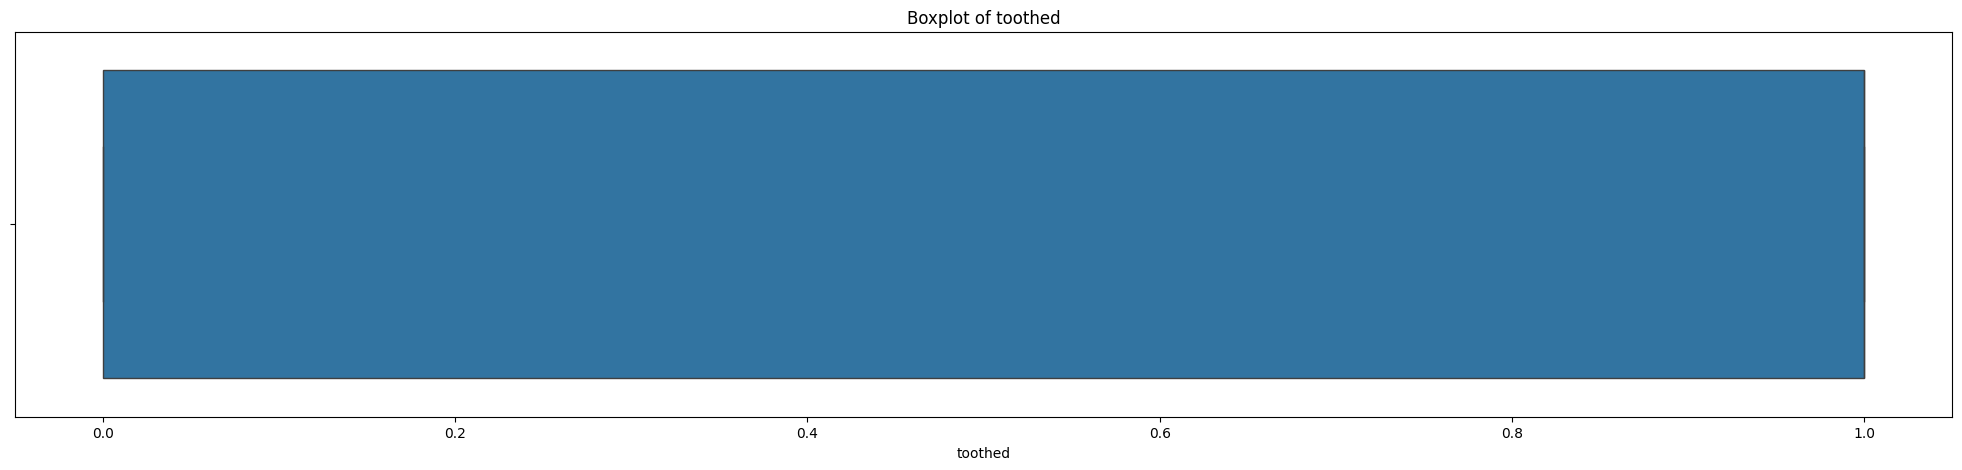

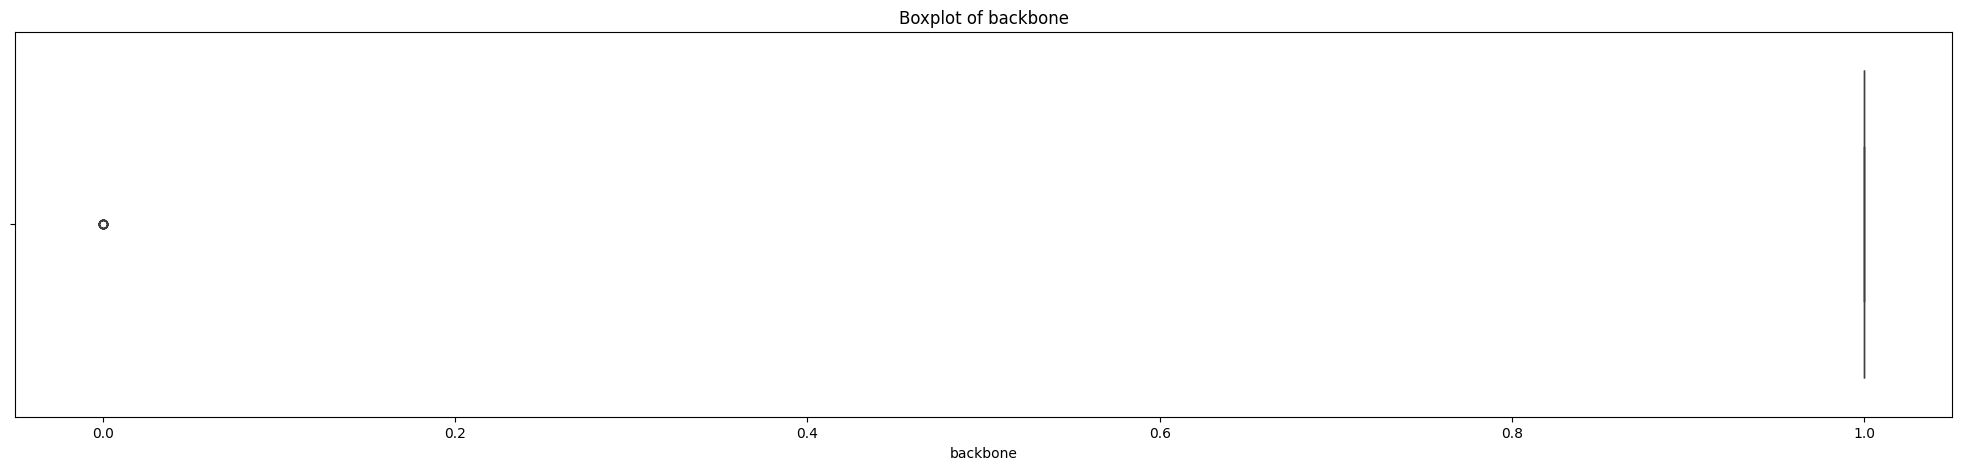

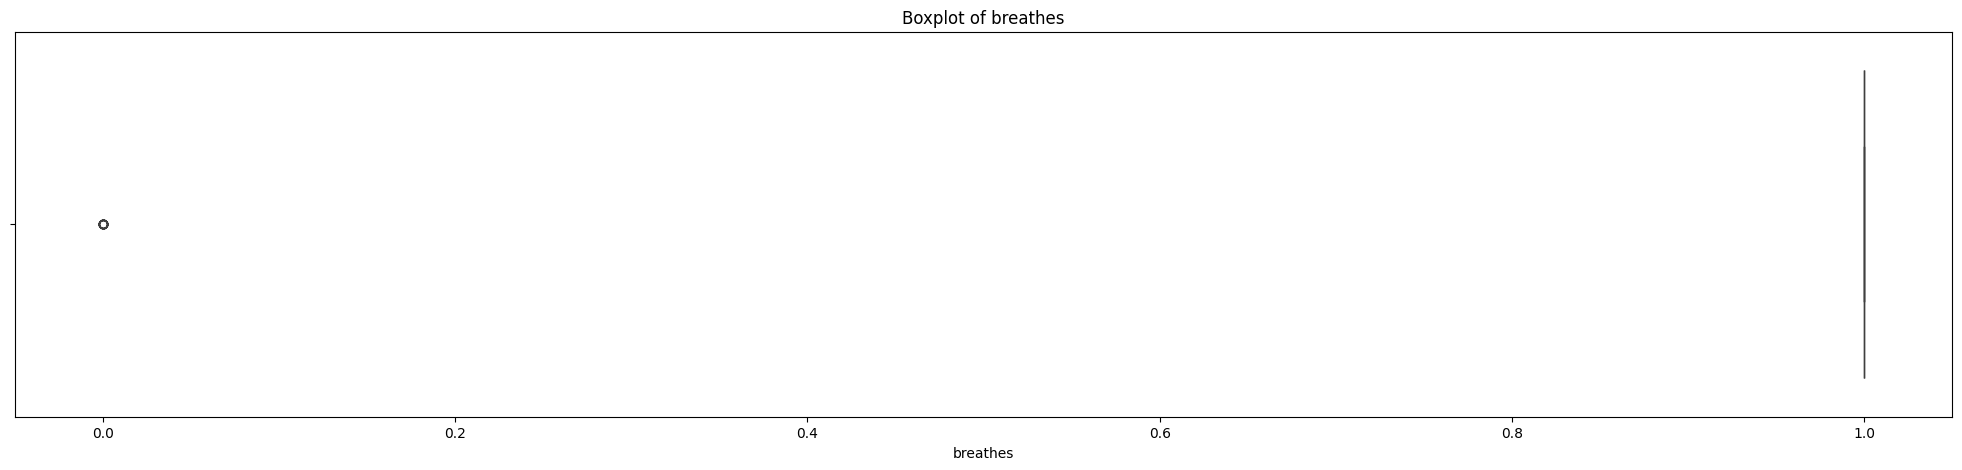

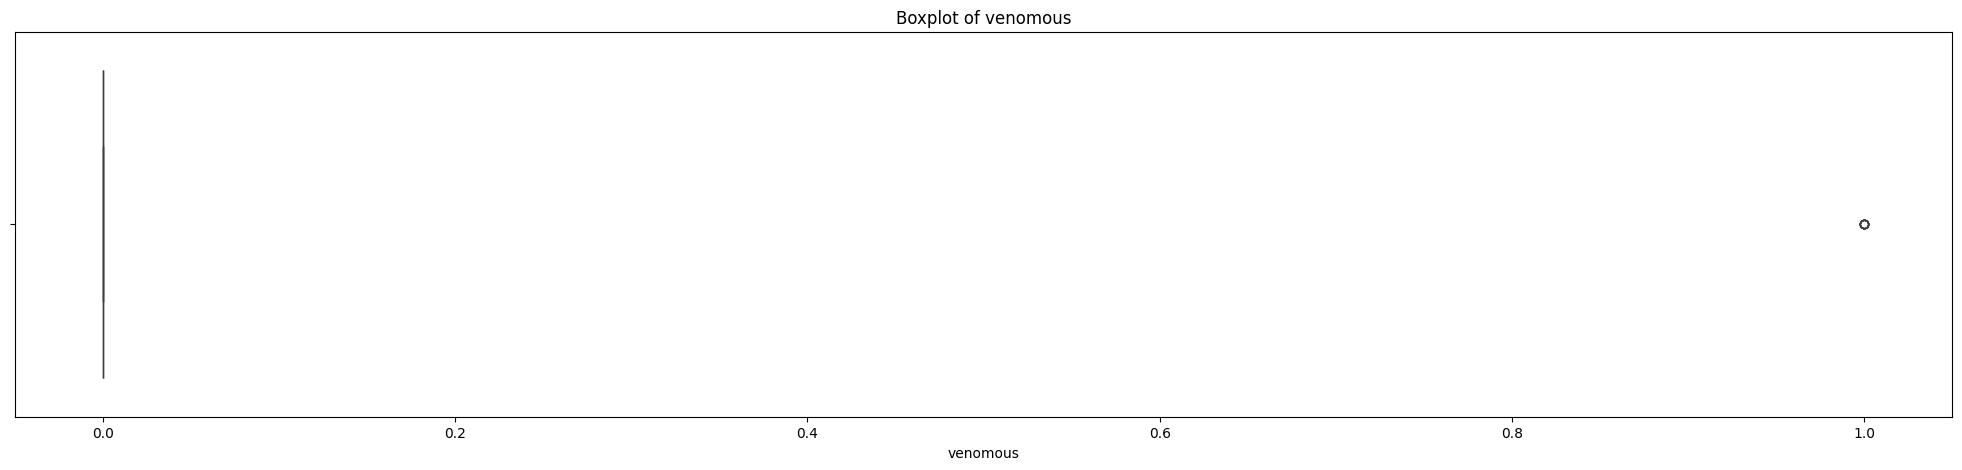

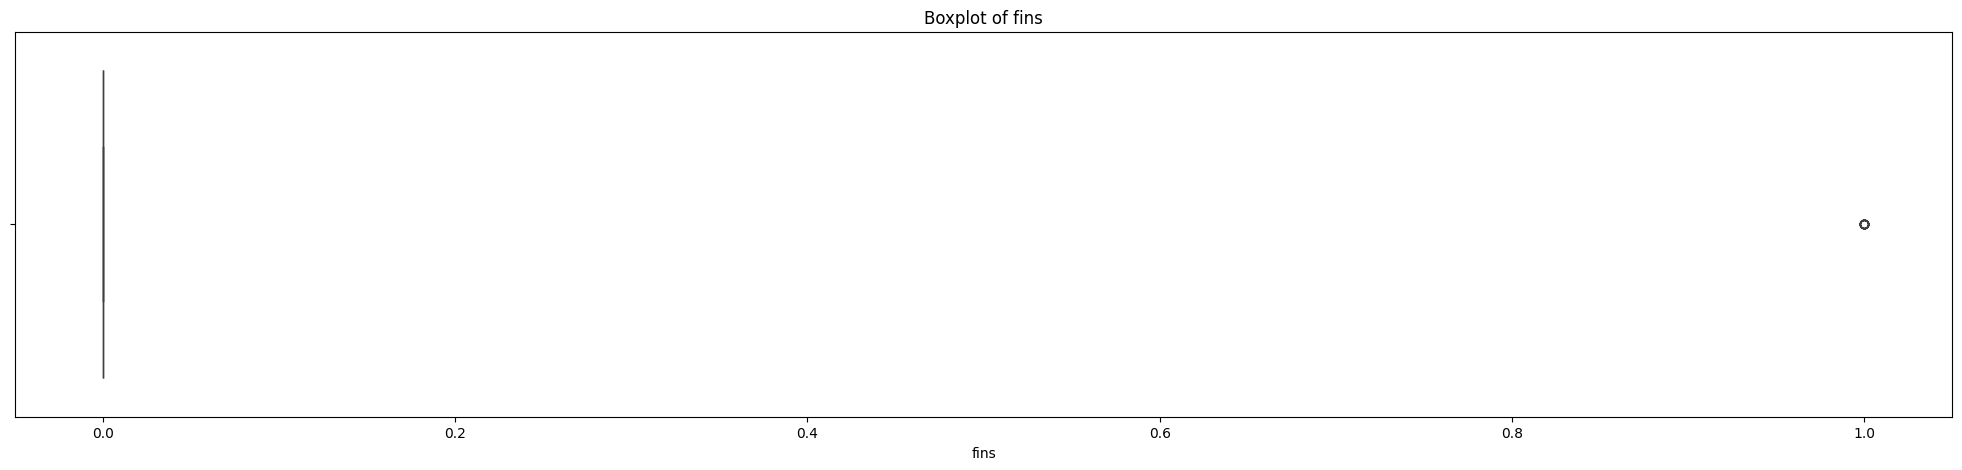

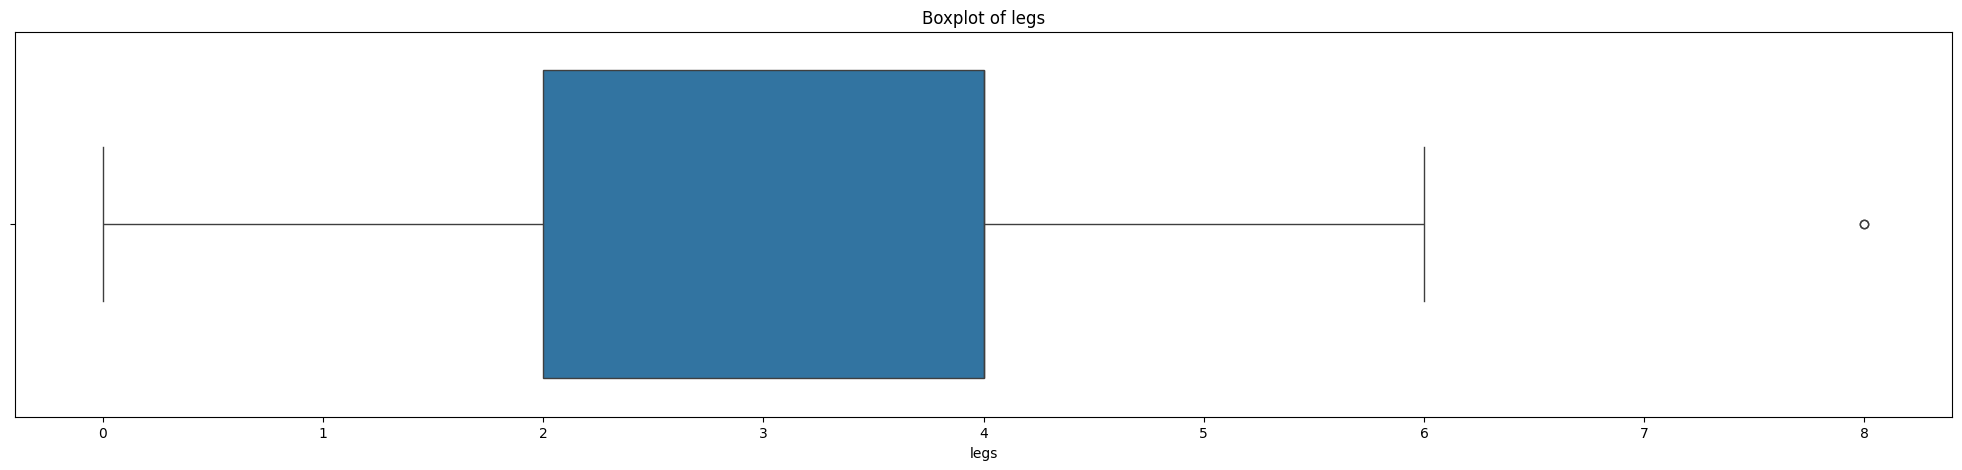

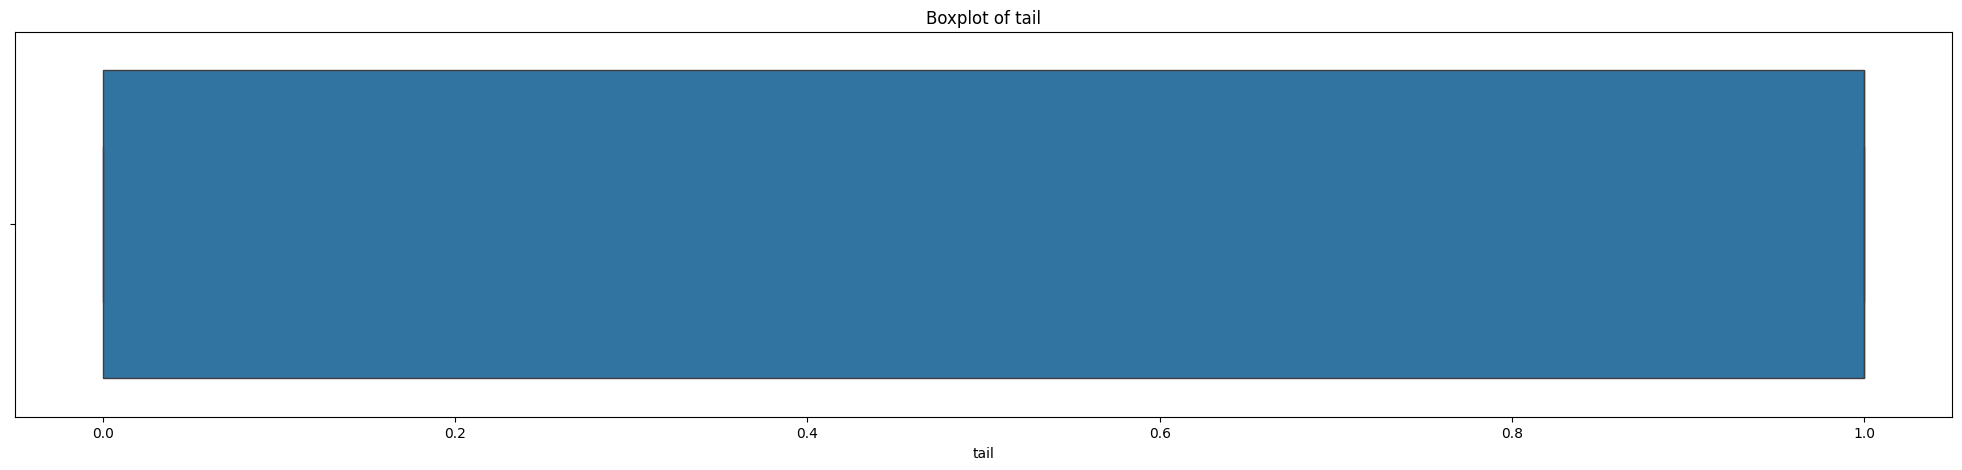

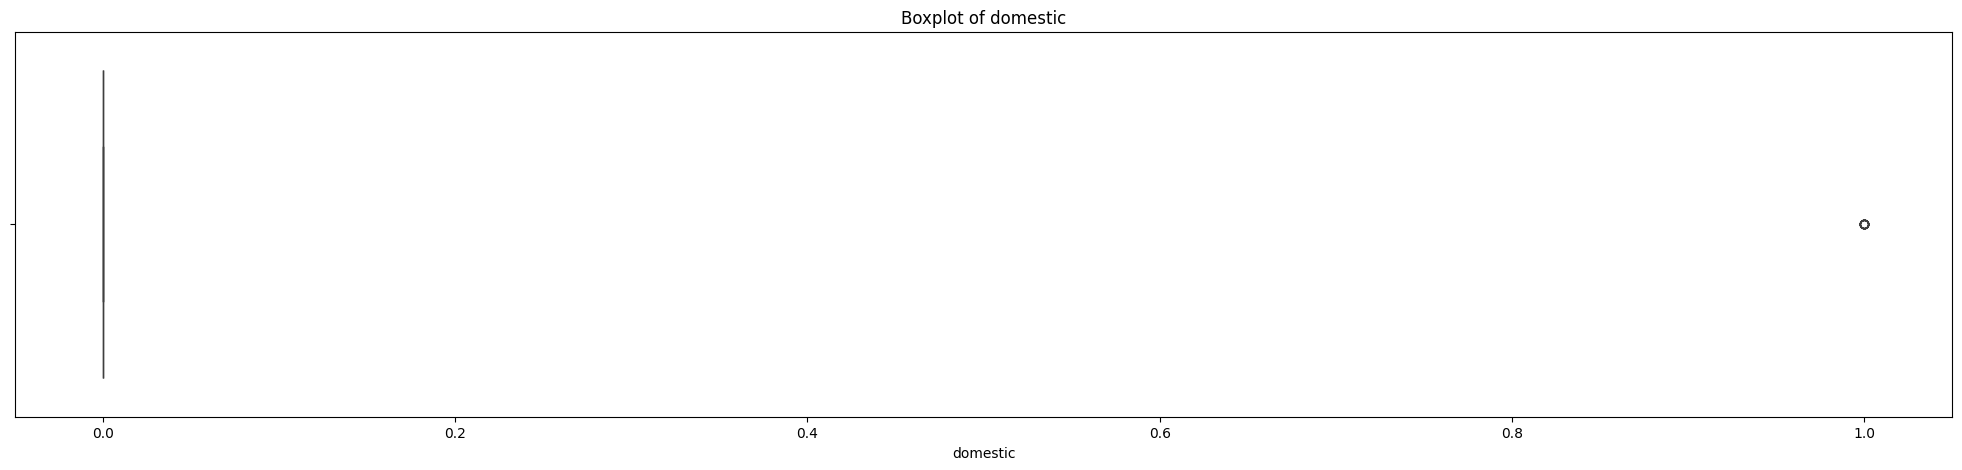

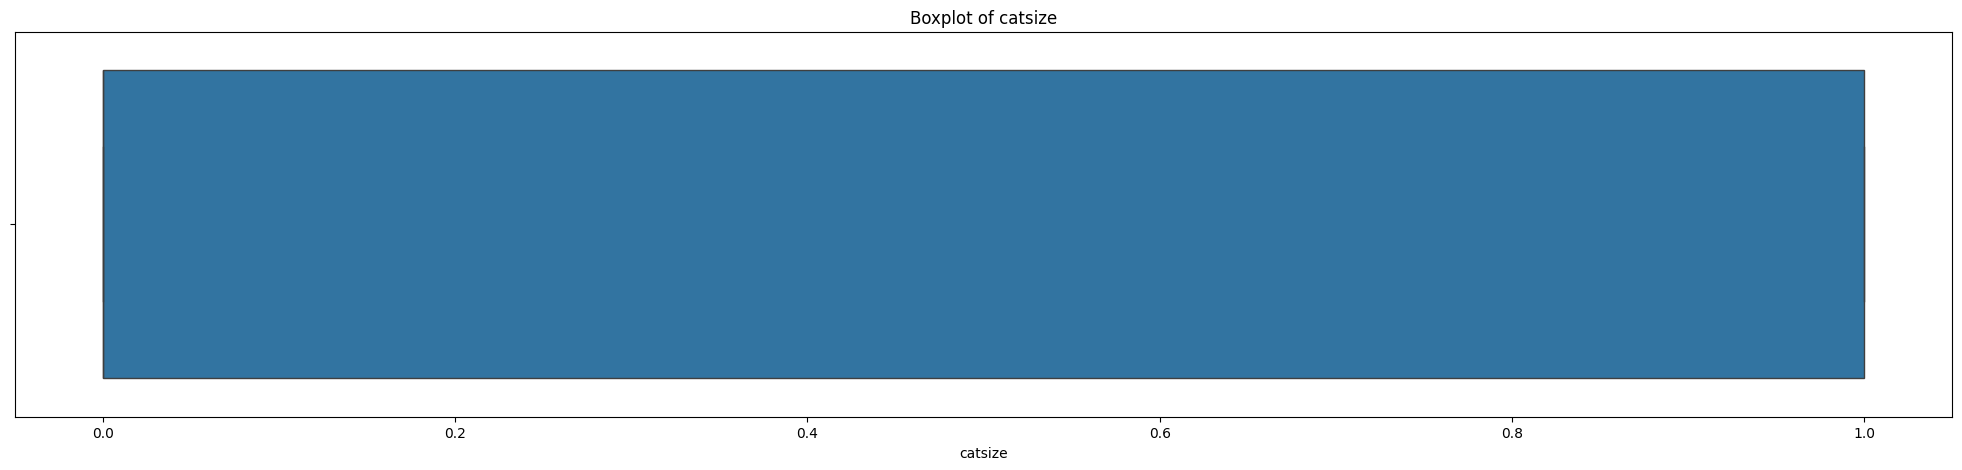

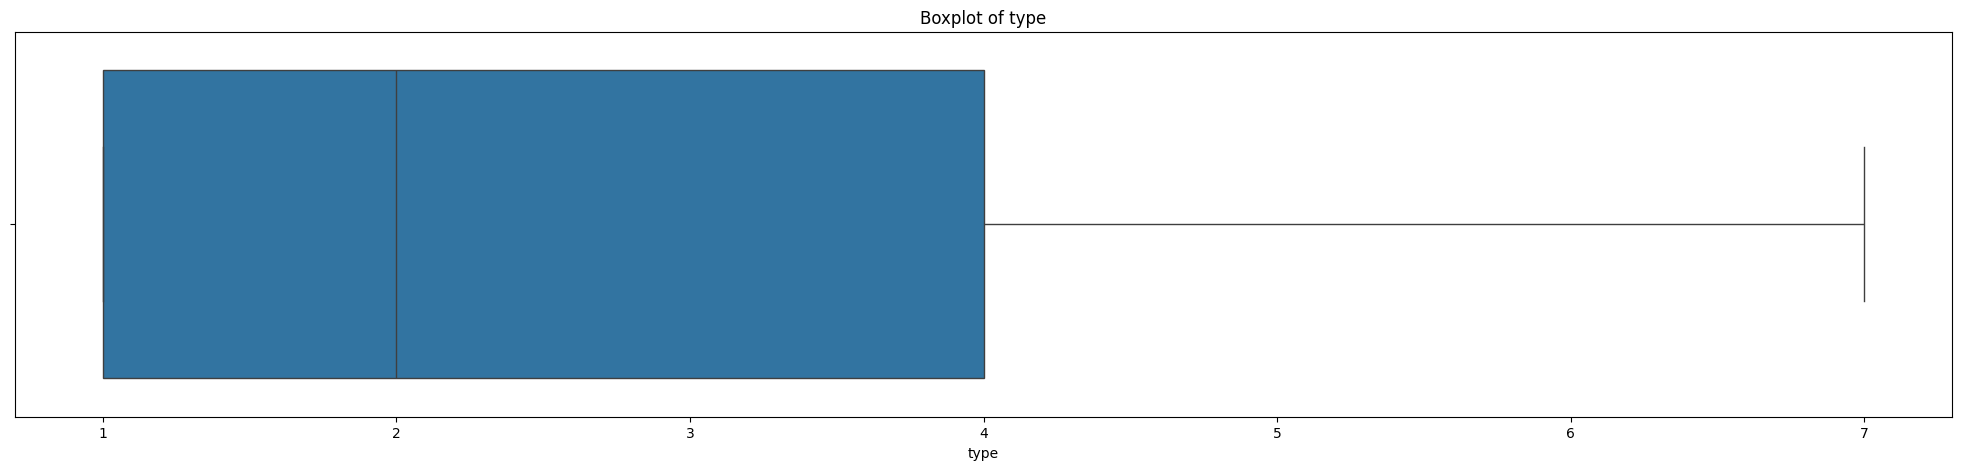

In [11]:
for i in df.select_dtypes(include='number').columns:
  plt.figure(figsize=(25,5))
  sns.boxplot(df[i], orient='h')
  plt.title(f"Boxplot of {i}")
  plt.show()

<ipython-input-12-f5774654bba3>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


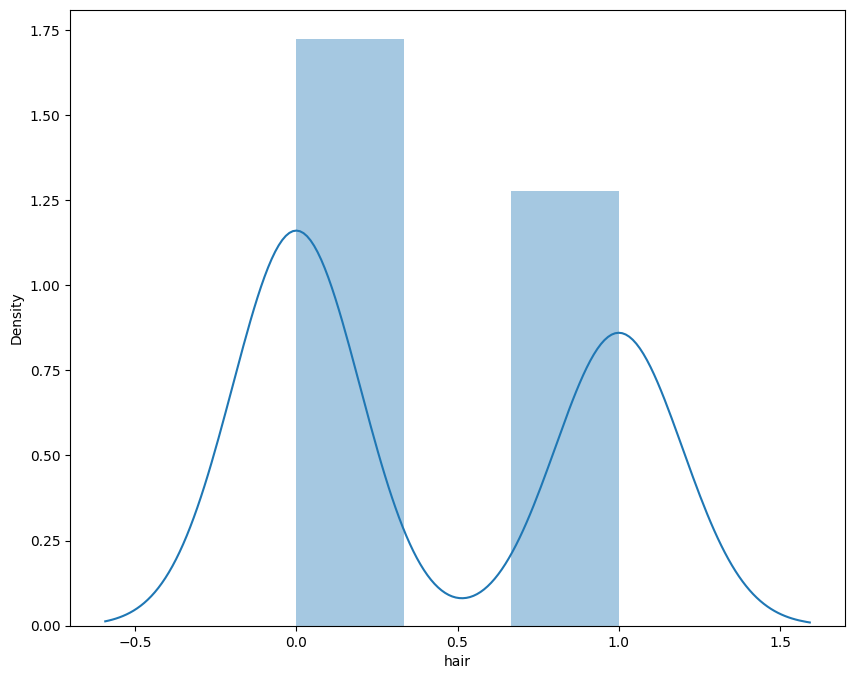

<ipython-input-12-f5774654bba3>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


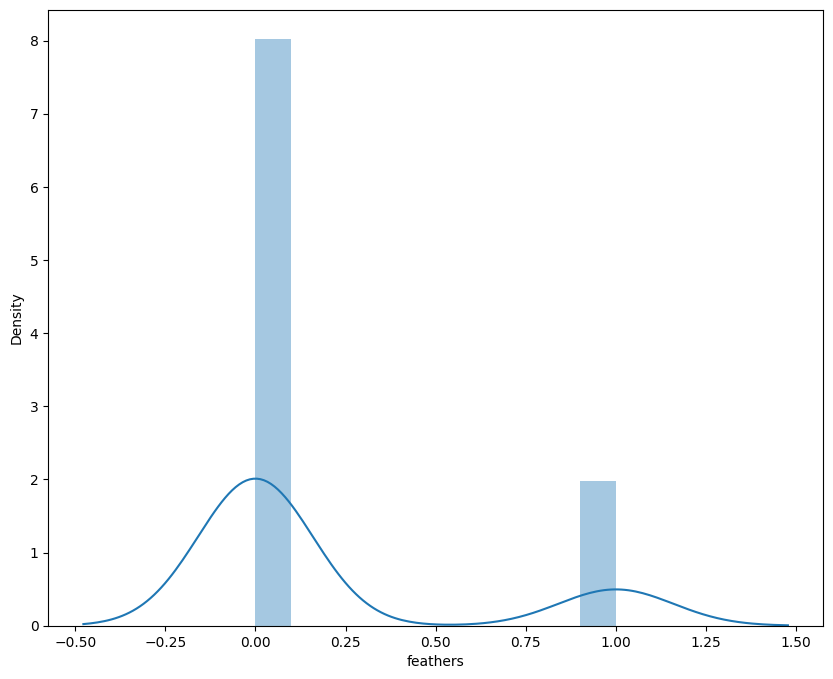

<ipython-input-12-f5774654bba3>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


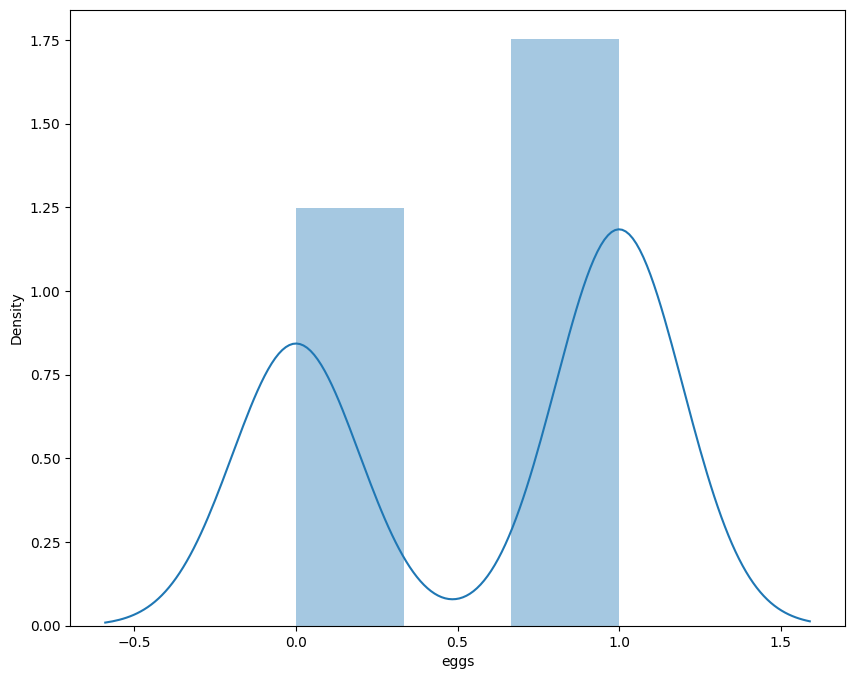

<ipython-input-12-f5774654bba3>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


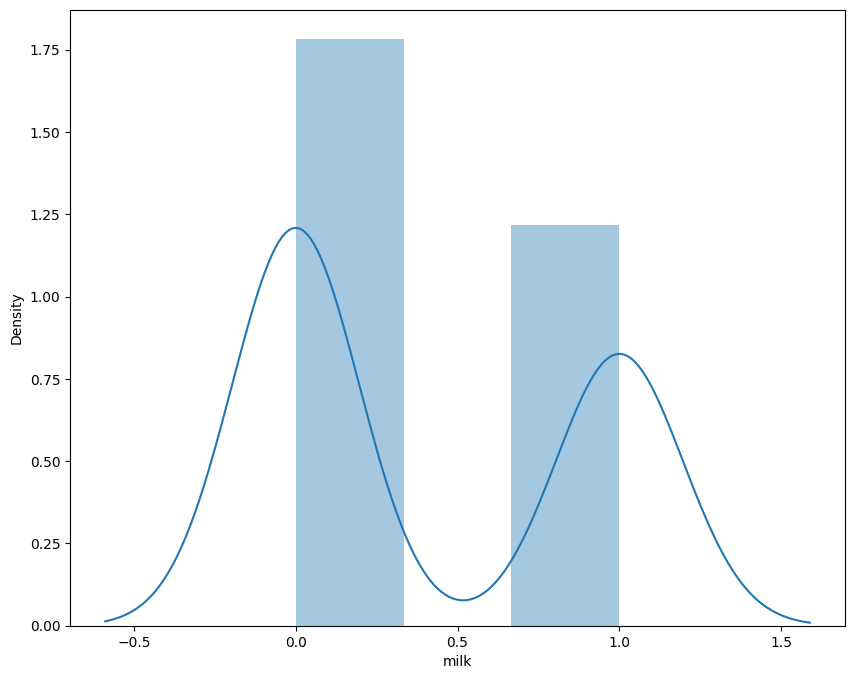

<ipython-input-12-f5774654bba3>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


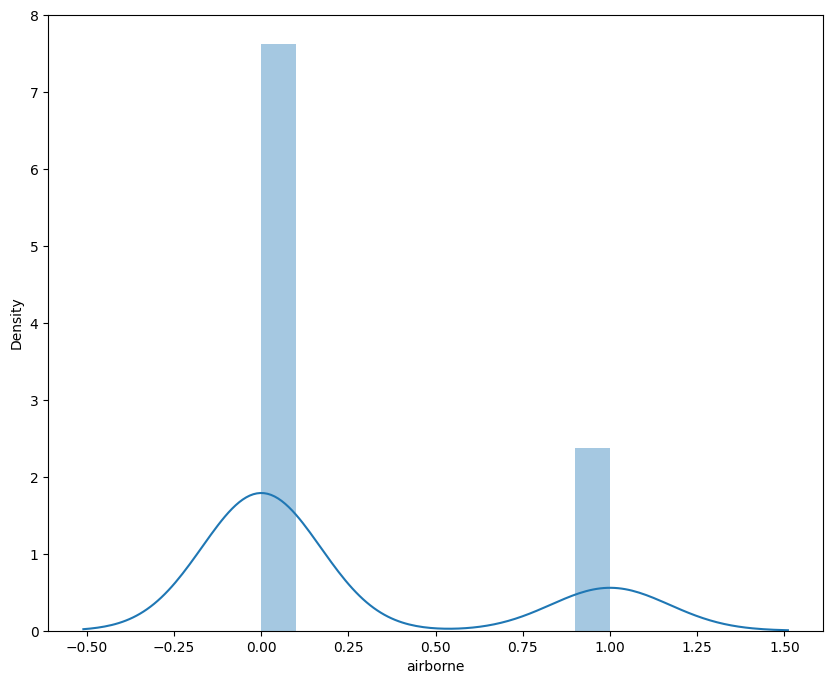

<ipython-input-12-f5774654bba3>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


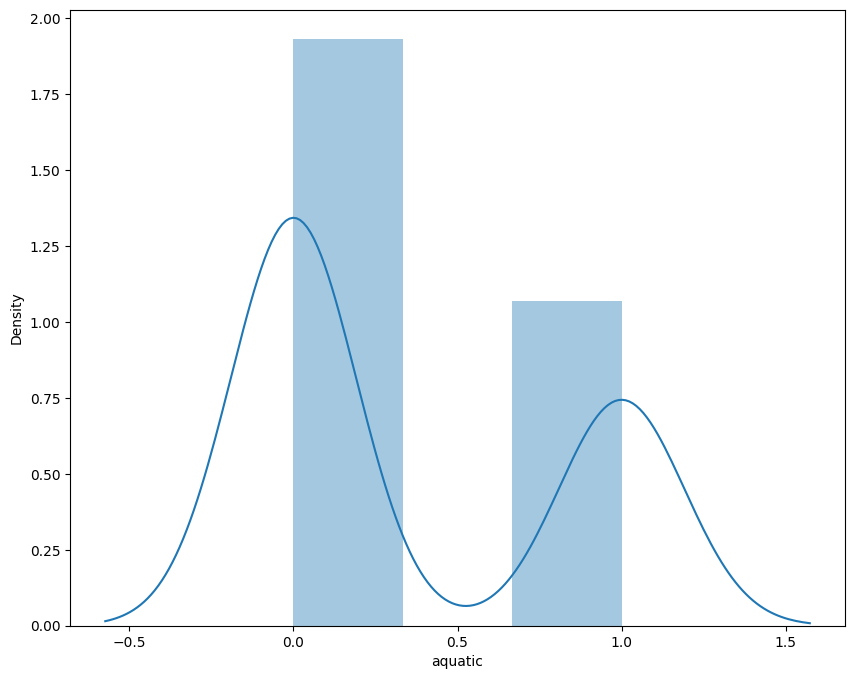

<ipython-input-12-f5774654bba3>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


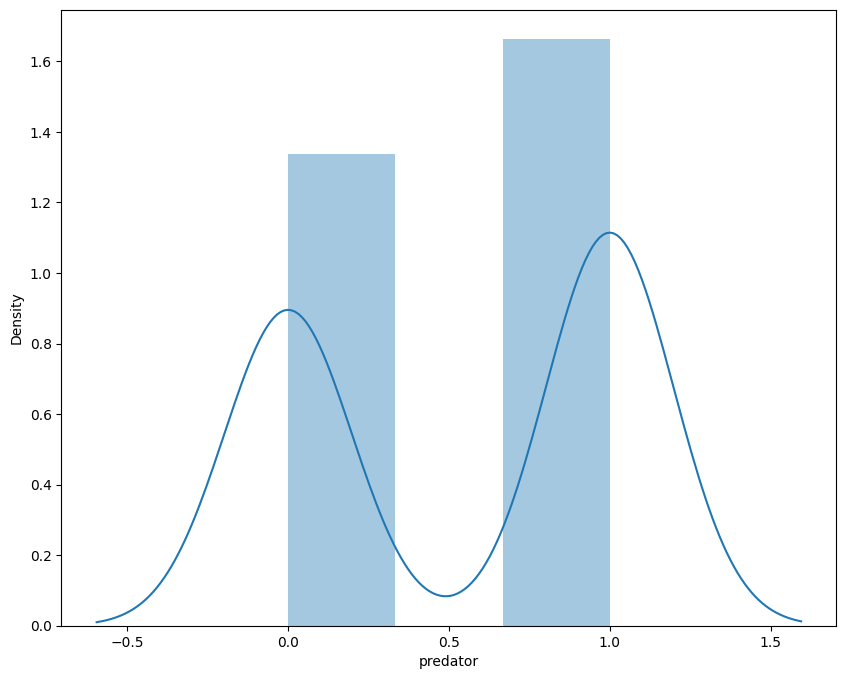

<ipython-input-12-f5774654bba3>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


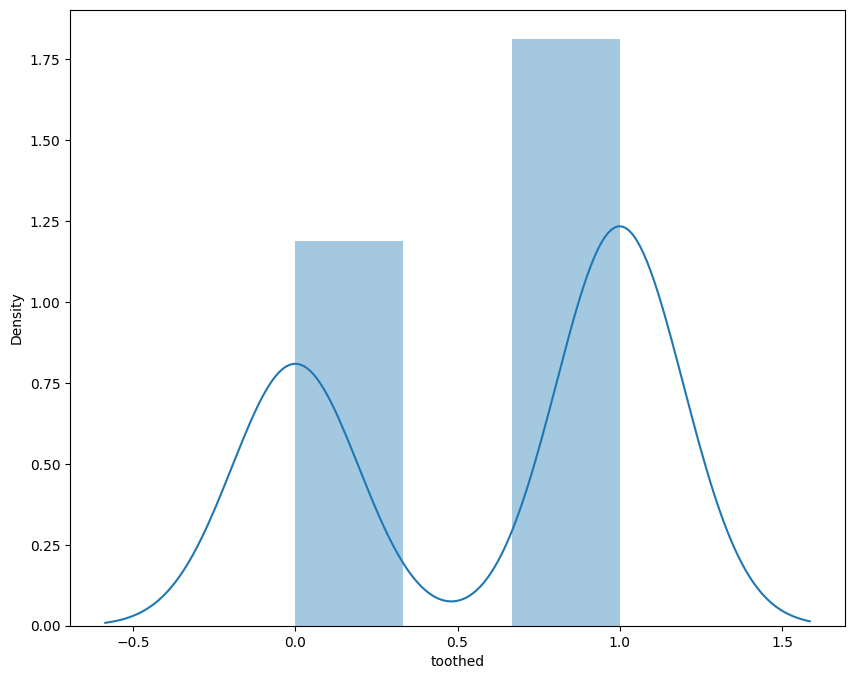

<ipython-input-12-f5774654bba3>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


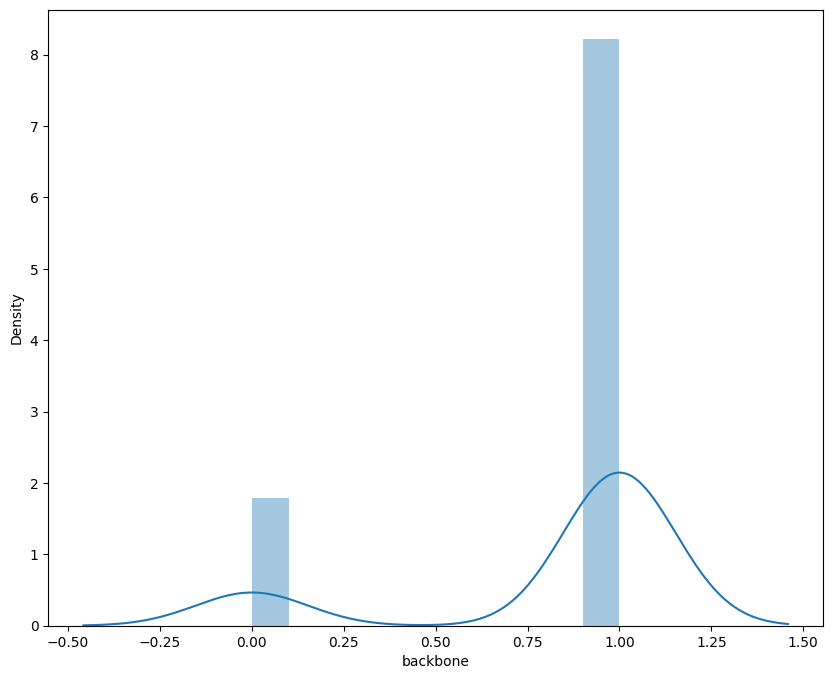

<ipython-input-12-f5774654bba3>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


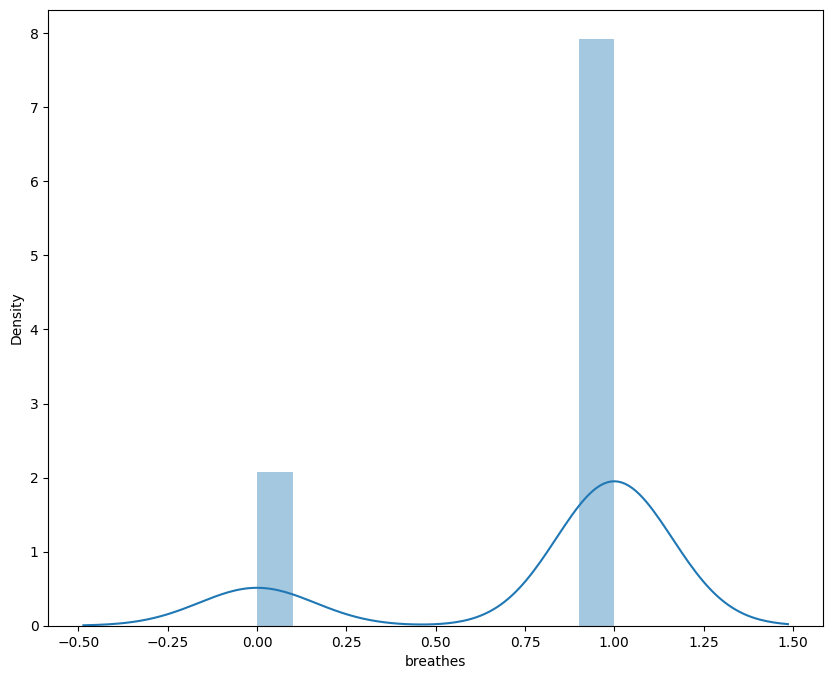

<ipython-input-12-f5774654bba3>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


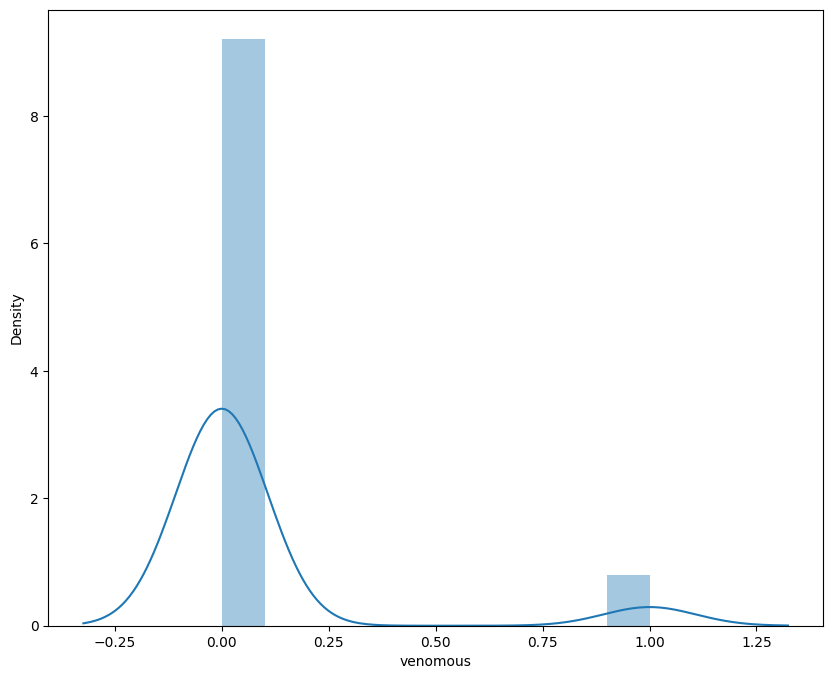

<ipython-input-12-f5774654bba3>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


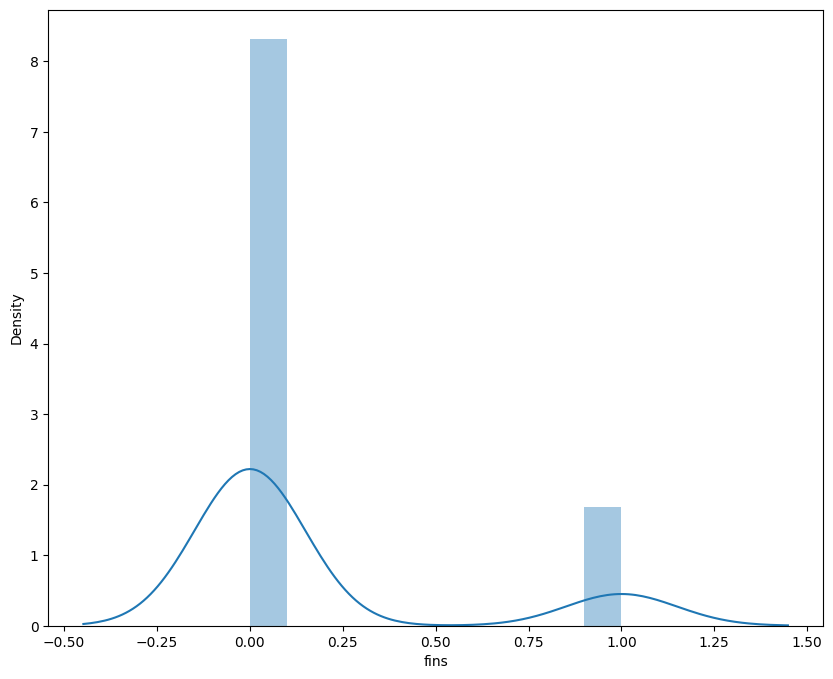

<ipython-input-12-f5774654bba3>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


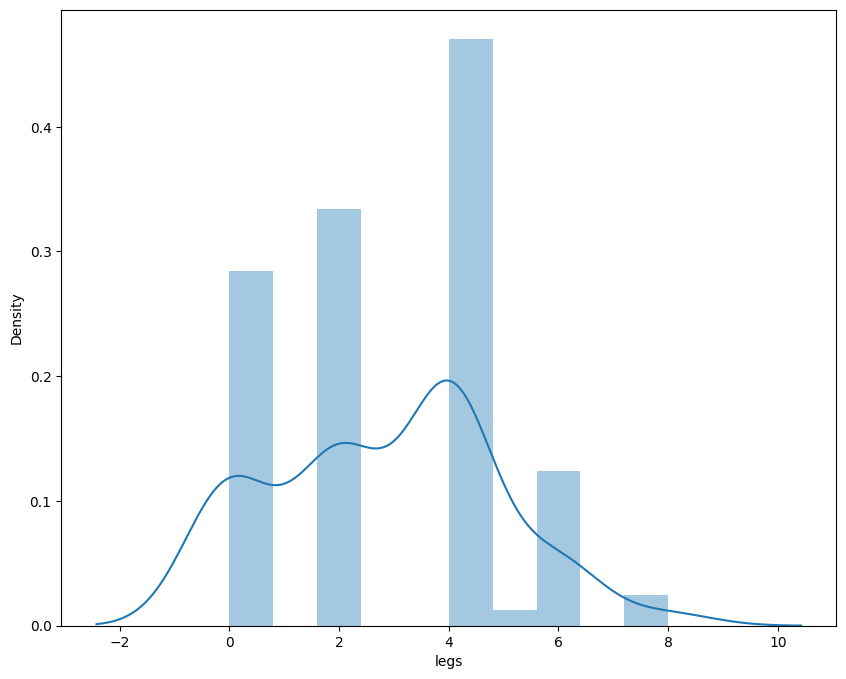

<ipython-input-12-f5774654bba3>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


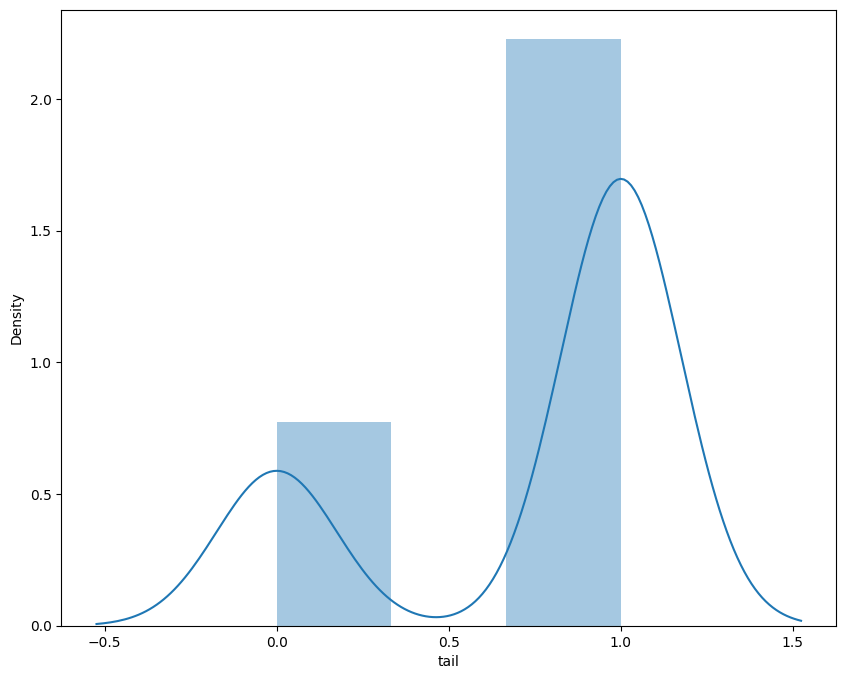

<ipython-input-12-f5774654bba3>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


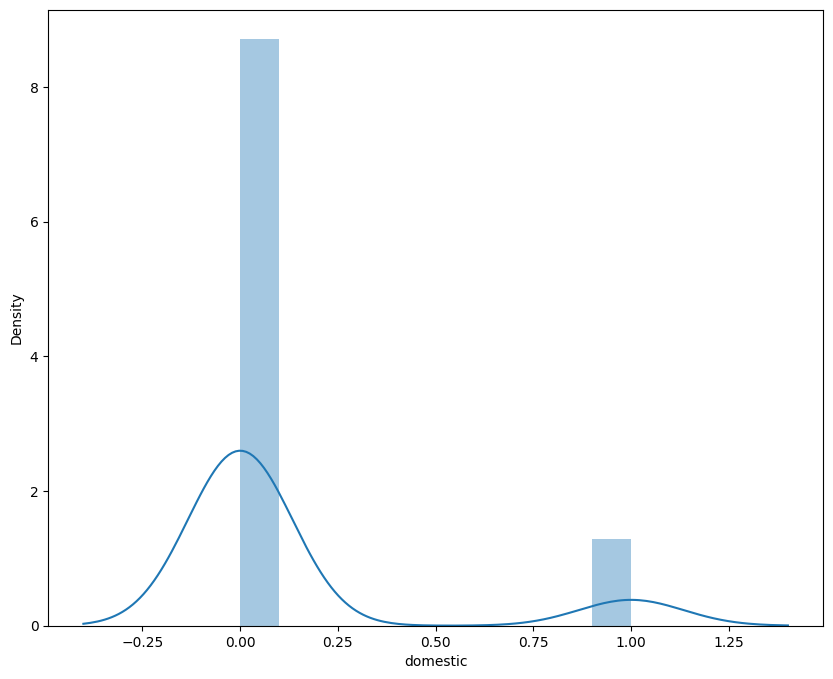

<ipython-input-12-f5774654bba3>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


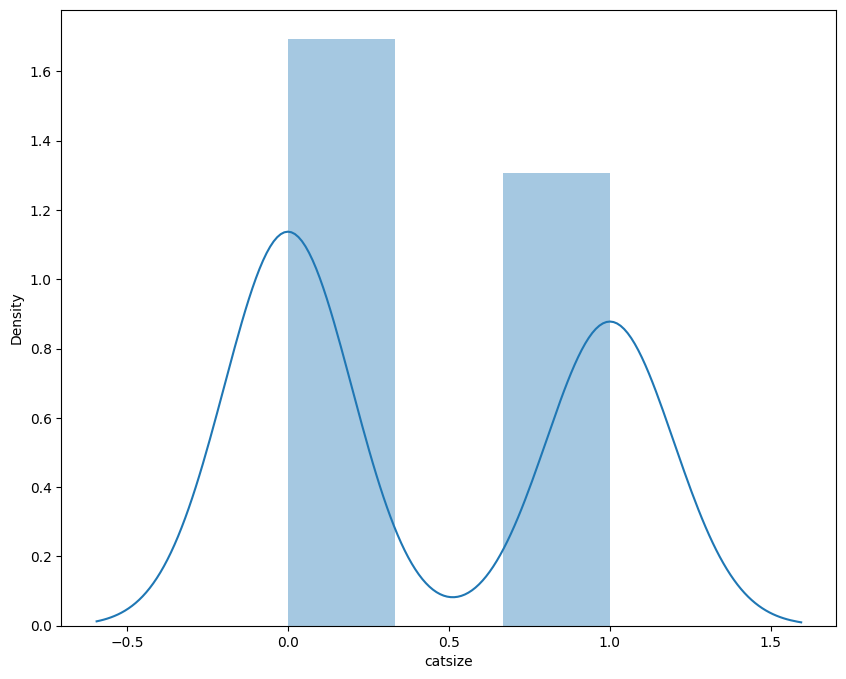

<ipython-input-12-f5774654bba3>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


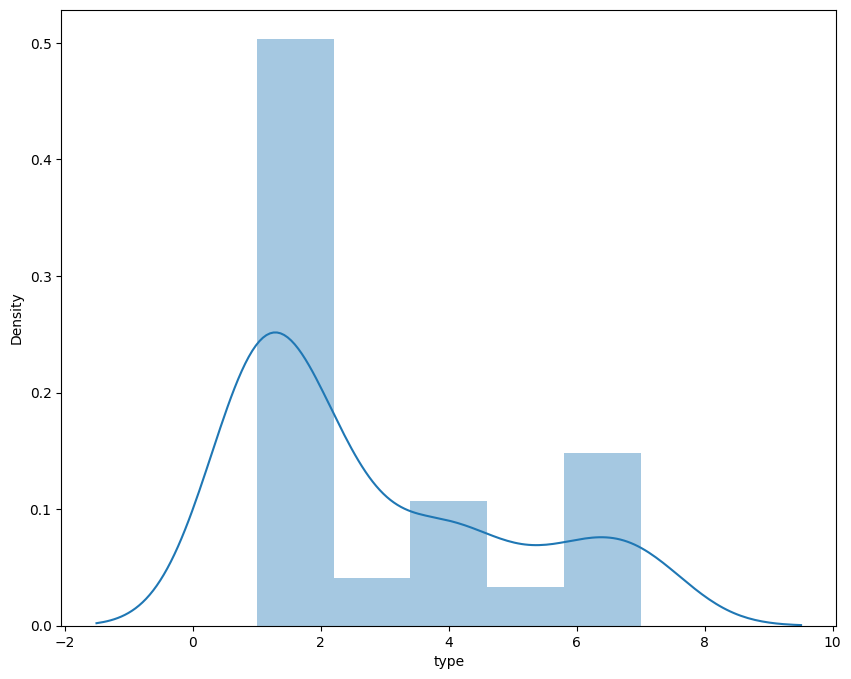

In [12]:
for i in df.select_dtypes(include='number').columns:
  plt.figure(figsize=(10,8))
  sns.distplot(df[i])
  plt.show()

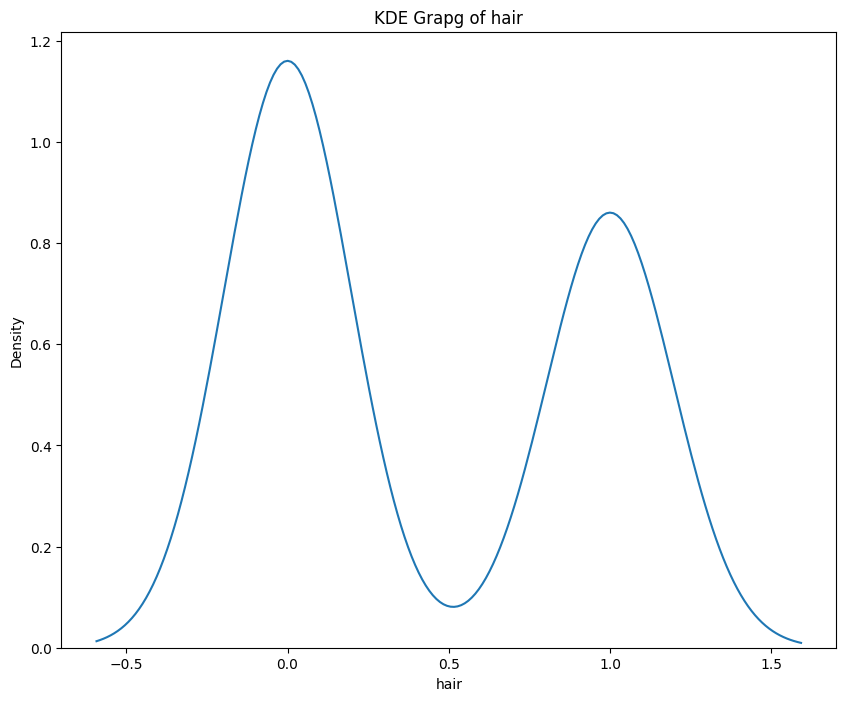

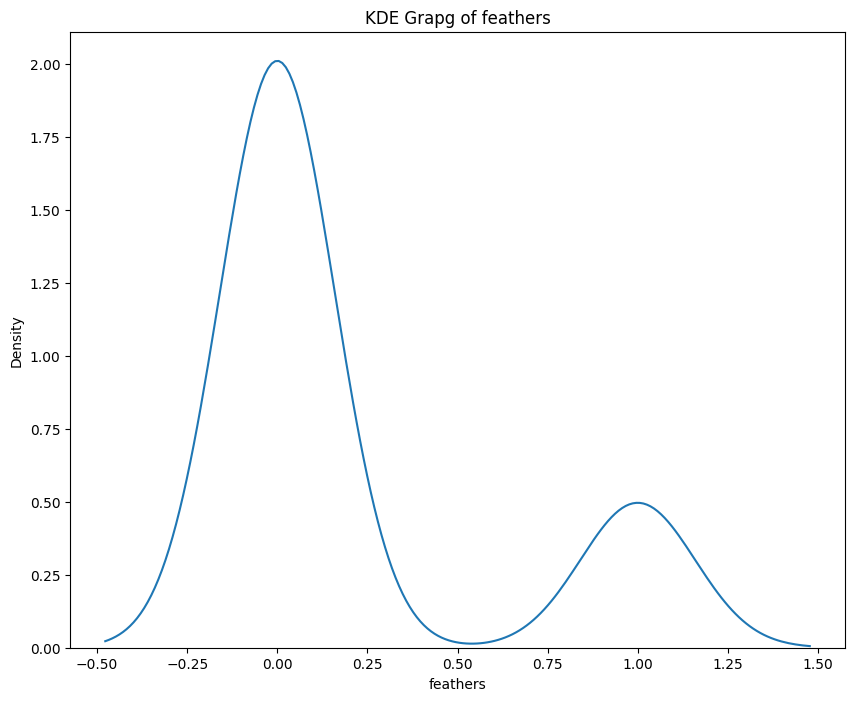

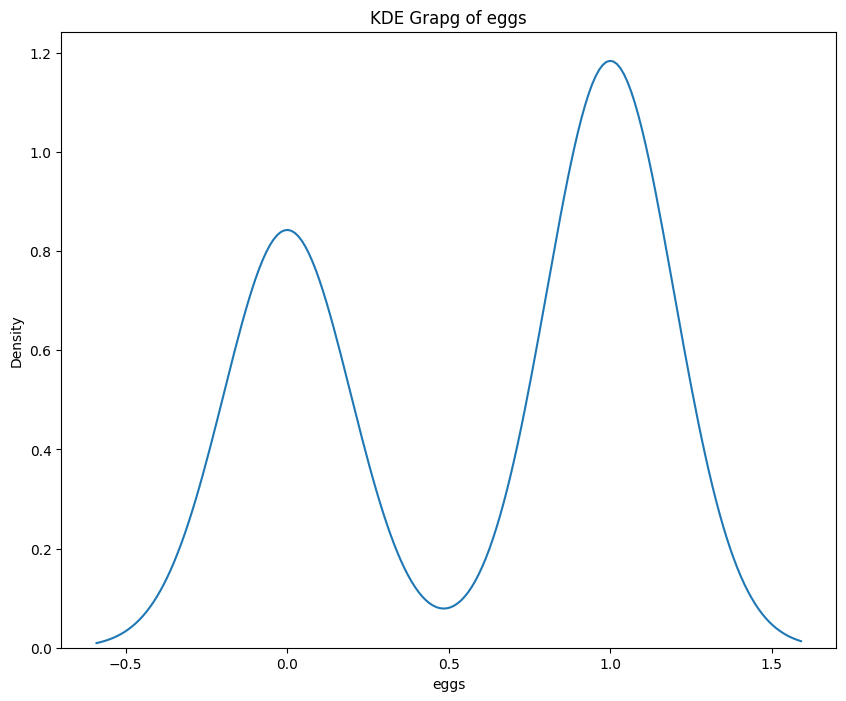

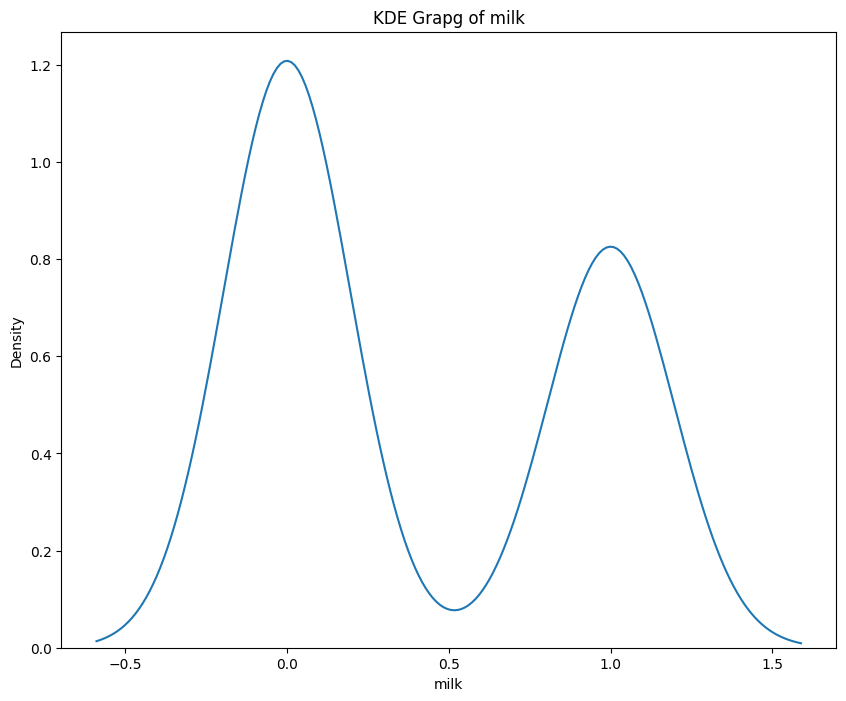

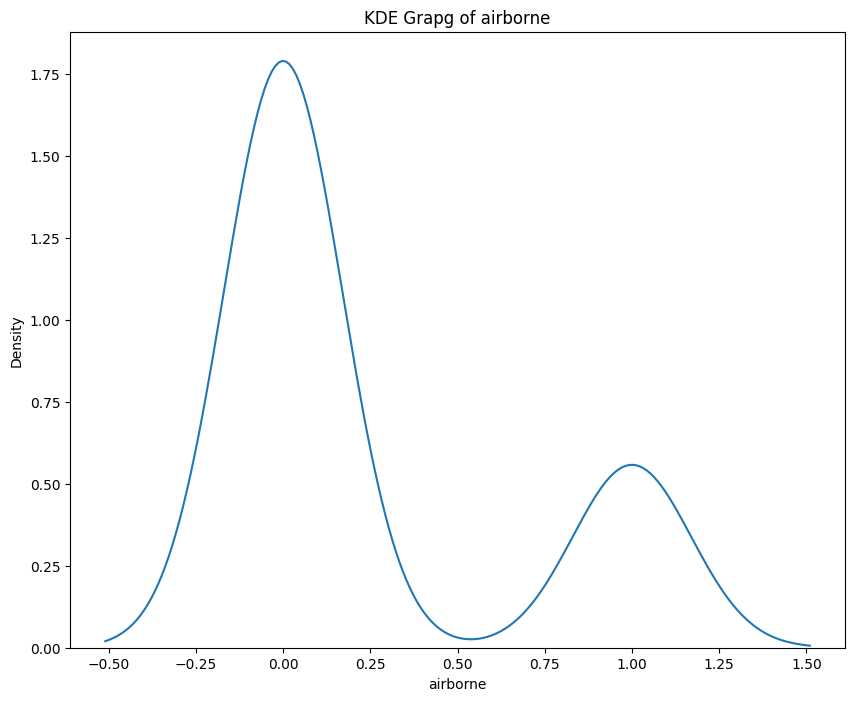

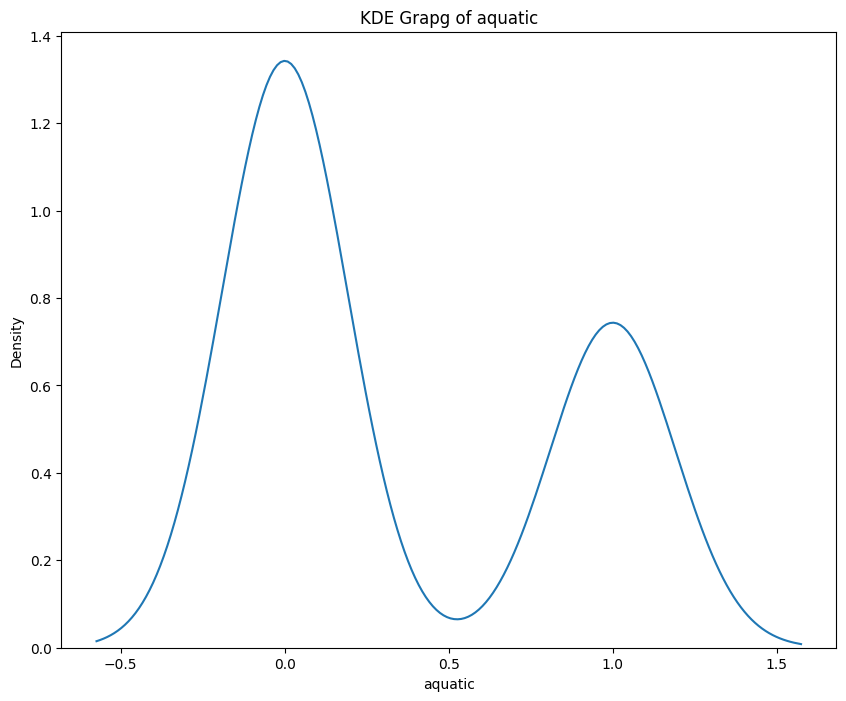

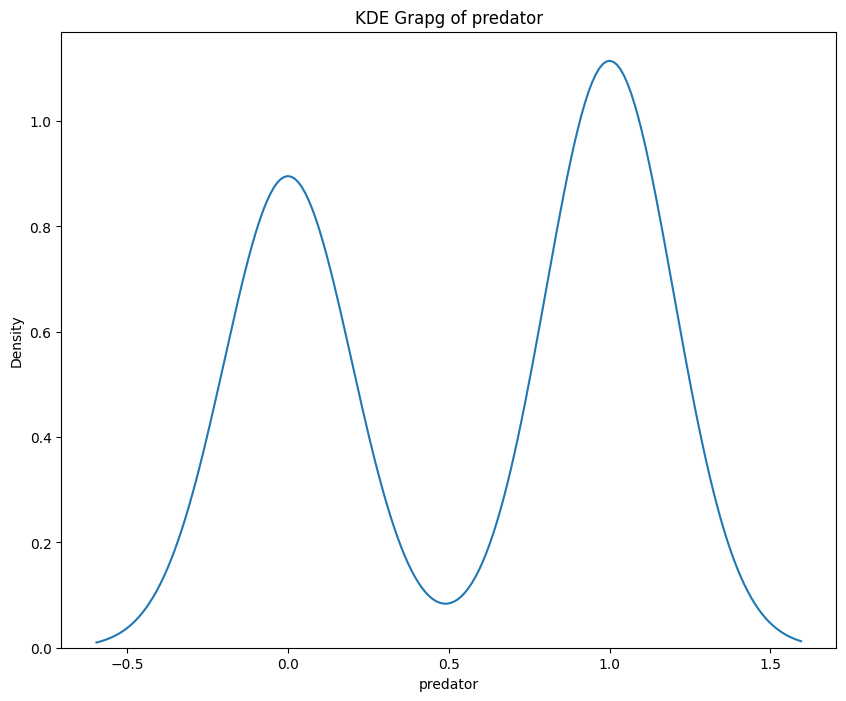

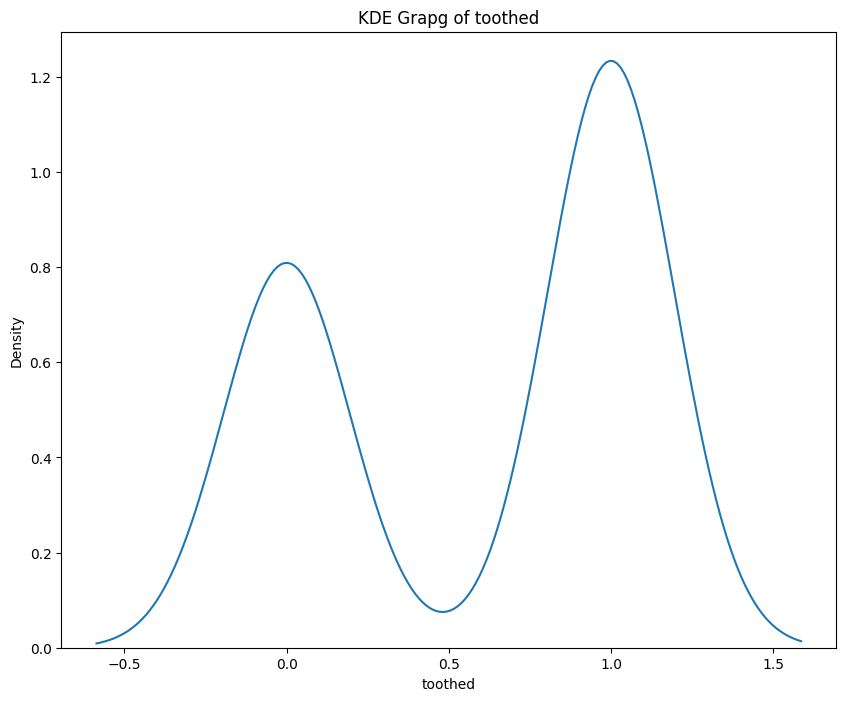

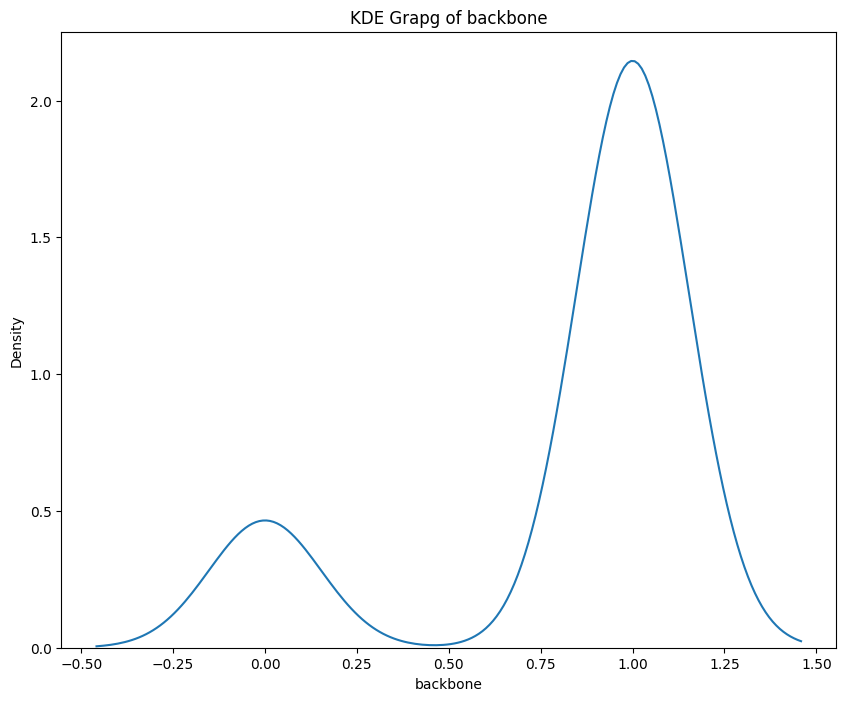

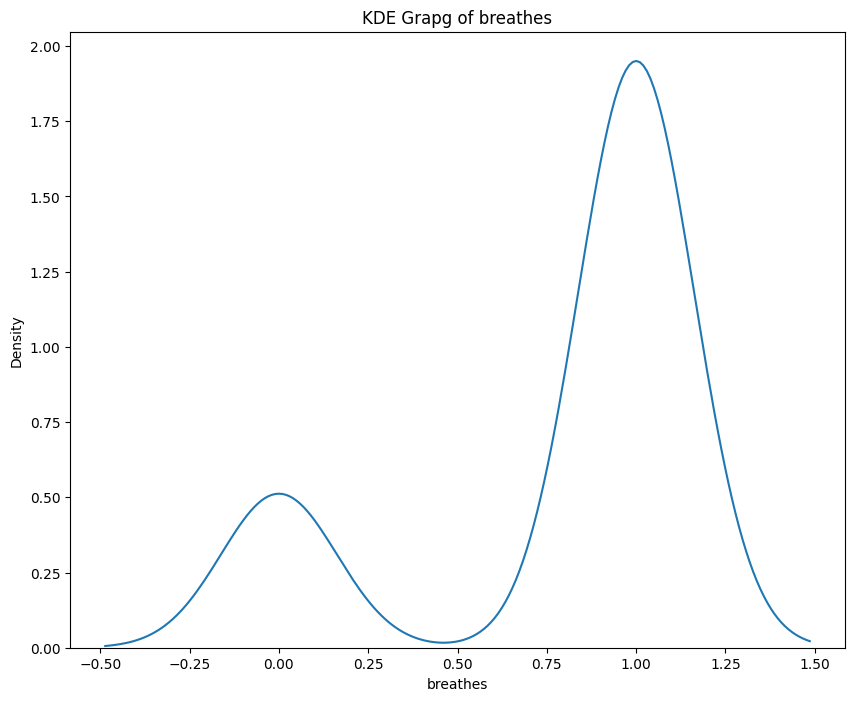

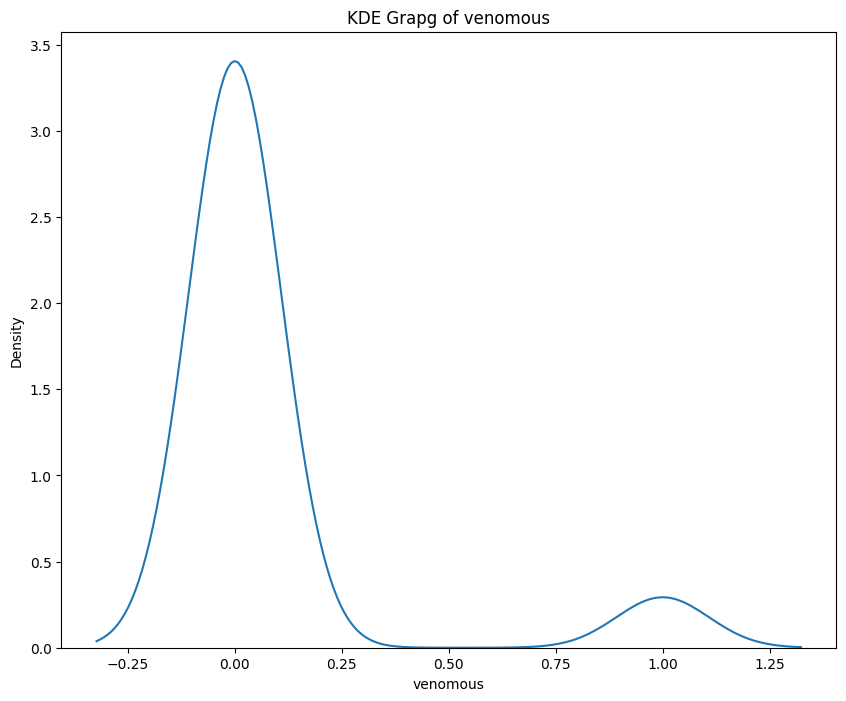

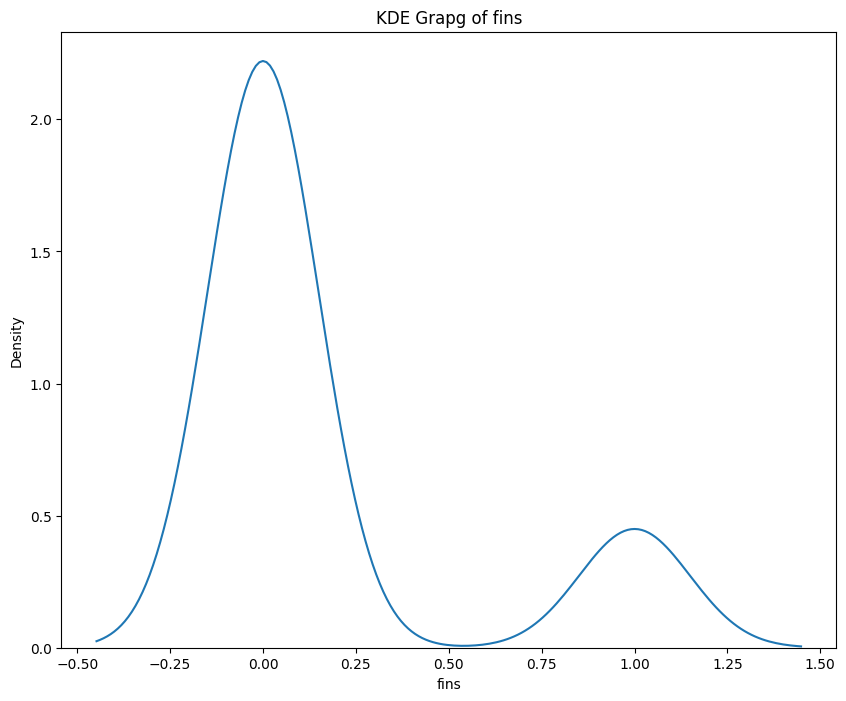

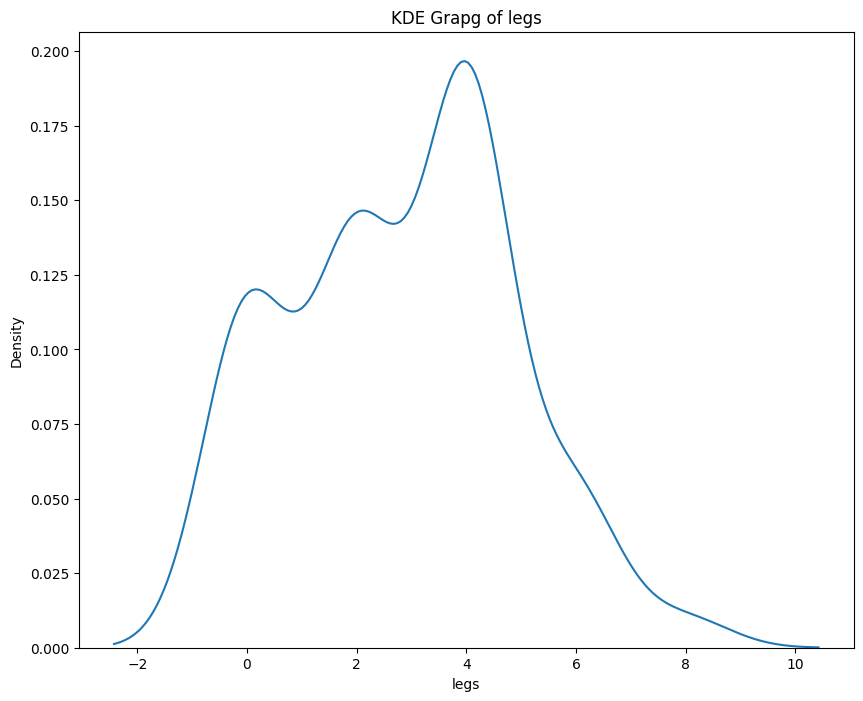

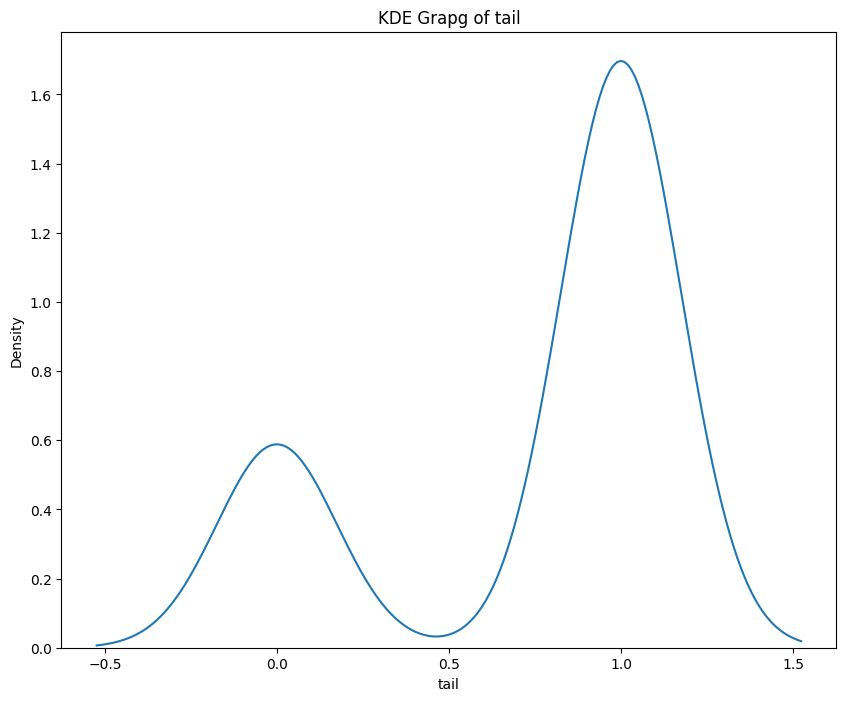

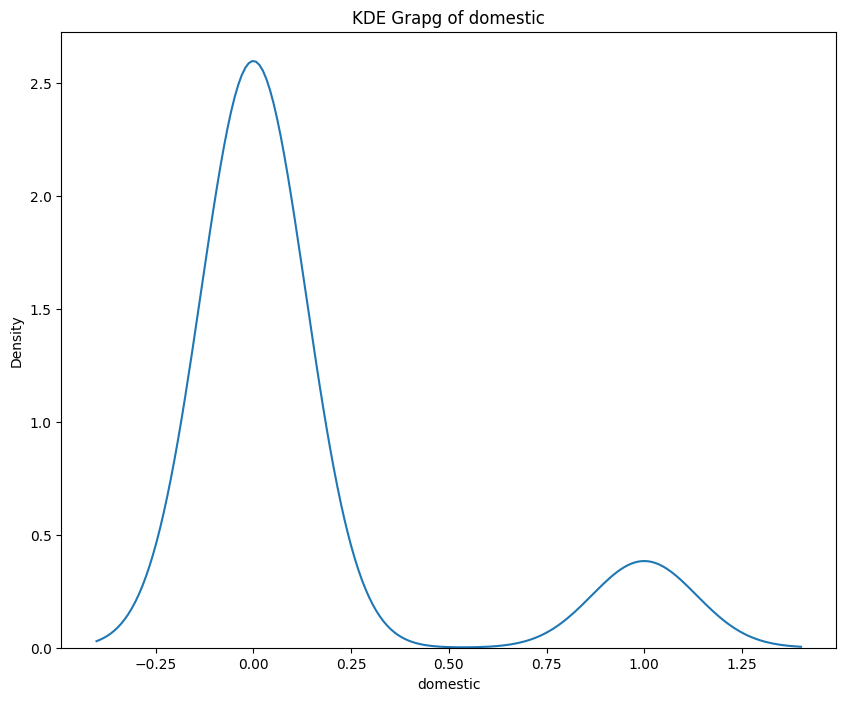

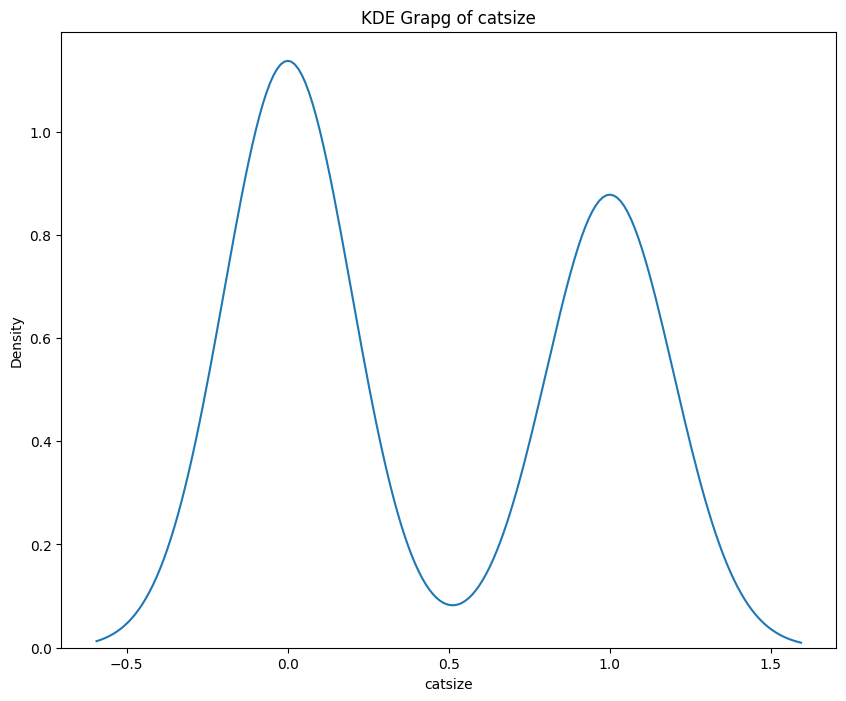

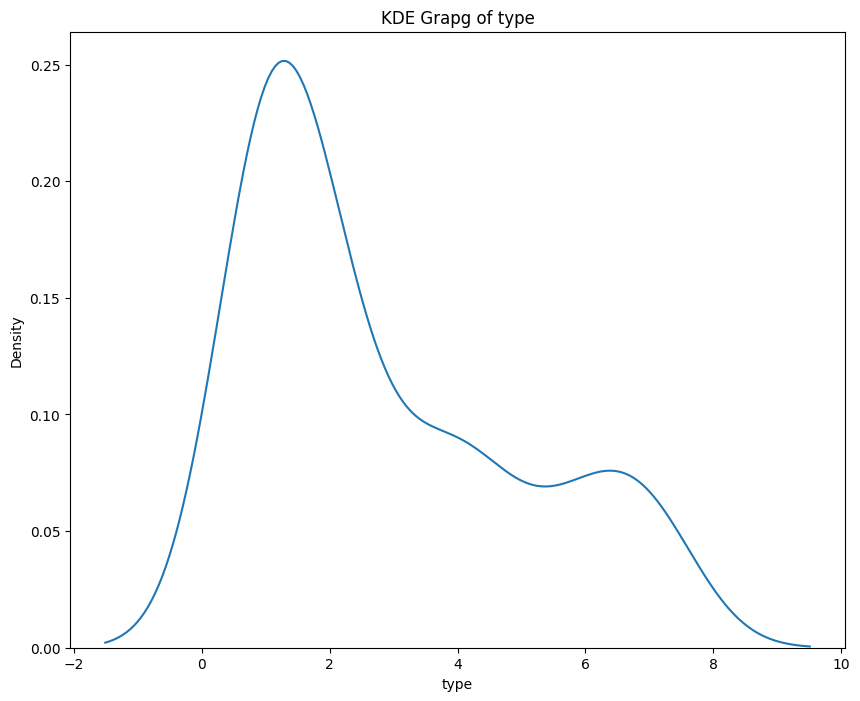

In [13]:
for i in df.select_dtypes(include='number').columns:
  plt.figure(figsize=(10,8))
  plt.title(f"KDE Grapg of {i}")
  sns.kdeplot(df[i])
  plt.show()

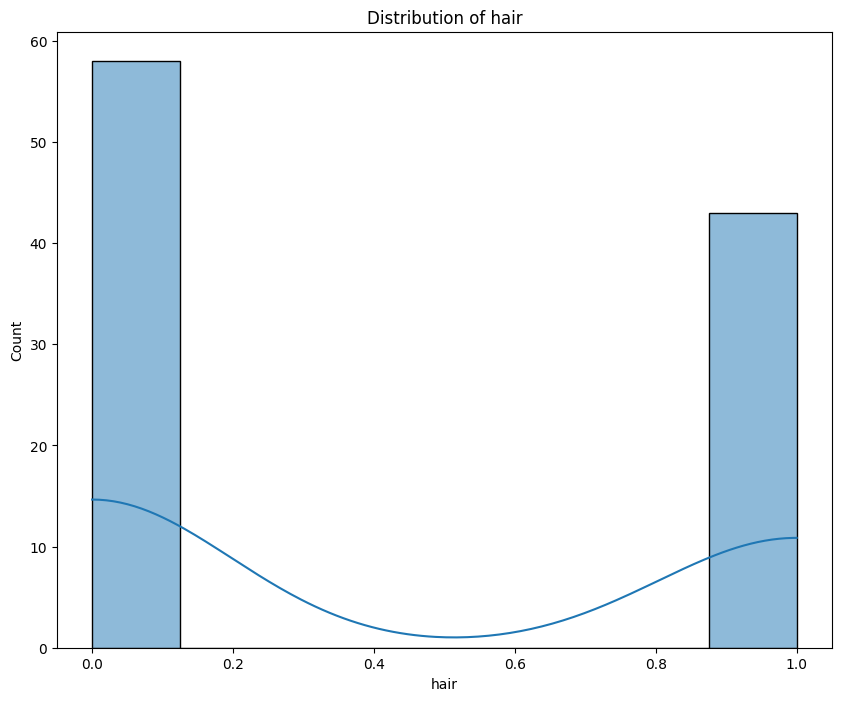

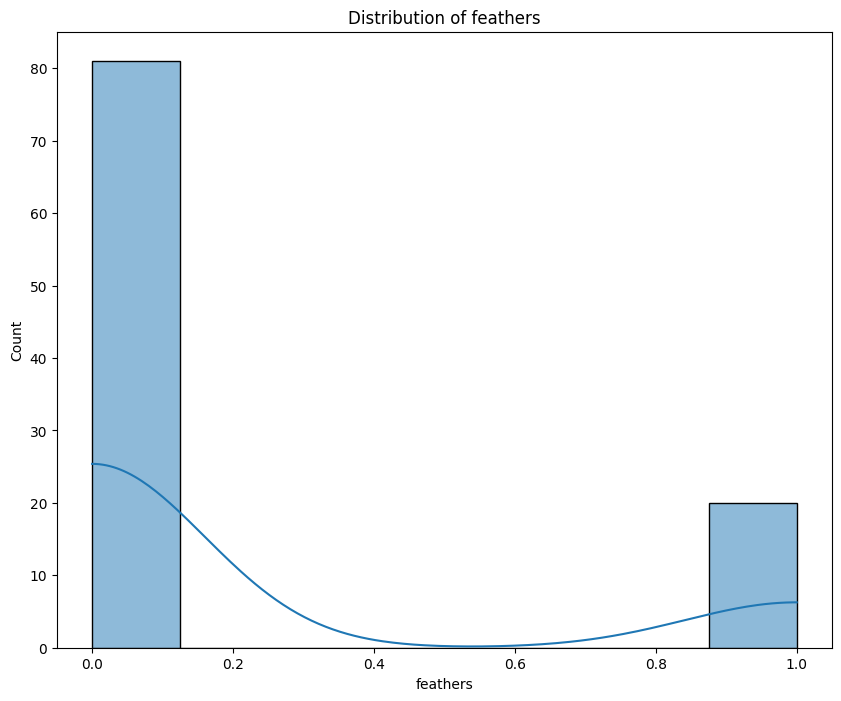

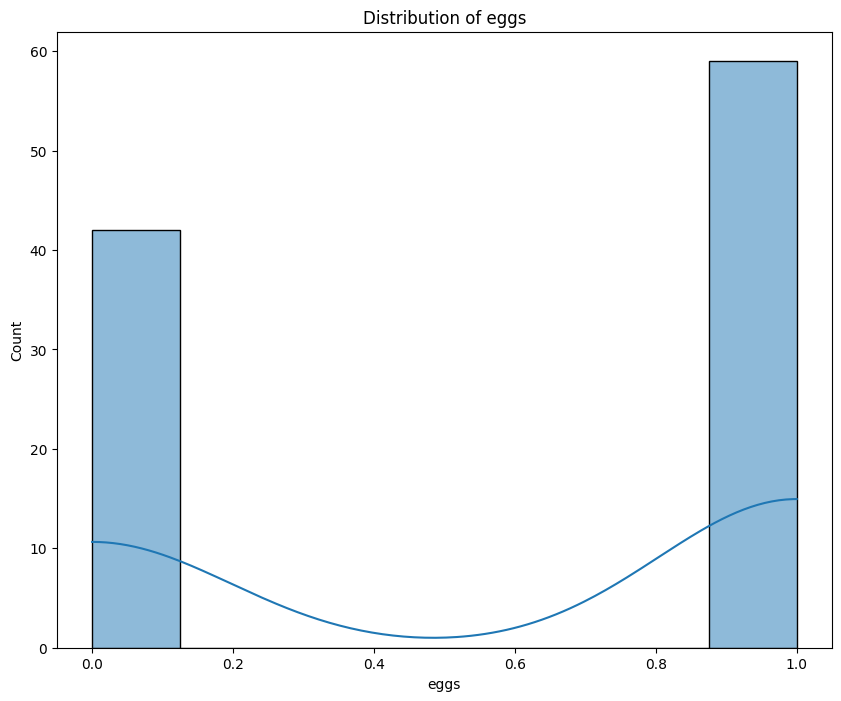

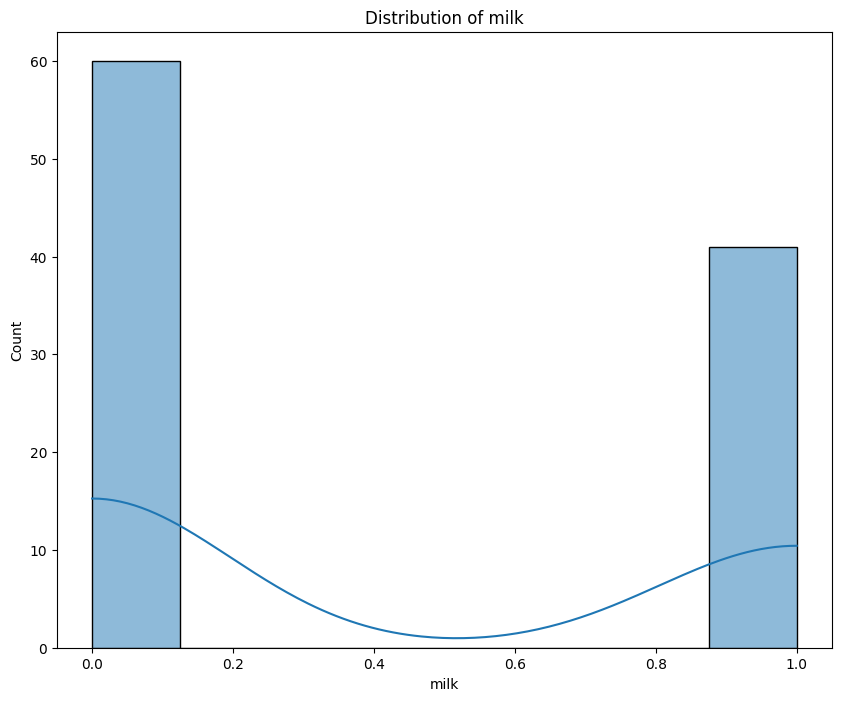

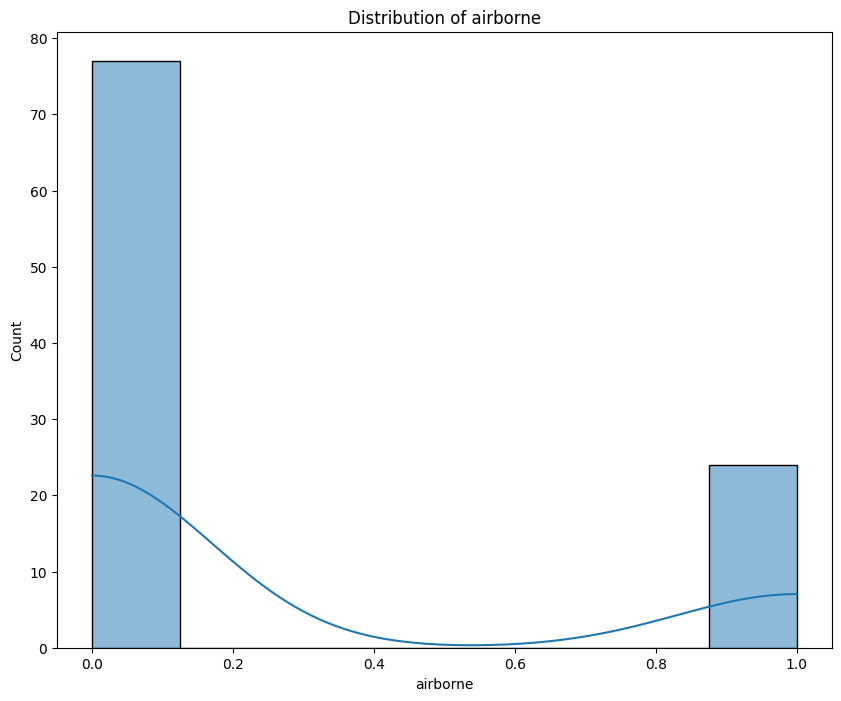

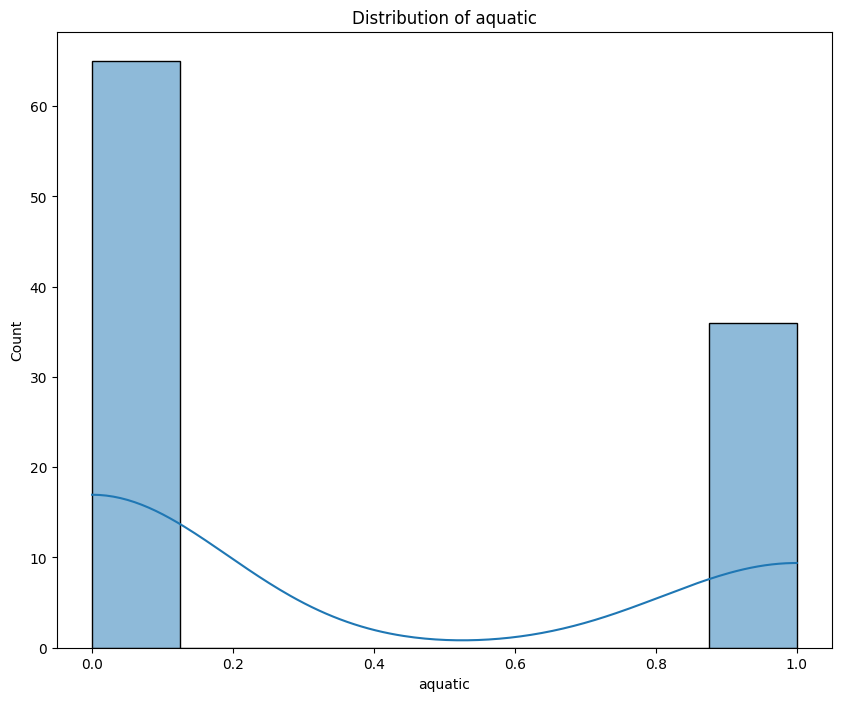

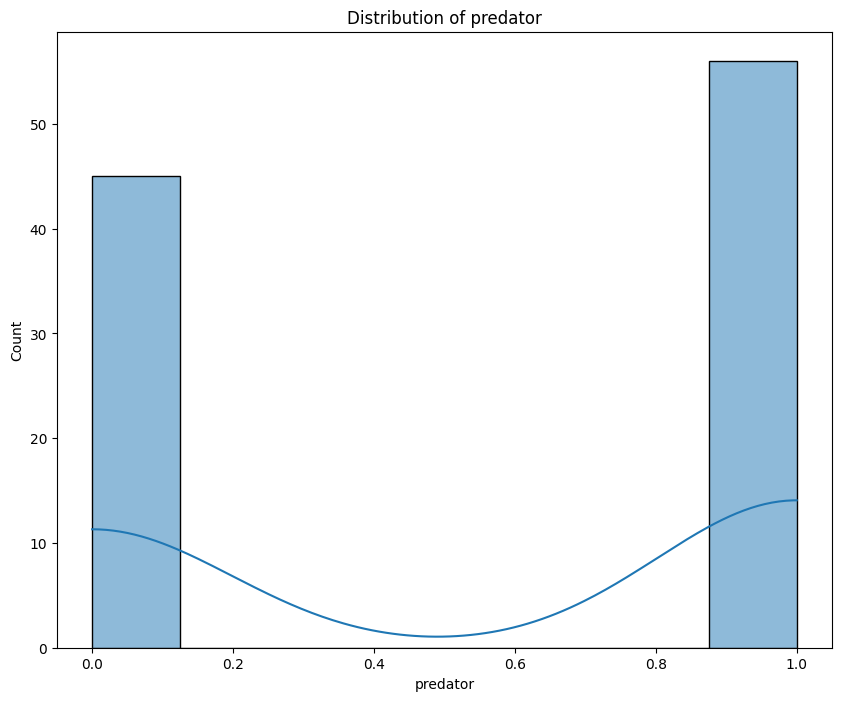

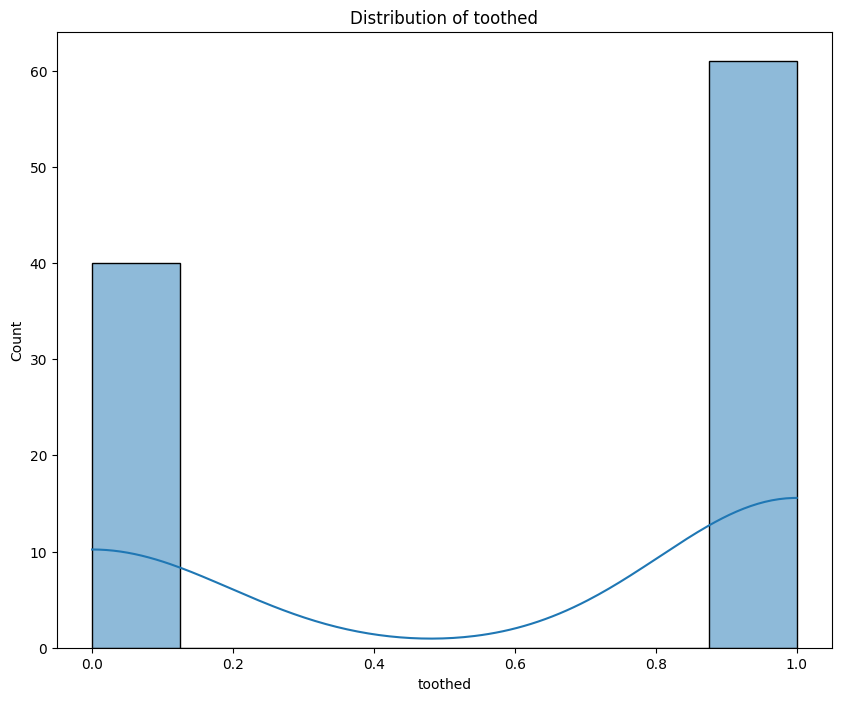

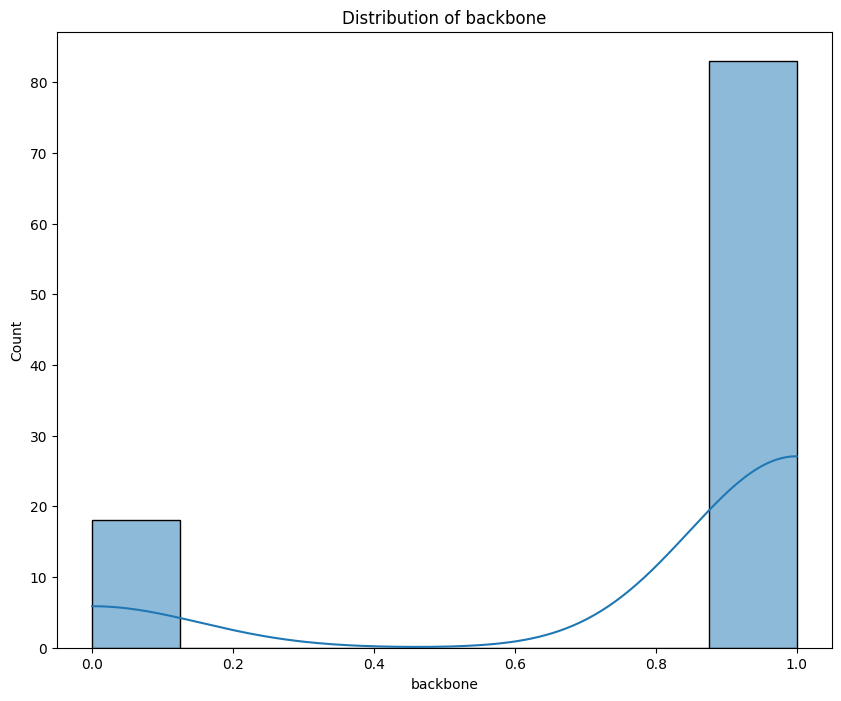

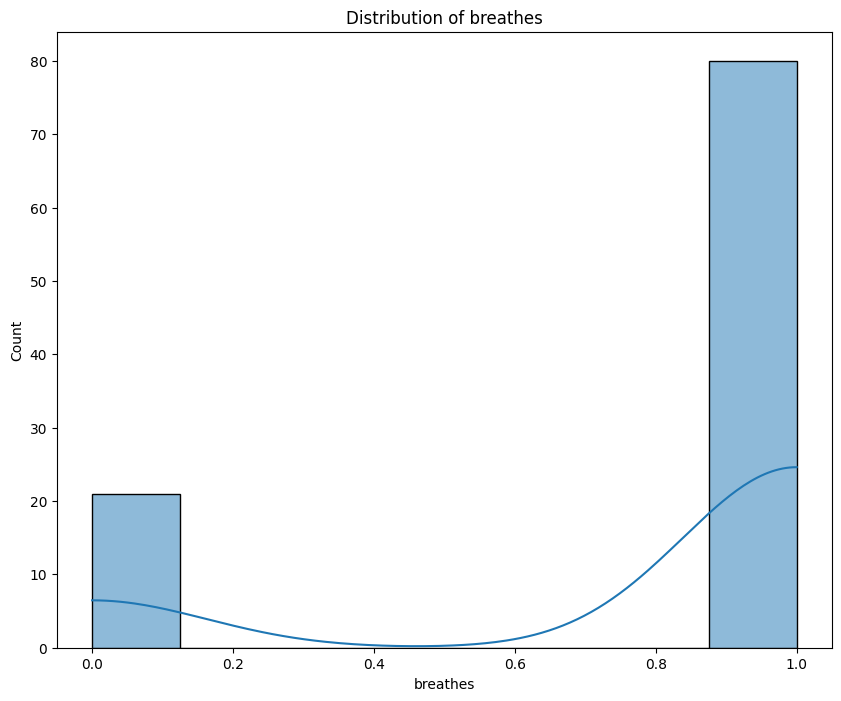

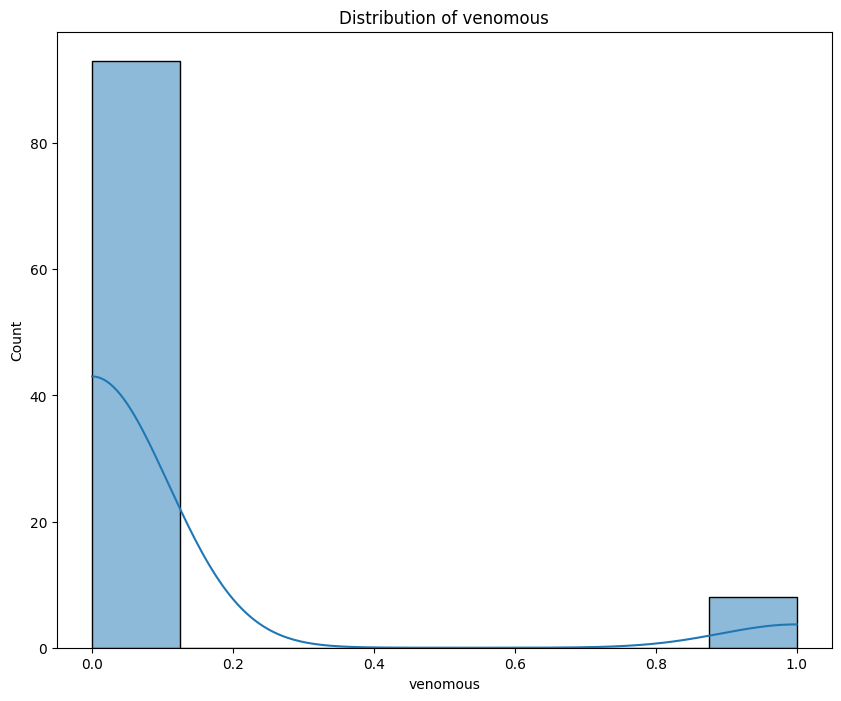

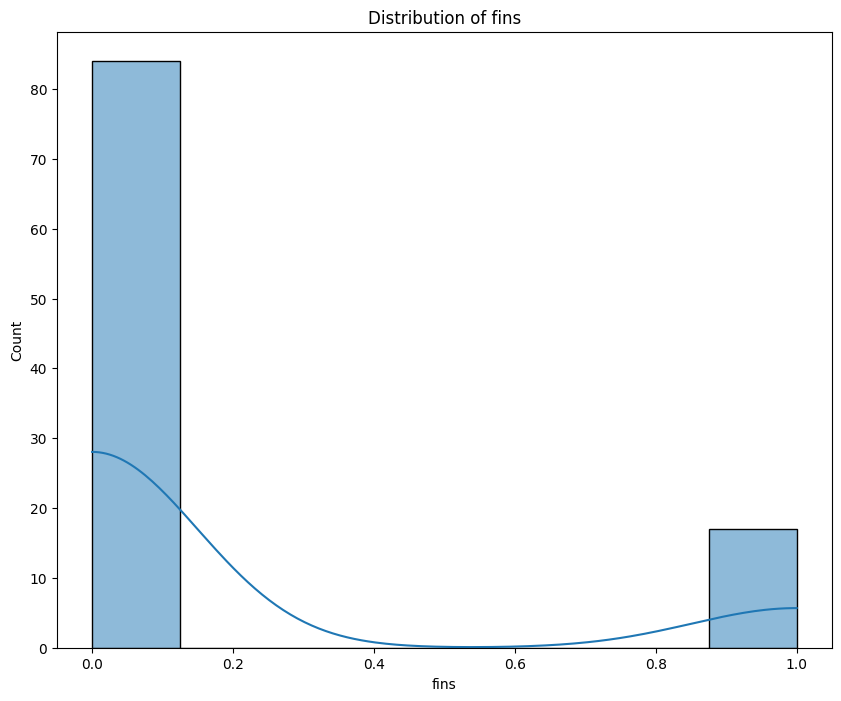

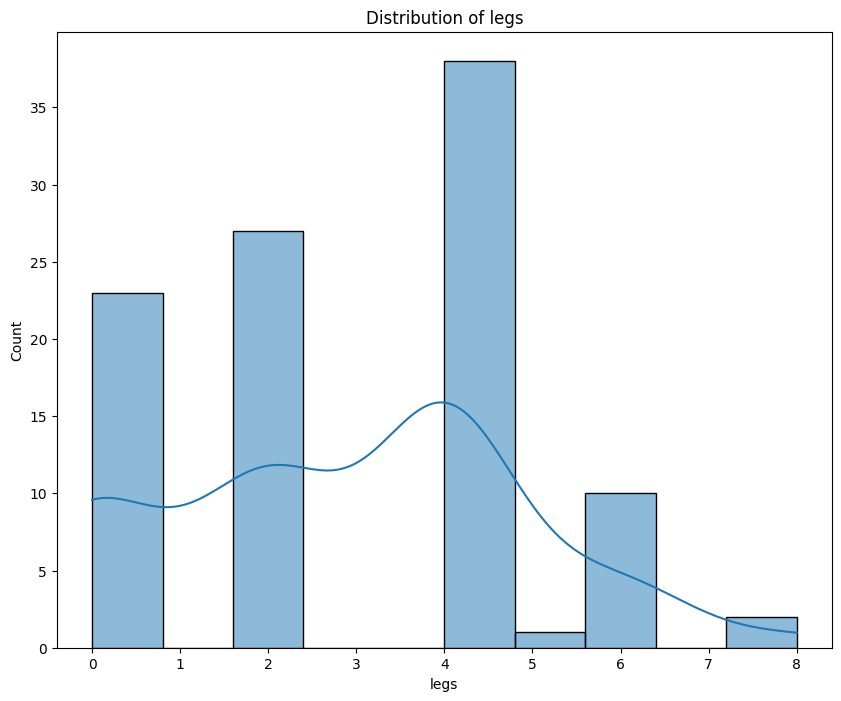

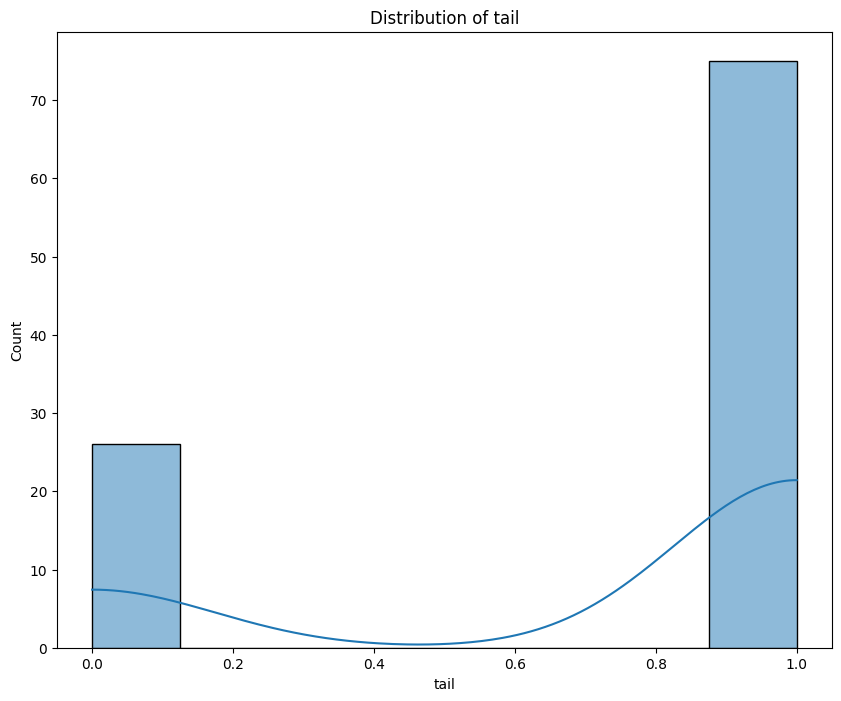

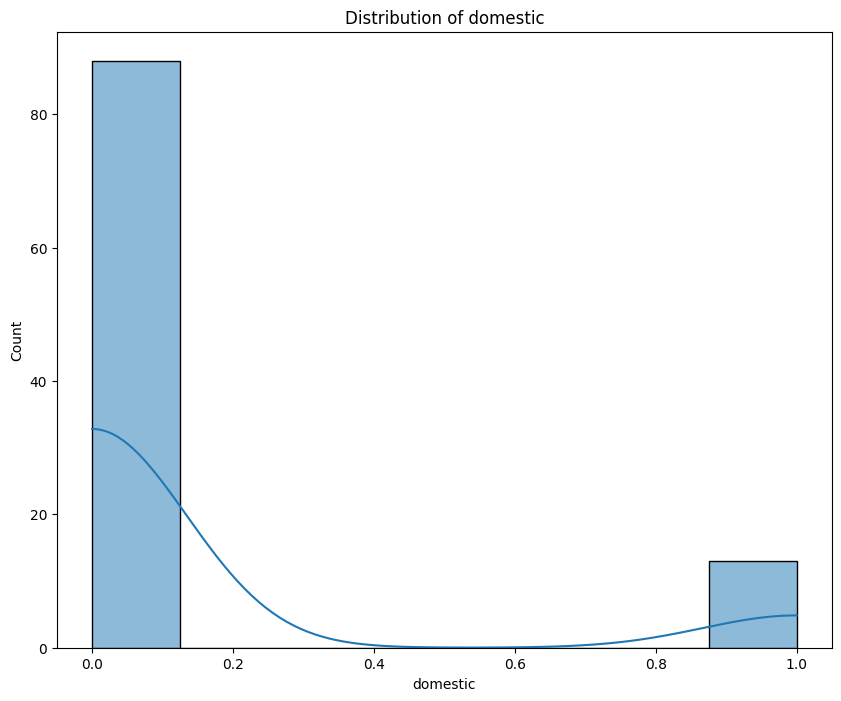

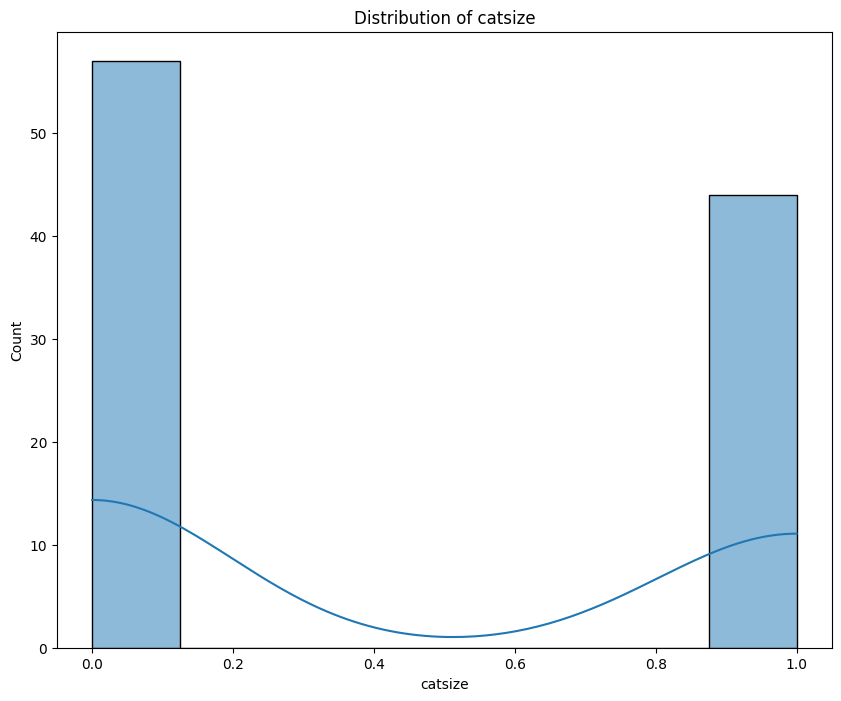

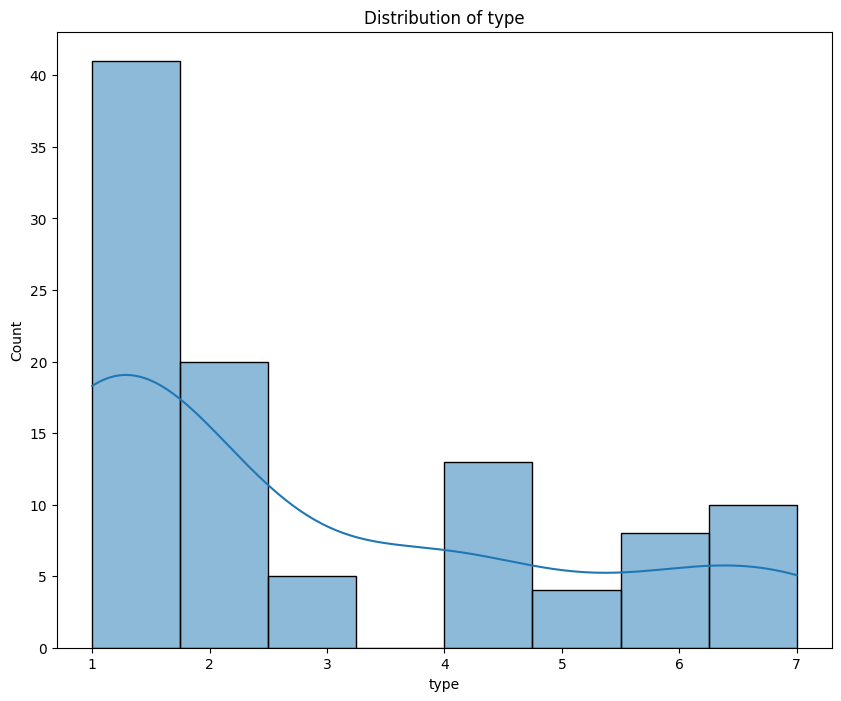

In [14]:
for i in df.select_dtypes(include='number').columns:
  plt.figure(figsize=(10,8))
  sns.histplot(df[i], kde=True)
  plt.title(f"Distribution of {i}")
  plt.show()

In [15]:
for i in df.select_dtypes(include='number').columns:
  print(i)
  print(f"Skewness of {i}: {df[i].skew()}")
  print(f"Kurtosis of {i}: {df[i].kurtosis()}\n")

hair
Skewness of hair: 0.304907794639528
Kurtosis of hair: -1.9459690269634131

feathers
Skewness of feathers: 1.5385011316598183
Kurtosis of feathers: 0.37399696129854654

eggs
Skewness of eggs: -0.34667598857428106
Kurtosis of eggs: -1.9182036304139383

milk
Skewness of milk: 0.38887635707798823
Kurtosis of milk: -1.8865358412396735

airborne
Skewness of airborne: 1.2515562647521226
Kurtosis of airborne: -0.44277254388571485

aquatic
Skewness of aquatic: 0.608577037109231
Kurtosis of aquatic: -1.6629666629666617

predator
Skewness of predator: -0.22244257152992522
Kurtosis of predator: -1.9903358168664296

toothed
Skewness of toothed: -0.43156863480743013
Kurtosis of toothed: -1.8508014234009555

backbone
Skewness of backbone: -1.707118033771231
Kurtosis of backbone: 0.9323213281905187

breathes
Skewness of breathes: -1.4612444109968643
Kurtosis of breathes: 0.13756368348204795

venomous
Skewness of venomous: 3.1634279702946655
Kurtosis of venomous: 8.168668249313406

fins
Skewness o

### **Analysis of Skewness and Kurtosis for Each Feature**  

#### **1. Understanding Skewness and Kurtosis**
- **Skewness** measures **asymmetry** of data distribution:
  - **Positive (> 0)**: Right-skewed (tail on the right).
  - **Negative (< 0)**: Left-skewed (tail on the left).
  - **Close to 0**: Symmetric distribution.
  
- **Kurtosis** measures the **"tailedness"** of the distribution:
  - **Positive (> 0)**: Heavy tails (outliers).
  - **Negative (< 0)**: Light tails (less extreme values).
  - **Close to 0**: Normal distribution.

---

### **2. Skewness and Kurtosis Insights by Feature**
| **Feature**   | **Skewness** | **Interpretation** | **Kurtosis** | **Interpretation** |
|--------------|-------------|--------------------|-------------|--------------------|
| **hair** | 0.30 | Slightly right-skewed | -1.95 | Light tails (few outliers) |
| **feathers** | 1.54 | Highly right-skewed | 0.37 | Close to normal |
| **eggs** | -0.35 | Slightly left-skewed | -1.92 | Light tails |
| **milk** | 0.39 | Slightly right-skewed | -1.89 | Light tails |
| **airborne** | 1.25 | Strong right skew | -0.44 | Near normal |
| **aquatic** | 0.61 | Moderate right skew | -1.66 | Light tails |
| **predator** | -0.22 | Slight left skew | -1.99 | Light tails |
| **toothed** | -0.43 | Moderate left skew | -1.85 | Light tails |
| **backbone** | -1.71 | Strong left skew | 0.93 | Heavy tails |
| **breathes** | -1.46 | Strong left skew | 0.14 | Close to normal |
| **venomous** | 3.16 | **Highly right-skewed** | **8.17** | **Extremely heavy tails (outliers present)** |
| **fins** | 1.80 | Highly right-skewed | 1.26 | Somewhat heavy tails |
| **legs** | 0.14 | Nearly symmetric | -0.60 | Light tails |
| **tail** | -1.13 | Left skewed | -0.75 | Light tails |
| **domestic** | 2.25 | **Highly right-skewed** | **3.13** | **Heavy tails (outliers present)** |
| **catsize** | 0.26 | Nearly symmetric | -1.97 | Light tails |
| **type** | 0.85 | Right-skewed | -0.69 | Light tails |

---

### **3. Key Observations**
1. **Highly Skewed Features (Need Transformation):**
   - **Right-skewed:** `venomous (3.16)`, `domestic (2.25)`, `feathers (1.54)`, `fins (1.80)`, `airborne (1.25)`.
   - **Left-skewed:** `backbone (-1.71)`, `breathes (-1.46)`, `tail (-1.12)`.
   - **Solution:** Apply **log transformation** or **Box-Cox transformation** to normalize these.

2. **Heavy-tailed Features (Outliers Present):**
   - **Very High Kurtosis:** `venomous (8.17)`, `domestic (3.13)`.
   - **Indicates extreme values or outliers.**
   - **Solution:** Apply **Winsorization (removing extreme values)** or **robust scaling**.

3. **Nearly Normal Distributions:**
   - `legs (0.14)`, `catsize (0.26)`, `hair (0.30)`, `eggs (-0.35)`, `milk (0.39)`.
   - No transformation needed.

---


In [16]:
z=df.corr(numeric_only=True)
z

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
hair,1.000000,-0.427851,-0.817382,0.878503,-0.198431,-0.473554,-0.154769,0.492531,0.191681,0.441149,-0.104245,-0.280313,0.394009,0.048973,0.207208,0.455020,-0.562384
feathers,-0.427851,1.000000,0.419248,-0.410761,0.656553,-0.058552,-0.104430,-0.613631,0.231403,0.254588,-0.145739,-0.223541,-0.206686,0.292569,0.031586,-0.135934,-0.197520
eggs,-0.817382,0.419248,1.000000,-0.938848,0.376646,0.376244,0.011605,-0.642150,-0.340420,-0.382777,0.098689,0.164796,-0.224918,-0.221090,-0.155610,-0.514650,0.661825
milk,0.878503,-0.410761,-0.938848,1.000000,-0.366765,-0.362613,-0.029721,0.628168,0.384958,0.423527,-0.242449,-0.156328,0.214196,0.210026,0.163928,0.574906,-0.723683
airborne,-0.198431,0.656553,0.376646,-0.366765,1.000000,-0.172638,-0.295181,-0.594311,-0.104718,0.286039,0.008528,-0.251157,0.043712,0.009482,0.063274,-0.349768,0.022677
aquatic,-0.473554,-0.058552,0.376244,-0.362613,-0.172638,1.000000,0.375978,0.053150,0.022463,-0.637506,0.087915,0.604492,-0.360638,-0.034642,-0.224308,-0.111866,0.326639
predator,-0.154769,-0.104430,0.011605,-0.029721,-0.295181,0.375978,1.000000,0.129452,0.051022,-0.262931,0.115391,0.190302,-0.099723,0.018947,-0.309794,0.144790,0.061179
toothed,0.492531,-0.613631,-0.642150,0.628168,-0.594311,0.053150,0.129452,1.000000,0.575085,-0.065690,-0.062344,0.364292,-0.193476,0.310368,0.069430,0.344010,-0.471527
backbone,0.191681,0.231403,-0.340420,0.384958,-0.104718,0.022463,0.051022,0.575085,1.000000,0.207666,-0.246611,0.209499,-0.432856,0.731762,0.101733,0.356976,-0.828845
breathes,0.441149,0.254588,-0.382777,0.423527,0.286039,-0.637506,-0.262931,-0.065690,0.207666,1.000000,-0.120752,-0.617219,0.369868,0.088952,0.124068,0.204125,-0.519308


### **Correlation Analysis of Zoo Dataset Features**

#### **1. Understanding Correlation Values**
- **Positive correlation (near +1):** When one feature increases, the other also increases.
- **Negative correlation (near -1):** When one feature increases, the other decreases.
- **Near 0:** No strong relationship between the features.

---

### **2. Key Observations from Correlation Matrix**

#### **Strong Positive Correlations (Highly Related Features)**
- `hair` and `milk` (**0.878**) → Mammals generally have hair and produce milk.
- `backbone` and `tail` (**0.732**) → Many animals with backbones have tails.
- `toothed` and `milk` (**0.628**) → Mammals (which produce milk) usually have teeth.
- `fins` and `aquatic` (**0.604**) → Most aquatic animals have fins.

#### **Strong Negative Correlations (Inverse Relationships)**
- `milk` and `eggs` (**-0.939**) → Mammals (which produce milk) do not lay eggs.
- `backbone` and `type` (**-0.829**) → The presence of a backbone has a strong negative relationship with the type classification.
- `milk` and `type` (**-0.724**) → Suggests that milk-producing animals belong to specific types.
- `hair` and `type` (**-0.562**) → Hair presence influences classification type.

---

### **3. Feature Insights for Model Improvement**
- **Highly correlated features (`hair` and `milk`, `milk` and `toothed`) could be redundant.**  
  - Consider **dimensionality reduction (PCA)** or **removing redundant features** to improve model efficiency.
  
- **Strongly correlated features (`backbone` and `tail`) may bias classification.**  
  - Feature scaling might help balance feature influence in models like **KNN** or **SVM**.

- **Negative correlation between `eggs` and `milk` suggests clear separation of mammals vs. non-mammals.**  
  - Could be a strong decision boundary in classification models.

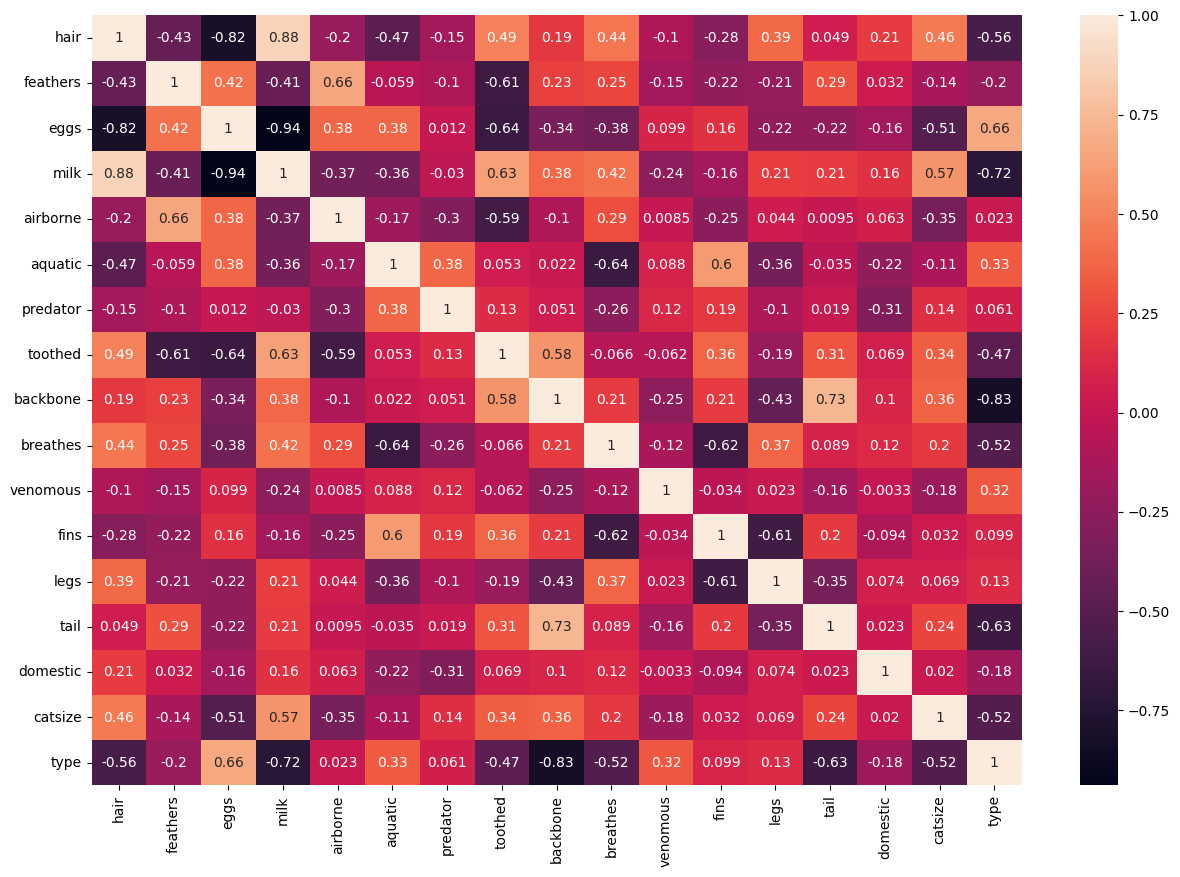

In [17]:
plt.figure(figsize=(15,10))
sns.heatmap(z, annot=True)
plt.show()

In [18]:
num_col =df.select_dtypes(include='number').columns
num_col

Index(['hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator',
       'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail',
       'domestic', 'catsize', 'type'],
      dtype='object')

In [19]:
for i in num_col:
  for j in num_col:
    if i!=j:
      plt.figure(figsize=(10,8))
      sns.scatterplot(x=i, y=j, data=df)
      plt.title(f"Scatter plot of {i} vs {j}")
      plt.xlabel(i)
      plt.ylabel(j)
      plt.show()

Output hidden; open in https://colab.research.google.com to view.

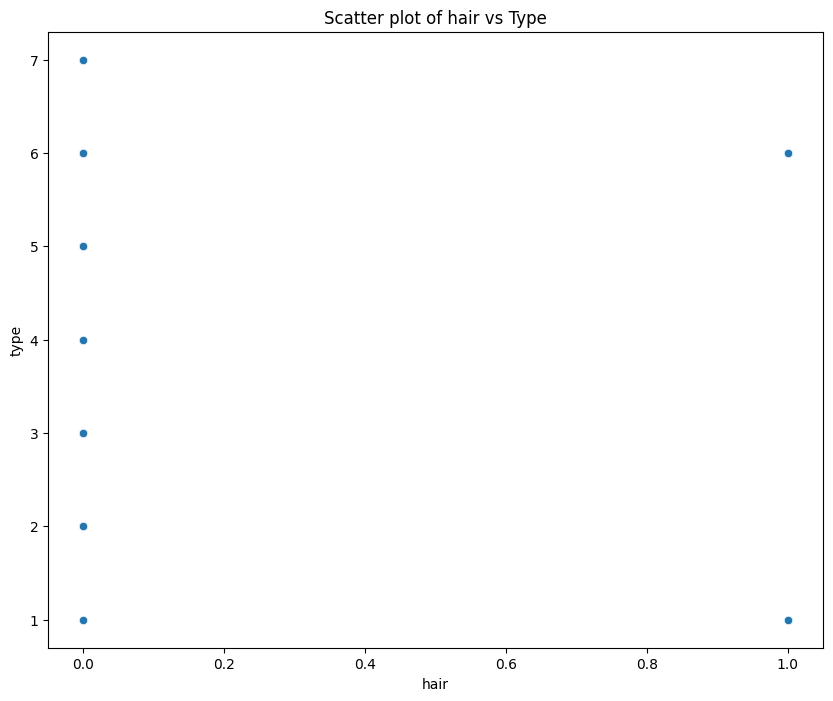

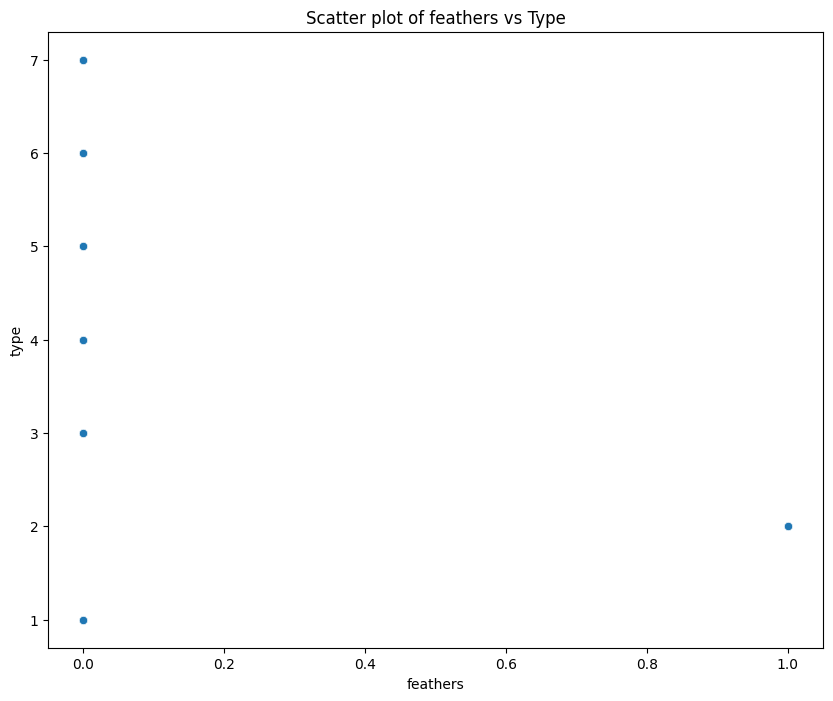

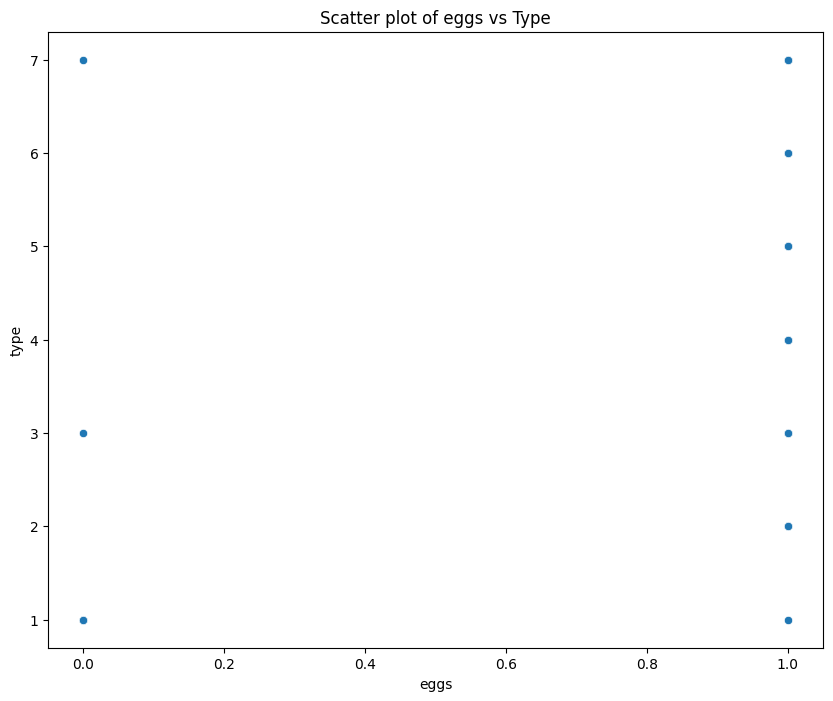

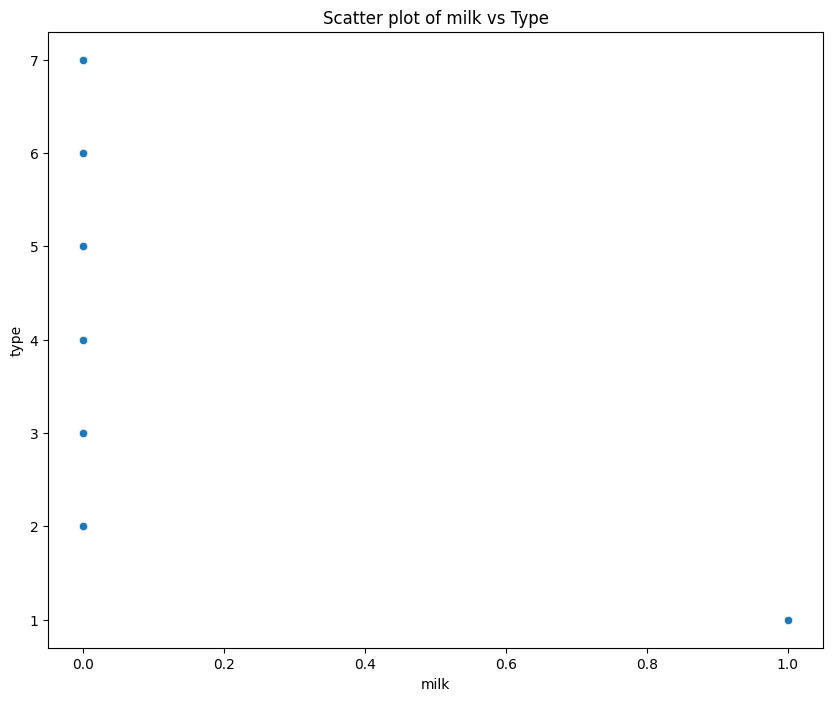

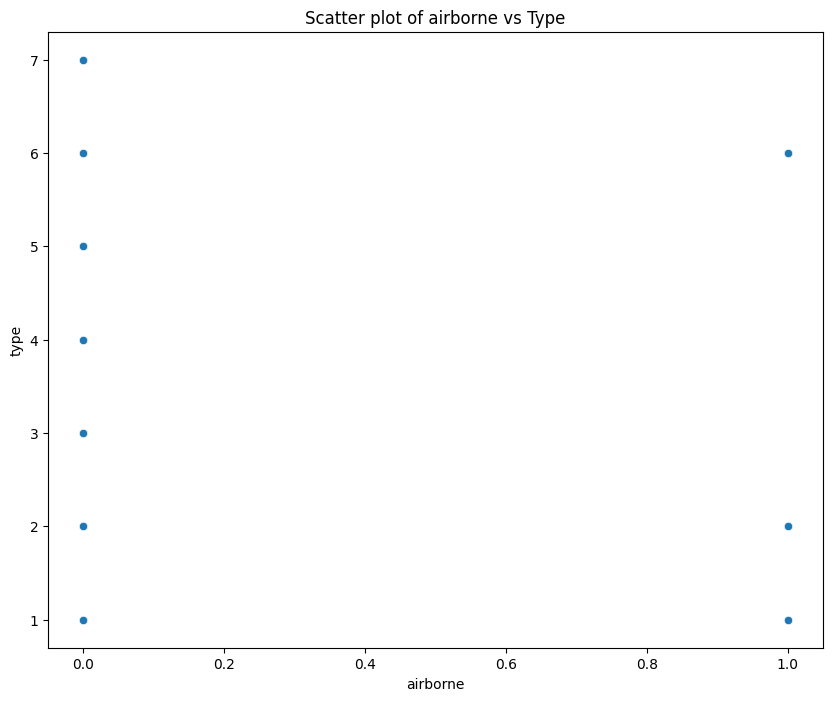

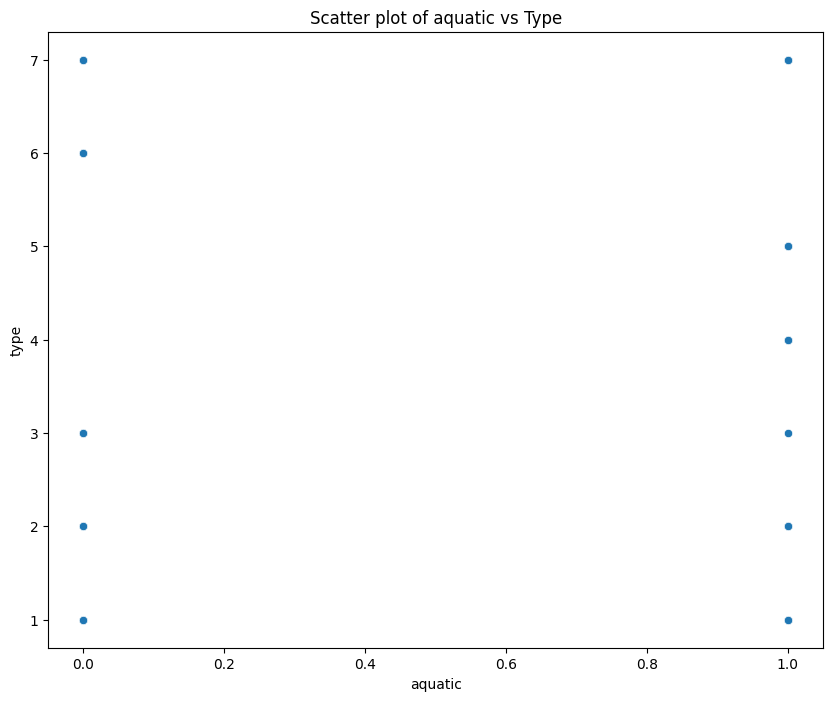

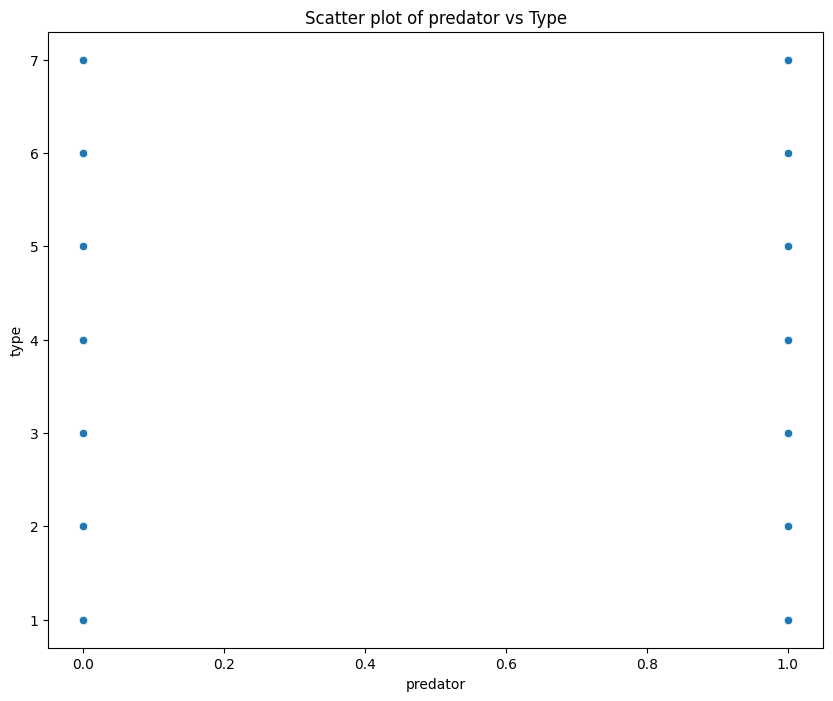

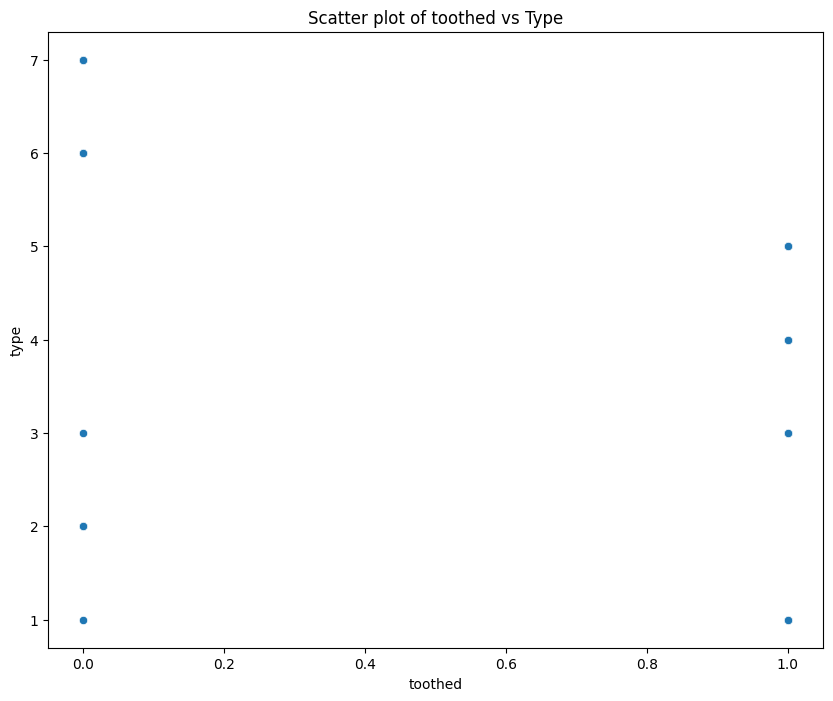

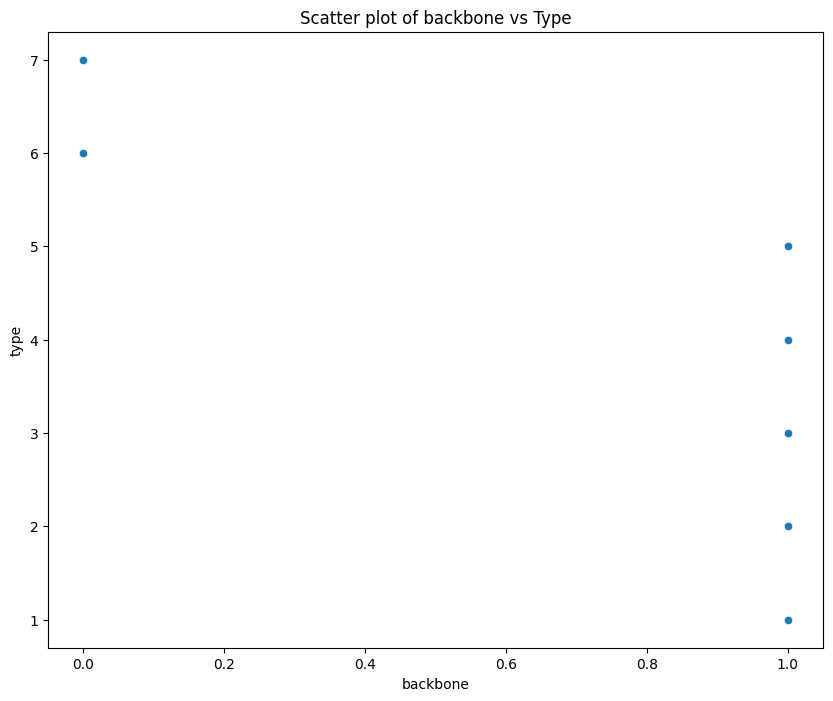

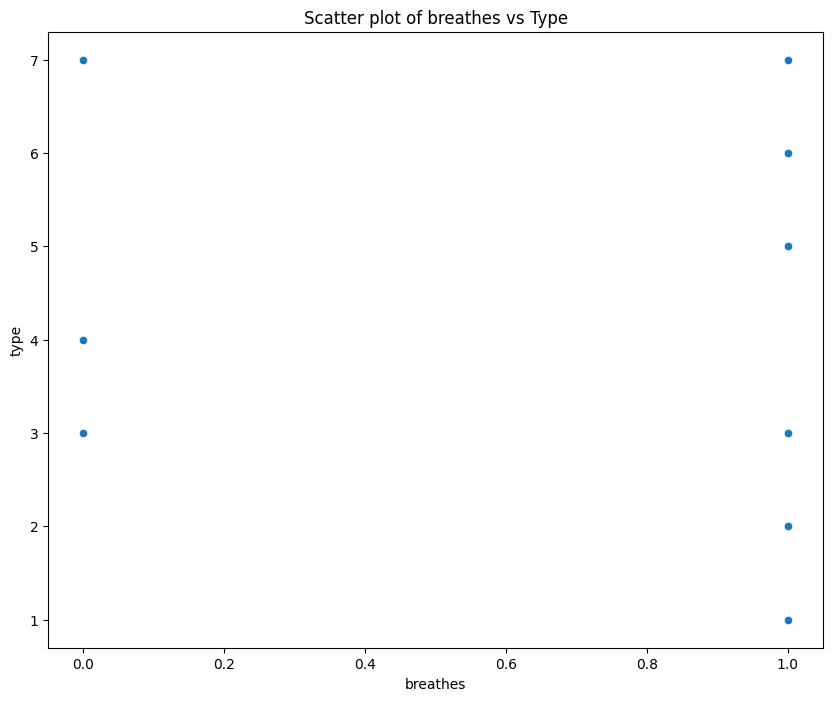

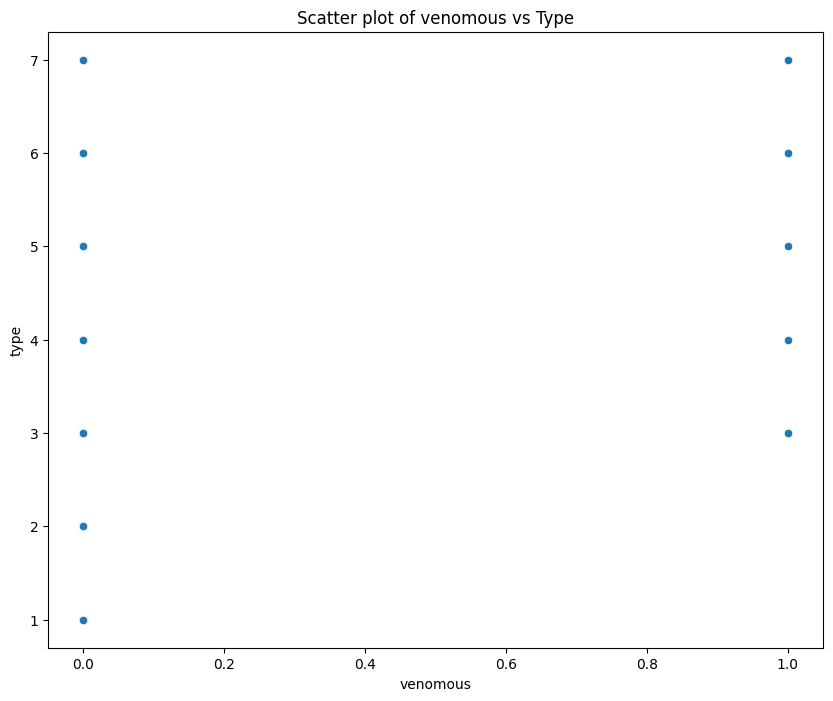

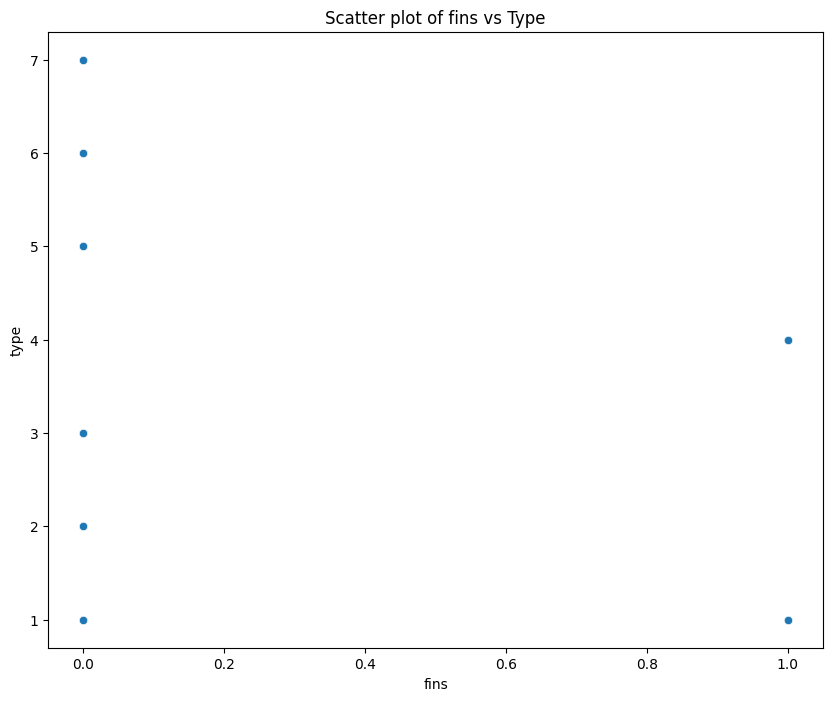

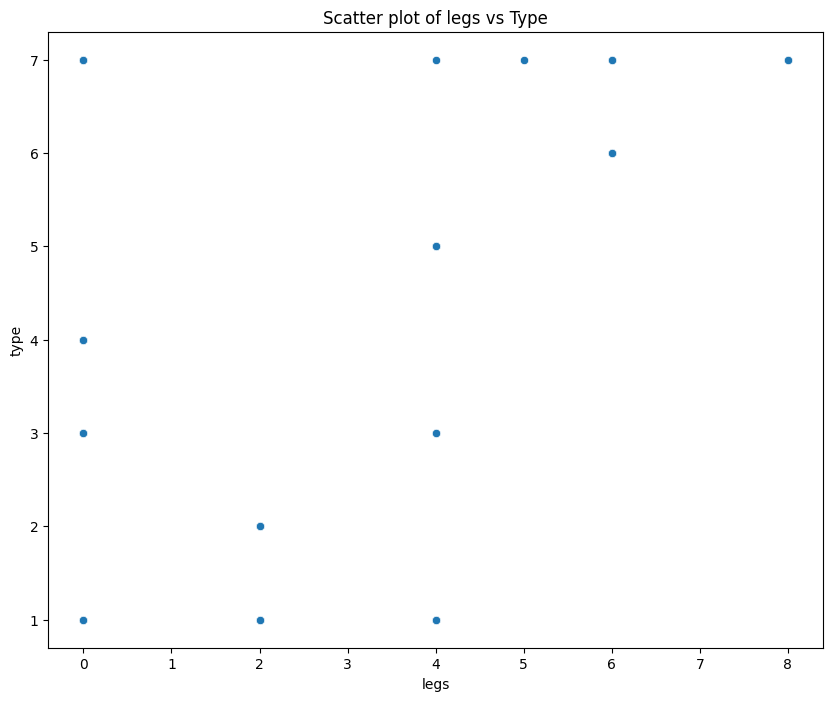

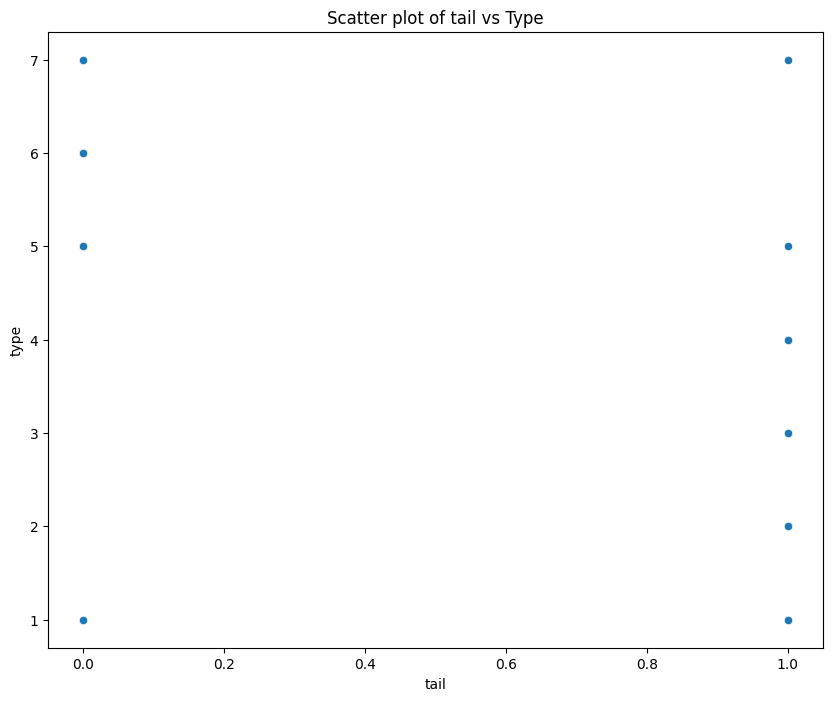

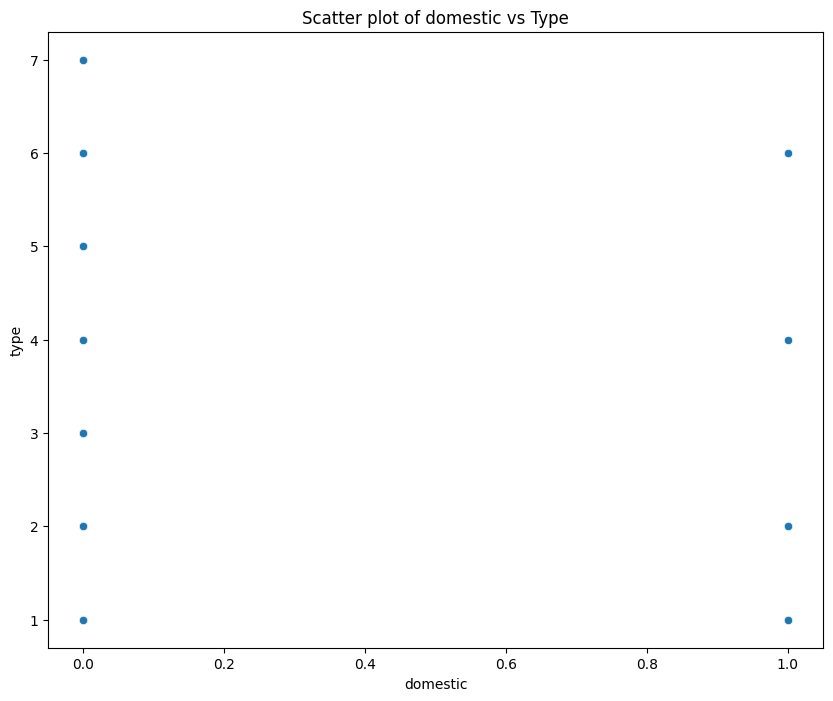

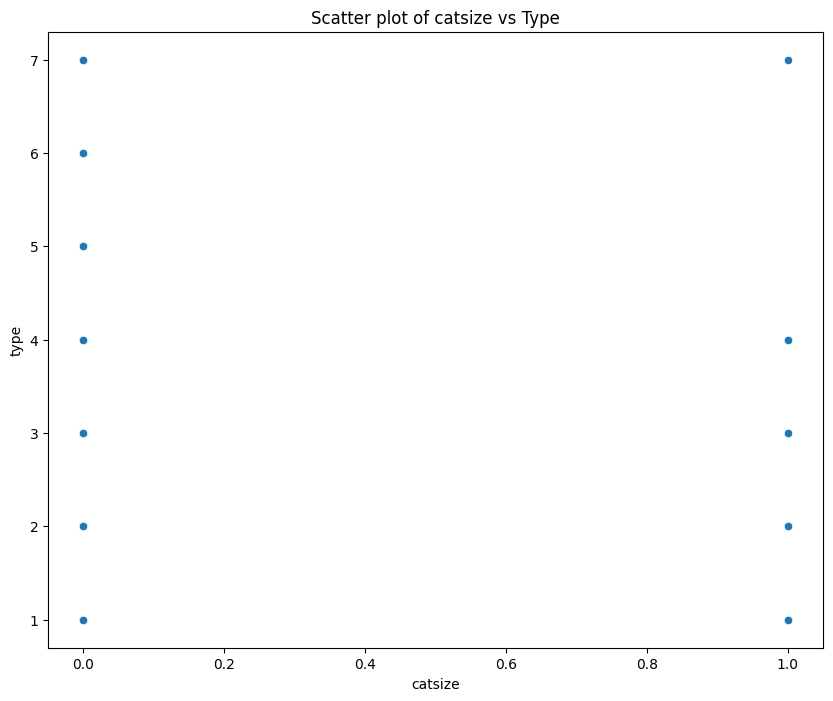

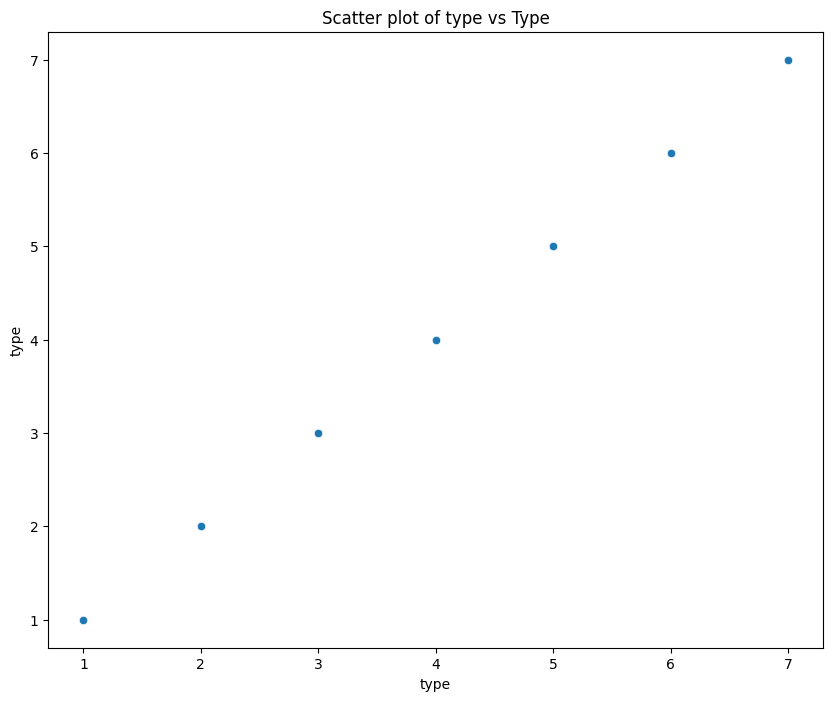

In [20]:
for i in num_col:
  if i != 'Type':
    plt.figure(figsize=(10,8))
    sns.scatterplot(x=df[i], y='type', data=df)
    plt.title(f"Scatter plot of {i} vs Type")
    plt.xlabel(i)

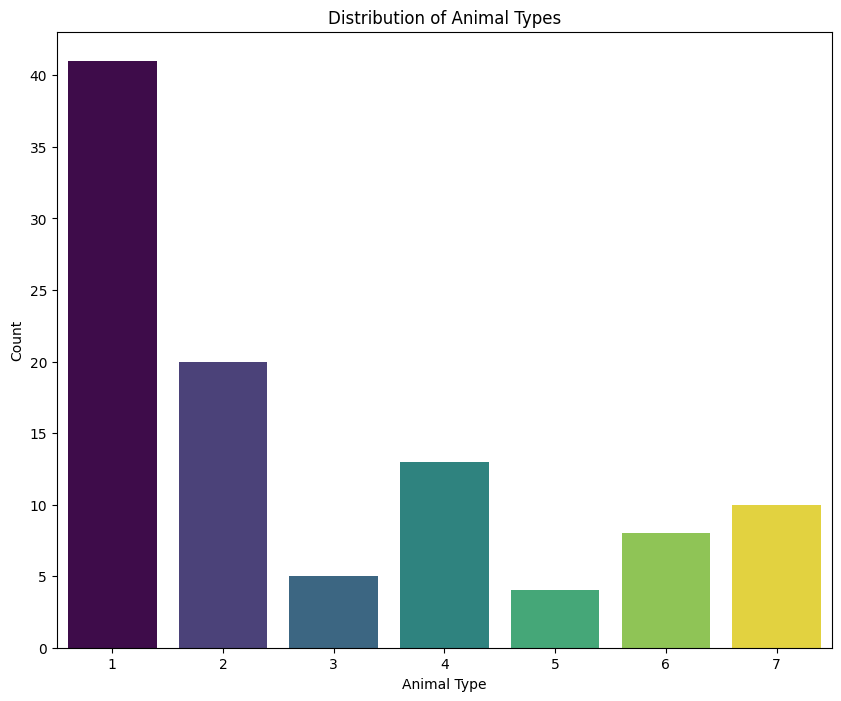

In [21]:
plt.figure(figsize=(10,8))
sns.countplot(x=df['type'],hue=df['type'], palette='viridis', dodge=False, legend=False)
plt.title('Distribution of Animal Types')
plt.xlabel("Animal Type")
plt.ylabel("Count")
plt.show()

<Figure size 1000x800 with 0 Axes>

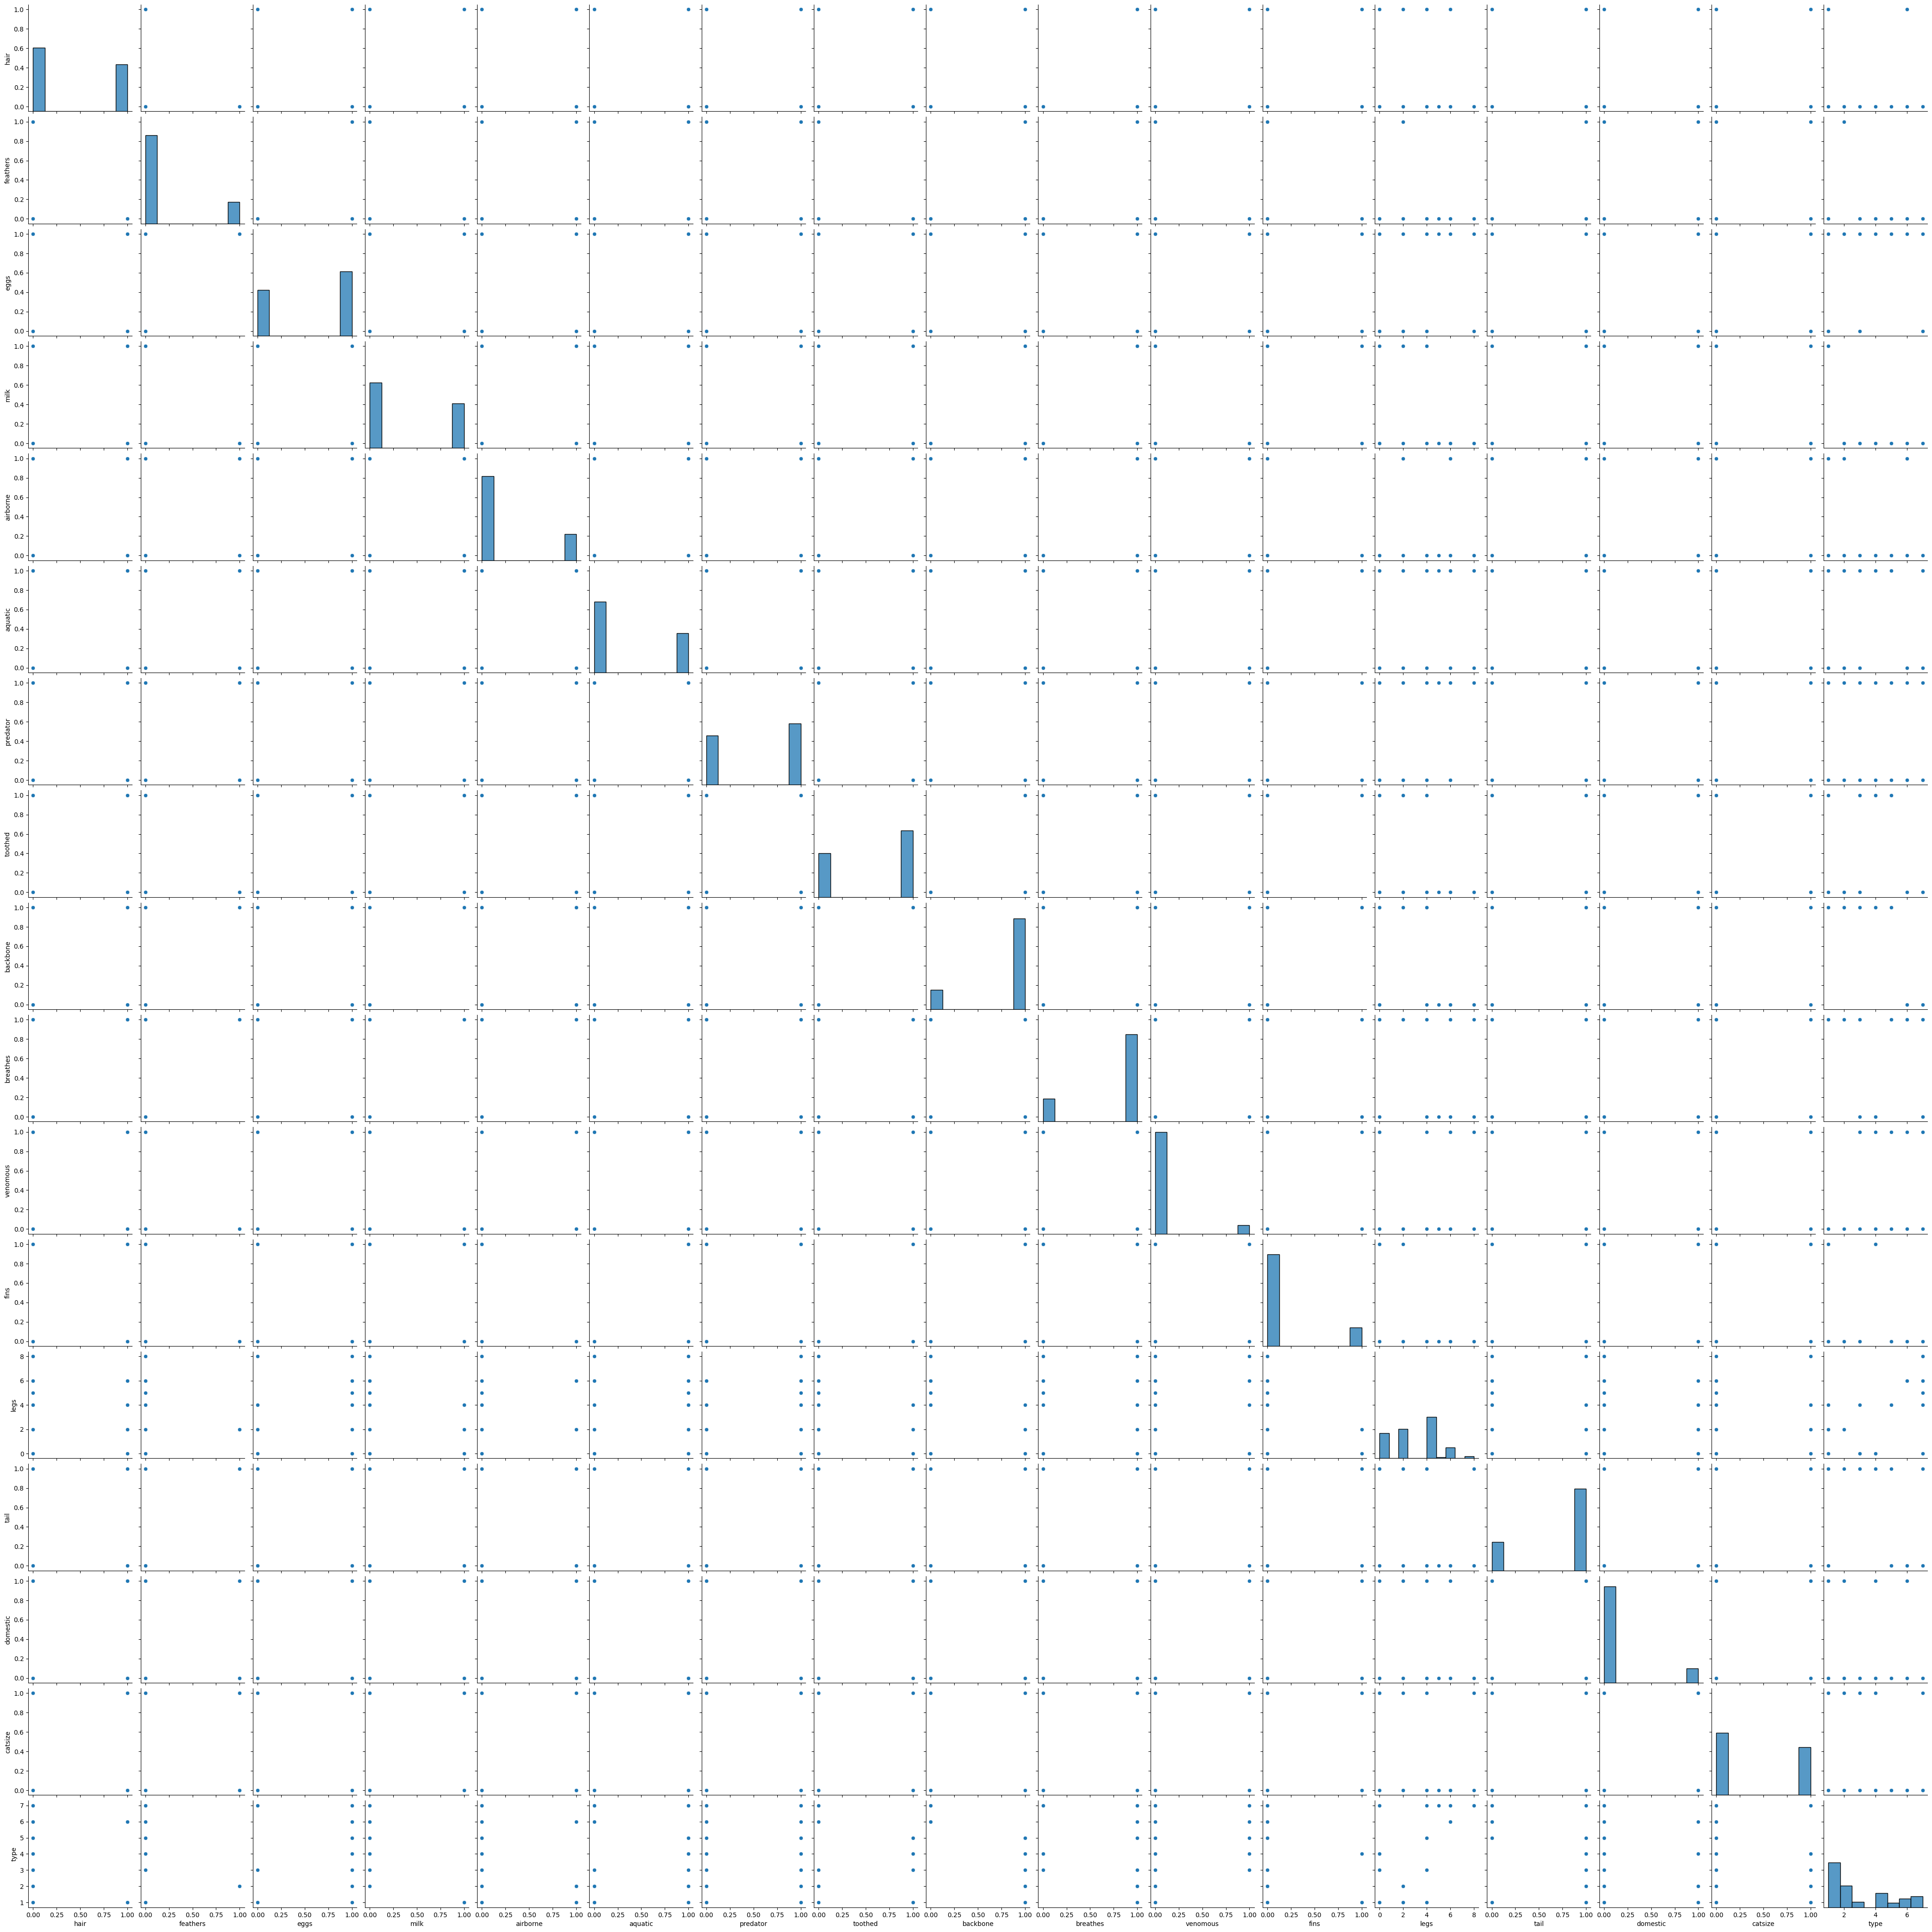

In [22]:
plt.figure(figsize=(10,8))
sns.pairplot(df.iloc[:, 1:])
plt.show()

In [23]:
df[df.duplicated]

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type


In [24]:
df.drop_duplicates(inplace=True)

In [25]:
df.isnull().sum()

,0
animal name,0
hair,0
feathers,0
eggs,0
milk,0
airborne,0
aquatic,0
predator,0
toothed,0
backbone,0


In [26]:
for i in df.select_dtypes(include='number').columns:
  print(df[i].value_counts())
  print("\n")

hair
0    58
1    43
Name: count, dtype: int64


feathers
0    81
1    20
Name: count, dtype: int64


eggs
1    59
0    42
Name: count, dtype: int64


milk
0    60
1    41
Name: count, dtype: int64


airborne
0    77
1    24
Name: count, dtype: int64


aquatic
0    65
1    36
Name: count, dtype: int64


predator
1    56
0    45
Name: count, dtype: int64


toothed
1    61
0    40
Name: count, dtype: int64


backbone
1    83
0    18
Name: count, dtype: int64


breathes
1    80
0    21
Name: count, dtype: int64


venomous
0    93
1     8
Name: count, dtype: int64


fins
0    84
1    17
Name: count, dtype: int64


legs
4    38
2    27
0    23
6    10
8     2
5     1
Name: count, dtype: int64


tail
1    75
0    26
Name: count, dtype: int64


domestic
0    88
1    13
Name: count, dtype: int64


catsize
0    57
1    44
Name: count, dtype: int64


type
1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: count, dtype: int64




In [27]:
df.shape

(101, 18)

In [28]:
# threshold = 3
# ncol = df.select_dtypes(include='number').columns
# ncol = ncol[ncol != 'venemous']  # Exclude 'venemous'
# z_score = np.abs(stats.zscore(df[ncol]))

# # Filter only the selected columns
# filtered_data = df[ncol][(z_score < threshold).all(axis=1)]

# # Update the original DataFrame with the filtered data
# df.update(filtered_data)

**Feature Importance from Tree-based Models**

* This method utilizes the feature importance scores provided by tree-based models like Random Forest or XGBoost.

I got output as:

| Feature        | Importance |
|----------------|------------|
| feathers       | 0.144393   |
| milk           | 0.126156   |
| hair           | 0.099367   |
| toothed        | 0.084526   |
| eggs           | 0.080712   |
| legs           | 0.077338   |
| breathes       | 0.074630   |
| backbone       | 0.067668   |
| fins           | 0.063209   |
| tail           | 0.042197   |
| animal name    | 0.034496   |
| airborne       | 0.034399   |
| aquatic        | 0.032794   |
| catsize        | 0.015569   |
| predator       | 0.015033   |
| venomous       | 0.007189   |
| domestic       | 0.000327   |


**Interpretation:**

* Top Important Features: The features with the highest importance scores are considered the most influential in predicting the target variable ('type' in your case). In your results, 'feathers', 'milk', 'hair', 'toothed', and 'eggs' have the highest importance scores, suggesting they are the most relevant for classifying animal types.
* Least Important Features: Features with very low importance scores might have little or no impact on the model's predictions. In your results, 'venomous' and 'domestic' have the lowest importance scores, indicating they might not be as crucial for classification.
* Relative Importance: The importance scores are relative, meaning they represent the contribution of each feature compared to others. For example, 'feathers' has the highest importance score (0.144393), implying it's the most influential feature among all.

**Regarding 'venomous':**

As you can see, 'venomous' has a very low importance score (0.007189), suggesting it might not be a strong predictor for animal type in your dataset. This aligns with your previous observations about its low variance after outlier removal.  


**IN MY CASE I WILL EVALUATE KNN USING VENEMOUS FEATURE AND BY NOT USING VENEMOUS FEATURE THE RESULT OF ACCURACY WILL DETERMIN WEATHER TO KEEP IT OR NOT**

By using all I got Maximum Accuracy: 0.5714285714285714 at k = 1

By removing LabelEncoder, MinMaxScaling and droping 'animal name' I got Accuracy as:Accuracy Score: 0.8571428571428571

By removing only 'animal name' column I got Accuracy as: Accuracy Score: 0.9523809523809523

**THUS WE CAN CONCLUDE THAT FEW OF THE DATA POINT CARRY IMPORTANT PATTERNS THUS WE CAN IGNORE REMOVING THE OUTLIER**

In [29]:
df.shape

(101, 18)

In [30]:
df

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [31]:
df.nunique()

,0
animal name,100
hair,2
feathers,2
eggs,2
milk,2
airborne,2
aquatic,2
predator,2
toothed,2
backbone,2


**Before Outlier Removal and Label Encoding:**

* Shape: (101, 18) - This means we had 101 rows (animals) and 18 columns (features).
* Unique Values: The animal name column had 100 unique values, indicating almost all animals had distinct names. Other features were mostly binary (2 unique values) representing characteristics like hair, feathers, eggs, etc. 'legs' had 6 unique values and 'type' had 7.

**After Outlier Removal and Label Encoding:**

* Shape: (93, 18) - The number of rows decreased to 93, meaning 8 rows (outliers) were removed during the outlier removal process using the z-score method.
* Unique Values:
  * **animal name** now has 93 unique values, mirroring the reduced number of rows. This is expected as label encoding assigns a unique numerical label to each distinct category.
  * **venomous** now has only 1 unique value. This might indicate that after outlier removal, all remaining animals either have the same value for venomous (e.g., all are non-venomous). This feature may not be very useful for model building if it has low variance after the outlier removal.

**Summary of Changes:**

1. Outlier Removal: 8 outlier rows were removed using the z-score method, reducing the dataset size.
2. Label Encoding: The 'animal name' column was transformed from categorical strings to numerical labels using Label Encoding.
3. Loss of Variance: The 'venomous' feature might have lost its variance (now only has 1 unique value) which could impact its usefulness in analysis.

**Considering the Imbalance and Low Variance:**

* Imbalance: The 'venomous' feature has a significant class imbalance (93 non-venomous vs. 8 venomous).
* Low Variance After Outlier Removal: As mentioned that 'venomous' might have low variance after your initial outlier removal.

**Recommendation:**

Given this information, I recommend the following:

1. **Remove outliers for all numerical features EXCEPT 'venomous'.** This addresses potential issues with outliers in other features while preserving the original distribution of the 'venomous' feature.  

By Removing **'venomous'** feature I got Accuracy as: **Accuracy Score: 0.9523809523809523**

Thus , we can consider to keep he **'venomous'** feature
______

* By using all I got **Maximum Accuracy: 0.5714285714285714 at k = 1**

* By removing LabelEncoder, MinMaxScaling and droping 'animal name' I got Accuracy as:**Accuracy Score: 0.8571428571428571**

* By removing only 'animal name' column I got Accuracy as: **Accuracy Score: 0.9523809523809523**

In [32]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df.loc[:, 'animal name']=le.fit_transform(df['animal name'])

In [33]:
df.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [34]:
df.isnull().sum()

,0
animal name,0
hair,0
feathers,0
eggs,0
milk,0
airborne,0
aquatic,0
predator,0
toothed,0
backbone,0


In [35]:
df.nunique()

,0
animal name,100
hair,2
feathers,2
eggs,2
milk,2
airborne,2
aquatic,2
predator,2
toothed,2
backbone,2


### **Standardization Theory**

### 1. **Binary Features** (0 and 1):
- Since the features like `hair`, `feathers`, `milk`, `airborne`, `aquatic`, etc., are already in the range [0, 1], **Min-Max Scaling** is a perfect fit.
- **Min-Max Scaling** will keep these values unchanged (because they are already between 0 and 1), while **StandardScaler** would still scale them, but it would result in values that are centered around 0 with a standard deviation of 1. This could make no practical difference in your case, since they are already binary.

### 2. **Effect of Min-Max Scaling**:
Min-Max scaling transforms the data into a specified range, usually [0, 1], and it is particularly useful when the features are already between 0 and 1, as it doesn’t alter the values.

### 3. **StandardScaler vs MinMaxScaler**:
- **Min-Max Scaling** preserves the original structure of the data (values remain between 0 and 1).
- **StandardScaler** would convert all the features to a distribution with a mean of 0 and a standard deviation of 1, but this doesn't add any value for binary variables.
- **Min-Max Scaling** is generally more appropriate when the features are already in the range [0, 1].

### When to Use:
- **For binary features**: Min-Max Scaling is more suitable because it preserves the 0 and 1 values without making them skewed or distorted.
- **For continuous variables** (like `legs`), you could apply **StandardScaler** or **Min-Max Scaling**, depending on the model you're using.


### Summary:
- **For binary features** (like `hair`, `feathers`, etc.), **Min-Max Scaling** is ideal because it keeps the values between 0 and 1.
- **For continuous features** (like `legs`), we can use either **Min-Max Scaling** or **StandardScaler**, depending on your model choice.
- **Min-Max Scaling** is a great choice in my case since it keeps the original 0 and 1 values intact for binary features.


**Maximum Accuracy: 0.5714285714285714 at k = 1**

In [36]:
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler()
df['legs']=mm.fit_transform(df[['legs']])

In [37]:
df.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,0,1,0,0,1,0,0,1,1,1,1,0,0,0.5,0,0,1,1
1,1,1,0,0,1,0,0,0,1,1,1,0,0,0.5,1,0,1,1
2,2,0,0,1,0,0,1,1,1,1,0,0,1,0.0,1,0,0,4
3,3,1,0,0,1,0,0,1,1,1,1,0,0,0.5,0,0,1,1
4,4,1,0,0,1,0,0,1,1,1,1,0,0,0.5,1,0,1,1


In [38]:
df.isnull().sum()

,0
animal name,0
hair,0
feathers,0
eggs,0
milk,0
airborne,0
aquatic,0
predator,0
toothed,0
backbone,0


In [39]:
#x=df.drop('type', axis=1)
x = df.drop(['type', 'animal name'], axis=1)
x

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1,0,0,1,0,0,1,1,1,1,0,0,0.50,0,0,1
1,1,0,0,1,0,0,0,1,1,1,0,0,0.50,1,0,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0.00,1,0,0
3,1,0,0,1,0,0,1,1,1,1,0,0,0.50,0,0,1
4,1,0,0,1,0,0,1,1,1,1,0,0,0.50,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,0.25,1,0,1
97,1,0,1,0,1,0,0,0,0,1,1,0,0.75,0,0,0
98,1,0,0,1,0,0,1,1,1,1,0,0,0.50,1,0,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0.00,0,0,0


In [40]:
y=df['type']
y

,type
0,1
1,1
2,4
3,1
4,1
...,...
96,1
97,6
98,1
99,7


In [41]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=42)

In [42]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((80, 16), (21, 16), (80,), (21,))

In [43]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [44]:
best=[]
for k in range(1, 11):
  knn=KNeighborsClassifier(n_neighbors=k)
  knn.fit(x_train , y_train)
  accuracy = knn.score(x_test, y_test)
  print(f"Accuracy for k={k}: {accuracy}")
  best.append(accuracy)

max_accuracy=max(best)
max_index = best.index(max_accuracy)  # Get the index of the maximum accuracy

print(f"\nMaximum Accuracy: {max_accuracy} at k = {max_index + 1}")

Accuracy for k=1: 1.0
Accuracy for k=2: 1.0
Accuracy for k=3: 0.9523809523809523
Accuracy for k=4: 0.9523809523809523
Accuracy for k=5: 0.9523809523809523
Accuracy for k=6: 0.9523809523809523
Accuracy for k=7: 0.9523809523809523
Accuracy for k=8: 0.9523809523809523
Accuracy for k=9: 0.9523809523809523
Accuracy for k=10: 0.9523809523809523

Maximum Accuracy: 1.0 at k = 1


In [45]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
y_pred=knn.predict(x_test)
y_pred

array([1, 1, 1, 1, 1, 6, 1, 1, 1, 1, 4, 6, 6, 2, 7, 1, 1, 2, 4, 1, 4])

In [46]:
print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}")

Accuracy Score: 0.9523809523809523


In [47]:
print(f"Classification Report:\n{classification_report(y_test, y_pred, zero_division=1)}")

Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         2
           3       1.00      0.00      0.00         1
           4       0.67      1.00      0.80         2
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         1

    accuracy                           0.95        21
   macro avg       0.94      0.83      0.80        21
weighted avg       0.97      0.95      0.93        21



### **Analysis of the Classification Report**  

The KNN model achieves an **overall accuracy of 95%** on the test set. Below is a detailed breakdown of precision, recall, and F1-score for each class.

#### **1. Accuracy (95%)**  
- High accuracy indicates that most classifications are correct.
- However, accuracy alone is not sufficient, so precision, recall, and F1-score must be analyzed.

#### **2. Precision, Recall & F1-score for Each Class**  

| Class | Precision | Recall | F1-Score | Support |
|------|-----------|--------|---------|---------|
| 1  | 1.00 | 1.00 | 1.00 | 12 |
| 2  | 1.00 | 1.00 | 1.00 | 2 |
| 3  | 1.00 | 0.00 | 0.00 | 1 |
| 4  | 0.67 | 1.00 | 0.80 | 2 |
| 6  | 1.00 | 1.00 | 1.00 | 3 |
| 7  | 1.00 | 1.00 | 1.00 | 1 |

#### **3. Key Observations**
- **Perfect classification for classes 1, 2, 6, and 7** with precision, recall, and F1-score of 1.00.
- **Class 3 has a recall of 0.00**, meaning the model **failed to classify** this class correctly. This could be due to:
  - Very few samples in the dataset.
  - Similar features to other classes leading to misclassification.
- **Class 4 has lower precision (0.67)**, indicating some misclassifications.

#### **4. Macro vs Weighted Averages**
- **Macro Average:**  
  - Precision: 0.94, Recall: 0.83, F1-score: 0.80  
  - This average gives equal weight to each class, highlighting the poor recall for class 3.  

- **Weighted Average:**  
  - Precision: 0.97, Recall: 0.95, F1-score: 0.93  
  - This average takes class frequencies into account, making it a more reliable measure when class distributions are imbalanced.  

### **Conclusion**
- The model performs well overall but struggles with class 3.
- To improve performance:
  - Increase the number of samples for underrepresented classes.
  - Experiment with different K values and distance metrics.
  - Use feature selection to determine which attributes contribute most to classification.

In [48]:
print(f"Confusion Matrix\n:{confusion_matrix(y_test, y_pred)}")

Confusion Matrix
:[[12  0  0  0  0  0]
 [ 0  2  0  0  0  0]
 [ 0  0  0  1  0  0]
 [ 0  0  0  2  0  0]
 [ 0  0  0  0  3  0]
 [ 0  0  0  0  0  1]]


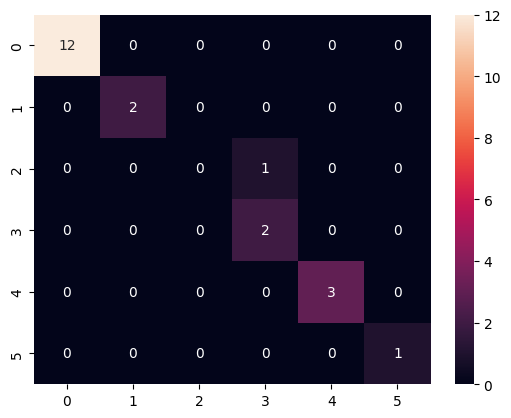

In [49]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.show()

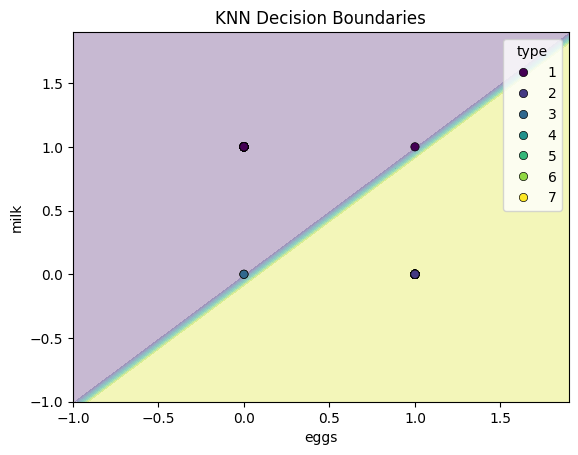

In [50]:
import numpy as np
import pandas as pd

# Selecting two features for visualization
feature1 = 2  # Change as needed
feature2 = 3  # Change as needed

X_vis = x.iloc[:, [feature1, feature2]]
y_vis = y

# Splitting visualization data
X_train_vis, X_test_vis, y_train_vis, y_test_vis = train_test_split(X_vis, y_vis, test_size=0.2, random_state=42)

# Train KNN on selected features
knn_vis = KNeighborsClassifier(n_neighbors=5)
knn_vis.fit(X_train_vis, y_train_vis)

# Create a mesh grid
x_min, x_max = X_vis.iloc[:, 0].min() - 1, X_vis.iloc[:, 0].max() + 1
y_min, y_max = X_vis.iloc[:, 1].min() - 1, X_vis.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Create a DataFrame for prediction with correct column names
prediction_data = pd.DataFrame(np.c_[xx.ravel(), yy.ravel()], columns=X_vis.columns)

# Predict for each point in mesh
Z = knn_vis.predict(prediction_data)
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.contourf(xx, yy, Z, alpha=0.3)
sns.scatterplot(x=X_vis.iloc[:, 0], y=X_vis.iloc[:, 1], hue=y_vis, palette="viridis", edgecolor="k")
plt.xlabel(x.columns[feature1])
plt.ylabel(x.columns[feature2])
plt.title("KNN Decision Boundaries")
plt.show()

### **Analysis of the KNN Decision Boundary Plot**  

1. **Axes:**
   - The **x-axis represents "eggs"**, indicating whether an animal lays eggs.
   - The **y-axis represents "milk"**, indicating whether an animal produces milk.

2. **Decision Regions:**
   - The plot is divided into **two primary regions** with different colors.
   - The **boundary (diagonal line)** separates the two classes, indicating the **KNN classification decision boundary**.

3. **Data Points:**
   - The **colored dots represent different classes (types of animals)**.
   - A **legend** on the right shows the mapping of colors to class numbers (1-7).

4. **Observations:**
   - **Top-left region (purple):** Likely represents mammals (class 1) that produce milk.
   - **Bottom-right region (yellow):** Likely represents animals that lay eggs.
   - The **boundary is slightly curved**, which is expected in **KNN classification**, as it is a non-linear classifier.
   - The **transition zone** between the two regions is smooth, meaning KNN is averaging nearby points to define class membership.

5. **Potential Issues:**
   - **Small dataset:** The decision boundary is influenced by only a few points.
   - **Overfitting risk:** If K is too small, the model may be highly sensitive to individual data points.
   - **Limited features:** The visualization uses only two features ("eggs" and "milk"), whereas the dataset has multiple attributes.

### **Recommendations for Improvement:**
- **Increase K** to make boundaries smoother.
- **Use more features** in visualization for better separation.
- **Try different distance metrics** (e.g., Manhattan, Minkowski) to see if decision boundaries change.


In [51]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# Define parameter grid
param_grid = {'n_neighbors': range(1, 21),
              'metric': ['euclidean', 'manhattan']}

# Create GridSearchCV object with StratifiedKFold
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=StratifiedKFold(n_splits=4))

# Fit to training data
grid_search.fit(x_train, y_train)

# Print best parameters and accuracy
print("Best parameters:", grid_search.best_params_)
print("Best accuracy:", grid_search.best_score_)

Best parameters: {'metric': 'euclidean', 'n_neighbors': 1}
Best accuracy: 0.9625


### **Analysis of Grid Search Results for KNN**

#### **1. Best Parameters Identified**
- **Best `n_neighbors`:** `1`
- **Best `metric`:** `euclidean`
- **Best accuracy:** `0.9625` (96.25%)

#### **2. Interpretation**
- **`n_neighbors = 1`**: The model performs best with only **one nearest neighbor**, meaning it heavily relies on the closest data point for classification.
  - This suggests that the dataset has well-separated classes.
  - However, using `k=1` can lead to **overfitting**, as it perfectly classifies training data but may generalize poorly to unseen data.

- **Metric: `euclidean`**:  
  - The Euclidean distance performed better than the Manhattan distance.
  - This indicates that straight-line distance is a more effective measure for classifying the data.

- **High Accuracy (`96.25%`)**:  
  - This suggests that the features in `Zoo.csv` are highly distinguishable and well-suited for classification using KNN.
  - The dataset may have low noise, making classification easier.

#### **3. Recommendations**
- **Test with higher `k` values**: Although `k=1` provides the highest accuracy, trying values like `k=3` or `k=5` might provide a more generalizable model.
- **Cross-validation with different splits**: Using `cv=5` or `cv=10` instead of `cv=4` can help verify the robustness of the result.
- **Consider standardizing the data**: Since Euclidean distance is sensitive to feature scaling, ensuring standardized data might improve performance further.


___

## Interview Questions & Answers

### Q1: What are the key hyperparameters in KNN?

The key hyperparameters in KNN are:

- **n_neighbors**: This parameter controls the number of nearest neighbors to consider when making a prediction. It significantly impacts the model's performance. A smaller value of `n_neighbors` can lead to overfitting, while a larger value can make the model less sensitive to local patterns.

- **metric**: This parameter specifies the distance metric used to calculate the distance between data points. Common choices include:
    - **euclidean**: The standard straight-line distance.
    - **manhattan**: The sum of absolute differences of coordinates.
    - **minkowski**: A generalization that includes Euclidean and Manhattan as special cases.
    - **chebyshev**: The maximum absolute difference between coordinates. The choice of distance metric depends on the nature of the data and the problem.

- **weights**: This parameter determines how the neighbors' contributions are weighted when making a prediction. The options are:
    - **uniform**: All neighbors have equal weight.
    - **distance**: Closer neighbors have more influence. Weighting can help improve the model's accuracy, especially when the data is not uniformly distributed.

- **algorithm**: This parameter specifies the algorithm used to compute the nearest neighbors. The options are:
    - **auto**: Automatically selects the most appropriate algorithm based on the data.
    - **ball_tree**: Uses a ball tree data structure to find neighbors.
    - **kd_tree**: Uses a KD-tree data structure to find neighbors.
    - **brute**: Performs a brute-force search. The choice of algorithm can affect the computational efficiency of the model.

### Q2: What distance metrics can be used in KNN?

KNN can utilize various distance metrics to determine the proximity between data points. Some commonly used distance metrics include:

- **Euclidean Distance**: This is the most common distance metric, representing the straight-line distance between two points in a Euclidean space. It is calculated as the square root of the sum of squared differences between corresponding coordinates.

    ```python
    Euclidean Distance = sqrt(sum((x1 - x2)^2 for x1, x2 in zip(point1, point2)))
    ```
    Use code with caution.

- **Manhattan Distance**: Also known as the L1 distance or taxicab distance, it calculates the distance as the sum of the absolute differences between the coordinates of two points. It is often used when dealing with high-dimensional data or when the features have different scales.

    ```python
    Manhattan Distance = sum(abs(x1 - x2) for x1, x2 in zip(point1, point2))
    ```
    Use code with caution.

- **Minkowski Distance**: This is a generalization of Euclidean and Manhattan distances, controlled by a parameter `p`. When `p=1`, it becomes the Manhattan distance, and when `p=2`, it becomes the Euclidean distance. Other values of `p` can be used to fine-tune the distance calculation.

    ```python
    Minkowski Distance = (sum(abs(x1 - x2)^p for x1, x2 in zip(point1, point2)))^(1/p)
    ```
    Use code with caution.

- **Chebyshev Distance**: This metric considers the maximum absolute difference between coordinates as the distance. It is often used in scenarios where the features have different units or scales.

    ```python
    Chebyshev Distance = max(abs(x1 - x2) for x1, x2 in zip(point1, point2))
    ```
    Use code with caution.

- **Hamming Distance**: This metric is used for categorical data and calculates the number of positions where two strings (or vectors) differ. It is suitable for comparing binary or categorical features.

    ```python
    Hamming Distance = sum(x1 != x2 for x1, x2 in zip(string1, string2))
    ```
    Use code with caution.

The choice of distance metric depends on the specific dataset and the characteristics of the features. Experimenting with different metrics is often necessary to find the one that yields the best results for a given problem.

____
